## Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import holoviews as hv
import warnings
warnings.filterwarnings("ignore")

In [2]:
from result_evaluation_utils import *

## Create log summaries

In [ ]:
# Regarding "tot_objects_all_tasks" you may need to unzip the log files first
# for t in ["arc", "arc_1D", "arc_h_v"]:
#     path = f"results/tot_objects/{t}"
#     data = read_and_parse_tasks_log(path, save_to_csv=True)
#display(data)

# Experiments

## Baseline - Naive

### 1D ARC

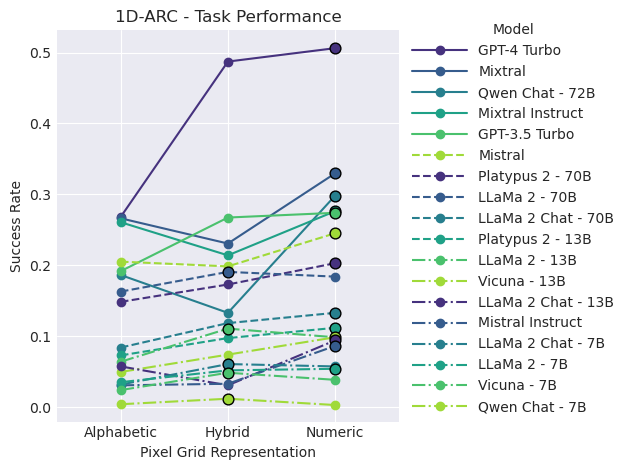

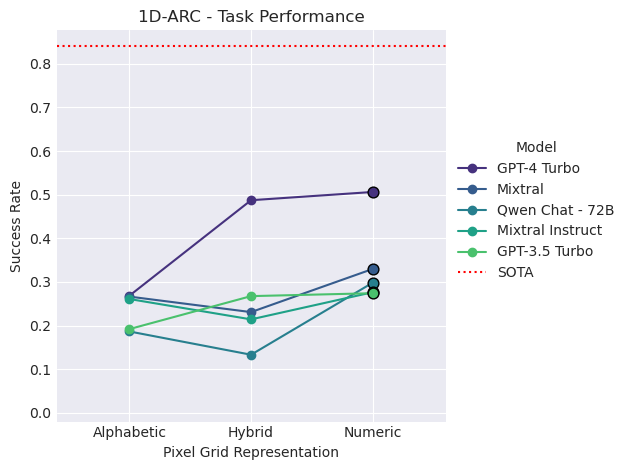

In [5]:
df = pd.read_csv("results/baseline_naive/arc_1D/summary.csv")
df['new_representation'] = df['new_representation'].replace("'.', 'a' - 'i'", 'Hybrid')
df['new_representation'] = df['new_representation'].replace("'a' - 'j'", 'Alphabetic')
df['new_representation'] = df['new_representation'].replace('0 - 9', 'Numeric')
plot_model_performance_across_runs(df, "new_representation", "success_rate", task="arc_1D", SOTA=None, value_ticks=None)
plot_model_performance_across_runs(df, "new_representation", "success_rate", task="arc_1D", top_n_models=5, SOTA=SOTA, value_ticks=None)

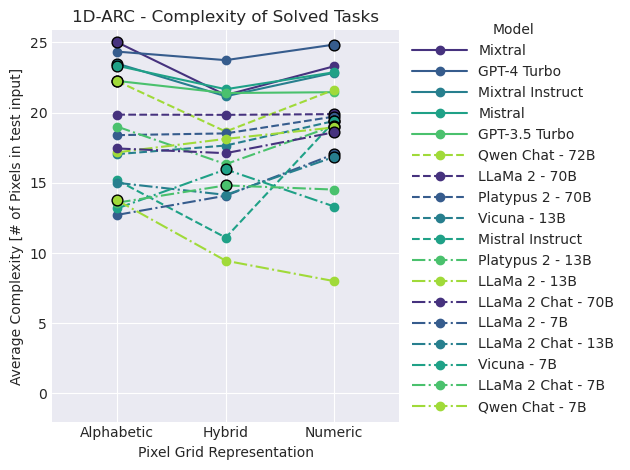

In [6]:
df = pd.read_csv("results/baseline_naive/arc_1D/summary.csv")
df['new_representation'] = df['new_representation'].replace("'.', 'a' - 'i'", 'Hybrid')
df['new_representation'] = df['new_representation'].replace("'a' - 'j'", 'Alphabetic')
df['new_representation'] = df['new_representation'].replace('0 - 9', 'Numeric')
plot_model_performance_across_runs(df, "new_representation", "avg_complexity", task="arc_1D", value_ticks=None)

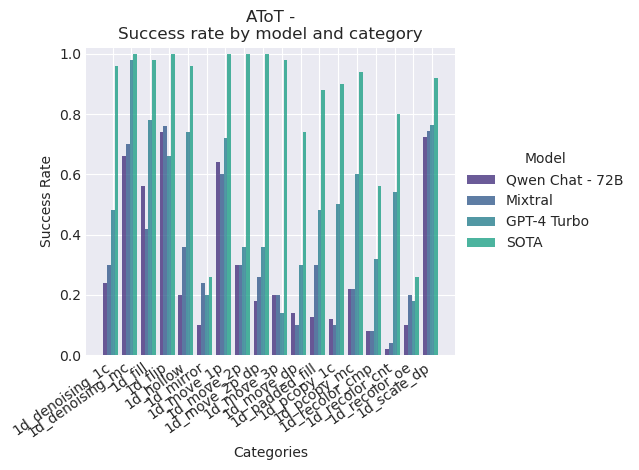

In [7]:
df = pd.read_csv("results/baseline_naive/arc_1D/summary.csv")
df = df[df["new_representation"] == "0 - 9"]
plot_grouped_bar_chart(df, top_n_models=3, SOTA=SOTA["arc_1D"])
plot_grouped_bar_chart(df, top_n_models=3, SOTA=None)


### ARC H vs V

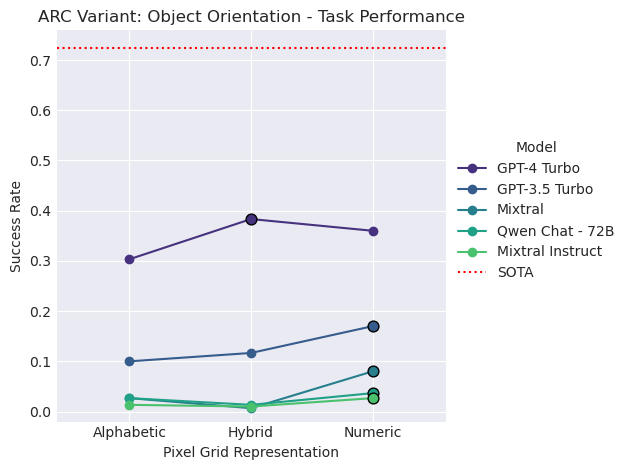

In [8]:
df = pd.read_csv("results/baseline_naive/arc_h_v/summary.csv")
df['new_representation'] = df['new_representation'].replace("'.', 'a' - 'i'", 'Hybrid')
df['new_representation'] = df['new_representation'].replace("'a' - 'j'", 'Alphabetic')
df['new_representation'] = df['new_representation'].replace('0 - 9', 'Numeric')
plot_model_performance_across_runs(df, "new_representation", "success_rate", task="arc_h_v", SOTA=None, value_ticks=None)
plot_model_performance_across_runs(df, "new_representation", "success_rate", task="arc_h_v", top_n_models=5, SOTA=SOTA, value_ticks=None)

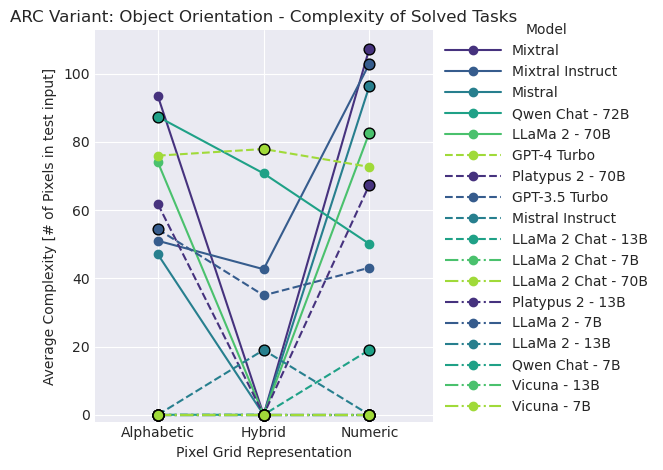

In [9]:
df = pd.read_csv("results/baseline_naive/arc_h_v/summary.csv")
df['new_representation'] = df['new_representation'].replace("'.', 'a' - 'i'", 'Hybrid')
df['new_representation'] = df['new_representation'].replace("'a' - 'j'", 'Alphabetic')
df['new_representation'] = df['new_representation'].replace('0 - 9', 'Numeric')
plot_model_performance_across_runs(df, "new_representation", "avg_complexity", task="arc_h_v", value_ticks=None)

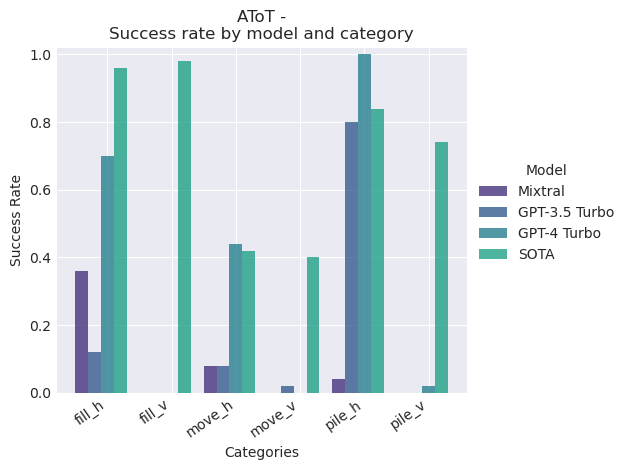

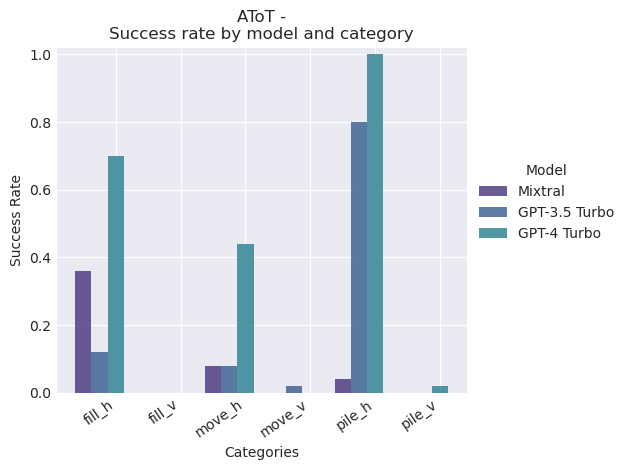

In [10]:
df = pd.read_csv("results/baseline_naive/arc_h_v/summary.csv")
df = df[df["new_representation"] == "0 - 9"]
plot_grouped_bar_chart(df, top_n_models=3, SOTA=SOTA["arc_h_v"])
plot_grouped_bar_chart(df, top_n_models=3, SOTA=None)

### ARC original

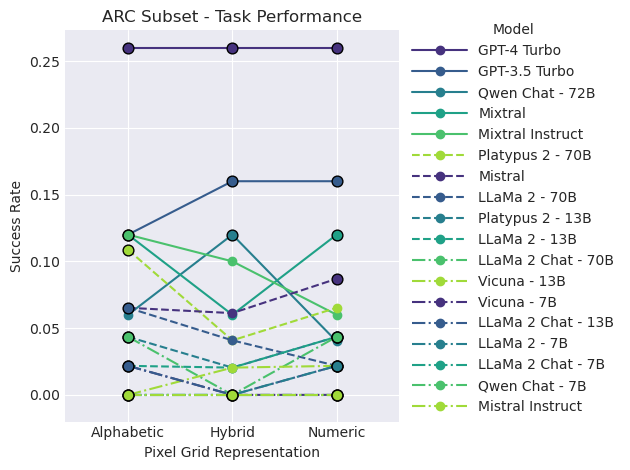

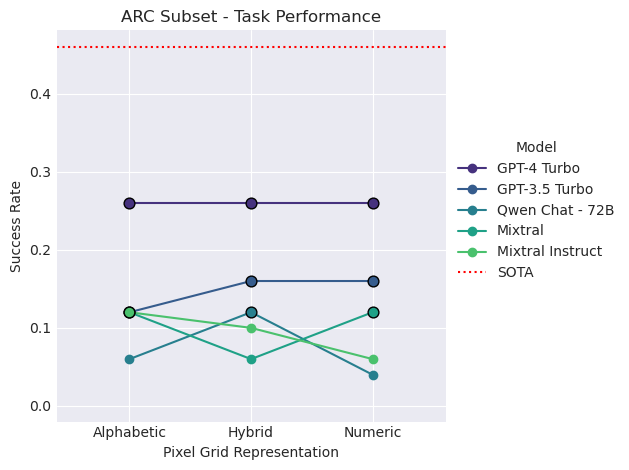

In [11]:
df = pd.read_csv("results/baseline_naive/arc/summary.csv")
df['new_representation'] = df['new_representation'].replace("'.', 'a' - 'i'", 'Hybrid')
df['new_representation'] = df['new_representation'].replace("'a' - 'j'", 'Alphabetic')
df['new_representation'] = df['new_representation'].replace('0 - 9', 'Numeric')
plot_model_performance_across_runs(df, "new_representation", "success_rate", task="arc", SOTA=None, value_ticks=None)
plot_model_performance_across_runs(df, "new_representation", "success_rate", task="arc", top_n_models=5, SOTA=SOTA, value_ticks=None)

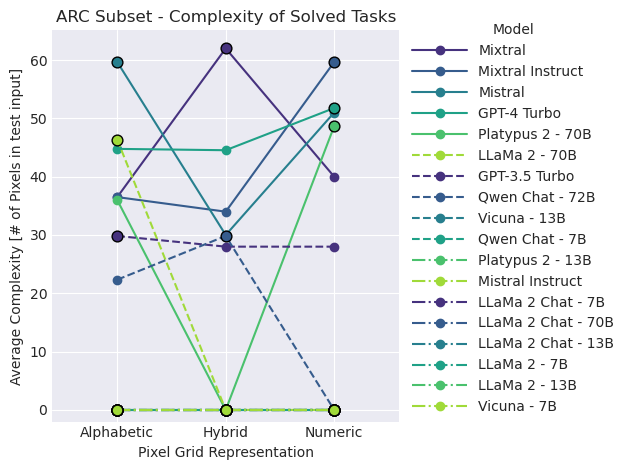

In [12]:
df = pd.read_csv("results/baseline_naive/arc/summary.csv")
df['new_representation'] = df['new_representation'].replace("'.', 'a' - 'i'", 'Hybrid')
df['new_representation'] = df['new_representation'].replace("'a' - 'j'", 'Alphabetic')
df['new_representation'] = df['new_representation'].replace('0 - 9', 'Numeric')
plot_model_performance_across_runs(df, "new_representation", "avg_complexity", task="arc", value_ticks=None)

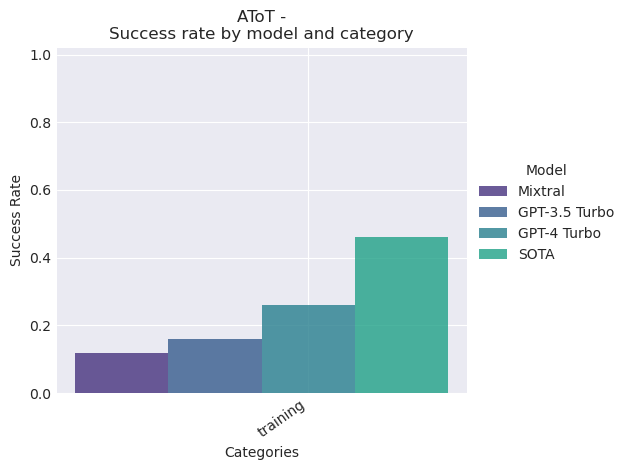

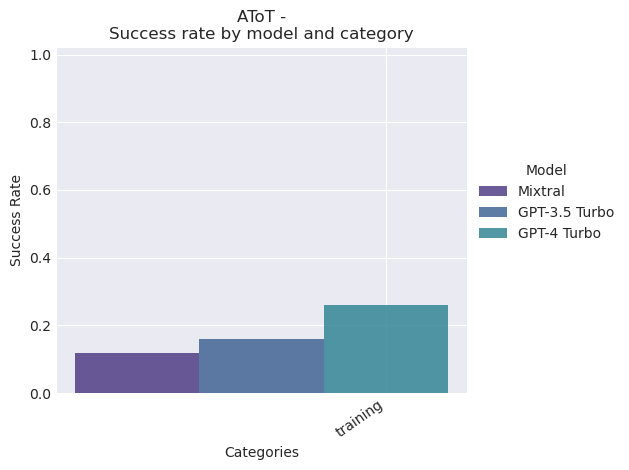

In [13]:
df = pd.read_csv("results/baseline_naive/arc/summary.csv")
df = df[df["new_representation"] == "0 - 9"]
plot_grouped_bar_chart(df, top_n_models=3, SOTA=SOTA["arc"])
plot_grouped_bar_chart(df, top_n_models=3, SOTA=None)

### All Datasets

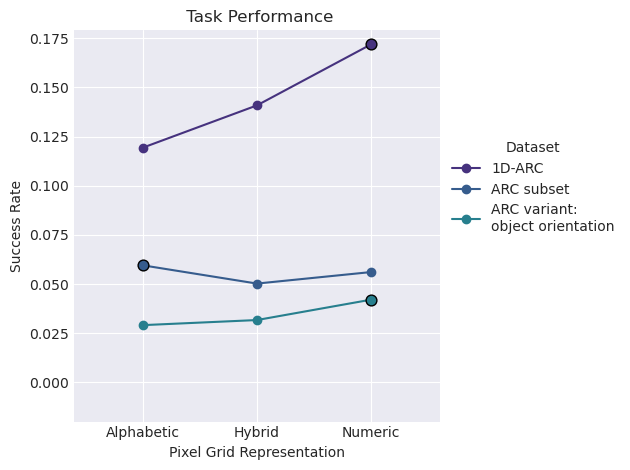

In [18]:
# Average
df_arc = pd.read_csv("results/baseline_naive/arc/summary.csv")
df_arc_1D = pd.read_csv("results/baseline_naive/arc_1D/summary.csv")
df_arc_h_v = pd.read_csv("results/baseline_naive/arc_h_v/summary.csv")
df_all = pd.DataFrame()
for df in [df_arc, df_arc_1D, df_arc_h_v]:
    df = df.groupby(['new_representation', 'dataset'])['success_rate'].mean().reset_index()
    df.columns = ['new_representation', 'dataset', 'avg_success_rate']
    df_all = pd.concat([df_all, df])
df_all['new_representation'] = df_all['new_representation'].replace("'.', 'a' - 'i'", 'Hybrid')
df_all['new_representation'] = df_all['new_representation'].replace("'a' - 'j'", 'Alphabetic')
df_all['new_representation'] = df_all['new_representation'].replace('0 - 9', 'Numeric')
df_all['dataset'] = df_all['dataset'].replace('arc_1D', '1D-ARC')
df_all['dataset'] = df_all['dataset'].replace('arc_h_v', 'ARC variant:\nobject orientation')
df_all['dataset'] = df_all['dataset'].replace('arc', 'ARC subset')
plot_model_performance_across_runs(df_all, "new_representation", "avg_success_rate", "dataset", top_n_models=3, value_ticks=None)

In [19]:
df_arc = pd.read_csv("results/baseline_naive/arc/summary.csv")
df_arc_1D = pd.read_csv("results/baseline_naive/arc_1D/summary.csv")
df_arc_h_v = pd.read_csv("results/baseline_naive/arc_h_v/summary.csv")
df_all = pd.DataFrame()
for df in [df_arc, df_arc_1D, df_arc_h_v]:
    df = df.groupby(['new_representation', 'dataset'])['success_rate'].mean().reset_index()
    df.columns = ['new_representation', 'dataset', 'success_rate']
    df_all = pd.concat([df_all, df])
# Creating a new dataframe for the unique representations with placeholders for success rates
df_all['dataset'] = df_all['dataset'].replace('arc', 'ARC subset')
df_all['dataset'] = df_all['dataset'].replace('arc_1D', '1D-ARC')
df_all['dataset'] = df_all['dataset'].replace('arc_h_v', 'ARC variant:\n object orientation')
df_all['new_representation'] = df_all['new_representation'].replace("'.', 'a' - 'i'", 'Hybrid')
df_all['new_representation'] = df_all['new_representation'].replace("'a' - 'j'", 'Alphabetic')
df_all['new_representation'] = df_all['new_representation'].replace('0 - 9', 'Numeric')
unique_representations = df_all['new_representation'].unique()
columns = ['new_representation']
new_df = pd.DataFrame(columns=columns)
new_df['new_representation'] = unique_representations

# Populating the success rates for each dataset
for representation in unique_representations:
    for dataset in df_all["dataset"].unique():
        success_rate = df_all[(df_all['new_representation'] == str(representation)) & (df_all['dataset'] == str(dataset))]['success_rate'].max()
        new_df.loc[new_df['new_representation'] == representation, f'success_rate_{dataset}'] = success_rate

# Reset index for the new dataframe
new_df.reset_index(drop=True, inplace=True)
plot_grouped_bar_chart(new_df, group_by="new_representation", group_col="dataset", top_n_models=None)

In [17]:
new_df


new_representation  success_rate_ARC subset  success_rate_1D-ARC  \
0             Hybrid                 0.050227             0.140893   
1         Alphabetic                 0.059517             0.119374   
2            Numeric                 0.056087             0.171945   

   success_rate_ARC variant:\n object orientation  
0                                        0.031667  
1                                        0.029074  
2                                        0.042037

## Baseline - CoT

### 1D ARC

#### Plots

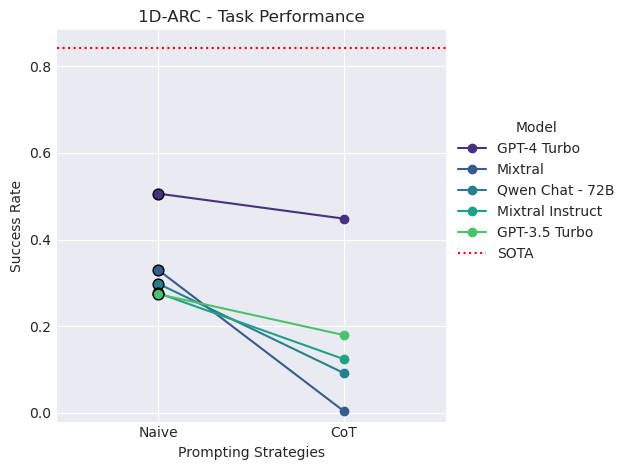

In [20]:
# All models and one of task checking methods (string or json comparison) must be correct
df_naive = pd.read_csv("results/baseline_naive/arc_1D/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df_cot["run"] = "CoT"
df = pd.concat([df_naive, df_cot])
plot_model_performance_across_runs(df, "run", "success_rate", task="arc_1D", SOTA=None, value_ticks=None)
plot_model_performance_across_runs(df, "run", "success_rate", task="arc_1D", top_n_models=5, SOTA=SOTA, value_ticks=None)


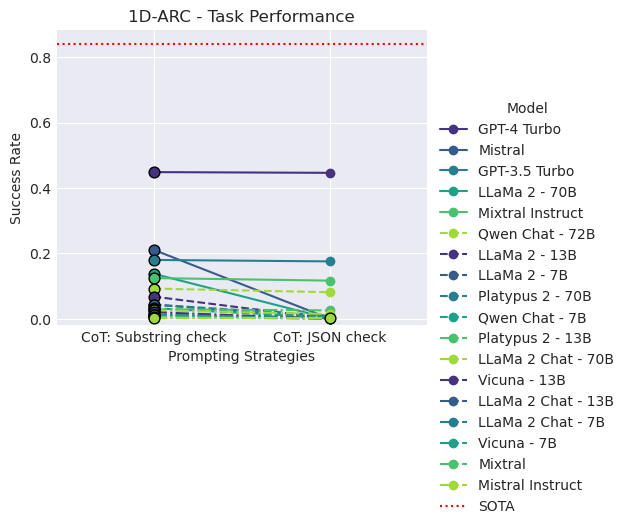

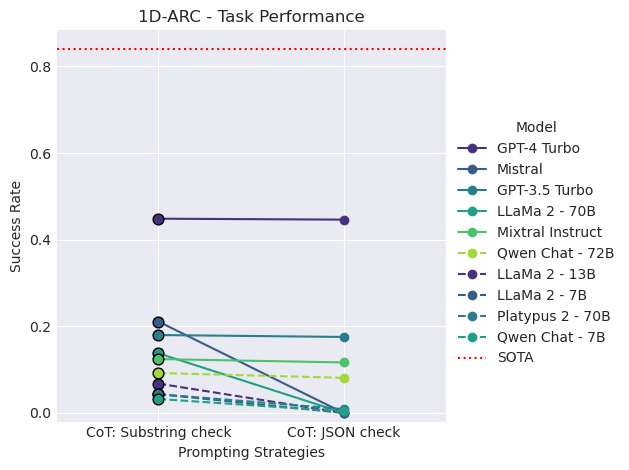

In [21]:
# String Comparison with Line Chart
df_cot = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df_cot["run"] = "CoT: Substring check"
df_cot_wo_str = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df_cot_wo_str["success_rate"] = df_cot_wo_str["success_rate_w/o_str_comparison"]
df_cot_wo_str["run"] = "CoT: JSON check"
df = pd.concat([df_cot, df_cot_wo_str])
plot_model_performance_across_runs(df, "run", "success_rate", task="arc_1D", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(df, "run", "success_rate", task="arc_1D", top_n_models=10, SOTA=SOTA, value_ticks=None)


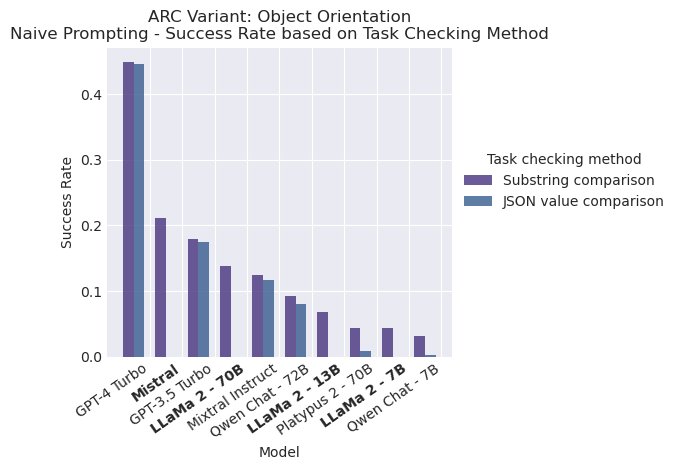

In [22]:
# String Comparison with Grouped Bar Chart
df_cot_wo_str = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
# plot_grouped_bar_chart(df_cot_wo_str, group_by=["success_rate", "success_rate_w/o_str_comparison"], group_col="str_cmp", top_n_models=None, asc=False, SOTA=None, highlight_pretrained_models=True)
plot_grouped_bar_chart(df_cot_wo_str, group_by=["success_rate", "success_rate_w/o_str_comparison"], group_col="str_cmp", top_n_models=10, asc=False, SOTA=None, highlight_pretrained_models=True)


In [23]:
# Naive vs. CoT with json comparison! Only fine-tuned models!
df_naive = pd.read_csv("results/baseline_naive/arc_1D/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot_wo_str = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df_cot_wo_str["success_rate"] = df_cot_wo_str["success_rate_w/o_str_comparison"]
df_cot_wo_str["run"] = "CoT"
df = pd.concat([df_naive,df_cot_wo_str ])
df = df[df['model'].str.contains('gpt-', case=False, na=False) | df['model'].str.contains('Instruct', case=False, na=False) | df['model'].str.contains('Platypus', case=False, na=False) | df['model'].str.contains('chat', case=False, na=False) | df['model'].str.contains('Chat', case=False, na=False) | df['model'].str.contains('vicuna', case=False, na=False)]

plot_model_performance_across_runs(df, "run", "success_rate", task="arc_1D", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(df, "run", "success_rate", task="arc_1D", top_n_models=5, SOTA=SOTA, value_ticks=None, small_fig=True)


In [24]:
df[["model", "success_rate", "run"]]


model  success_rate    run
2                     gpt-3.5-turbo-1106      0.274140  Naive
14       NousResearch/Llama-2-7b-chat-hf      0.057714  Naive
18        TheBloke/Llama-2-13B-chat-GPTQ      0.094340  Naive
22        TheBloke/Llama-2-70b-Chat-GPTQ      0.133185  Naive
26    mistralai/Mistral-7B-Instruct-v0.1      0.086570  Naive
30           TheBloke/Platypus2-13B-GPTQ      0.112098  Naive
32           TheBloke/Platypus2-70B-GPTQ      0.203108  Naive
35                    gpt-4-1106-preview      0.506104  Naive
37  mistralai/Mixtral-8x7B-Instruct-v0.1      0.276360  Naive
38          TheBloke/vicuna-7B-v1.5-GPTQ      0.038846  Naive
39               Qwen/Qwen-72B-Chat-Int4      0.298109  Naive
40         TheBloke/vicuna-13B-v1.5-GPTQ      0.098779  Naive
41                Qwen/Qwen-7B-Chat-Int4      0.003330  Naive
0                     gpt-3.5-turbo-1106      0.175361    CoT
1                     gpt-4-1106-preview      0.446171    CoT
2        NousResearch/Llama-2-7b-chat-hf      0.000000    CoT
3         TheBloke/Llama-2-13B-chat-GPTQ      0.001110    CoT
5         TheBloke/Llama-2-70b-Chat-GPTQ      0.014428    CoT
9            TheBloke/Platypus2-13B-GPTQ      0.025527    CoT
10           TheBloke/Platypus2-70B-GPTQ      0.008879    CoT
11    mistralai/Mistral-7B-Instruct-v0.1      0.001110    CoT
12  mistralai/Mixtral-8x7B-Instruct-v0.1      0.116537    CoT
13               Qwen/Qwen-72B-Chat-Int4      0.081021    CoT
15          TheBloke/vicuna-7B-v1.5-GPTQ      0.000000    CoT
16         TheBloke/vicuna-13B-v1.5-GPTQ      0.000000    CoT
17                Qwen/Qwen-7B-Chat-Int4      0.003330    CoT

In [25]:
df_naive = pd.read_csv("results/baseline_naive/arc_1D/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df_cot["run"] = "CoT"
df = pd.concat([df_cot, df_naive])
plot_model_performance_across_runs(df, "run", "avg_complexity", task="arc_1D", value_ticks=None)


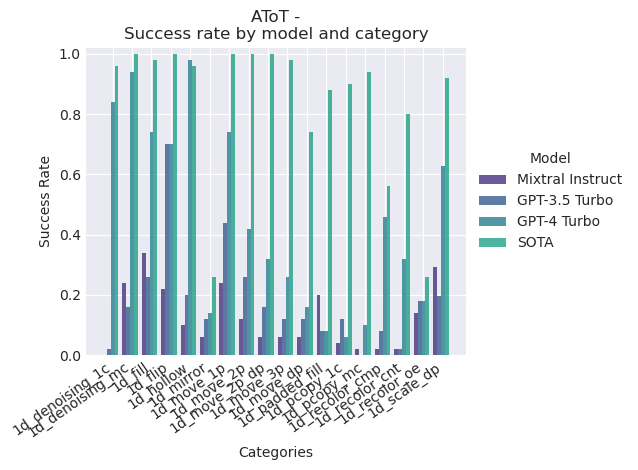

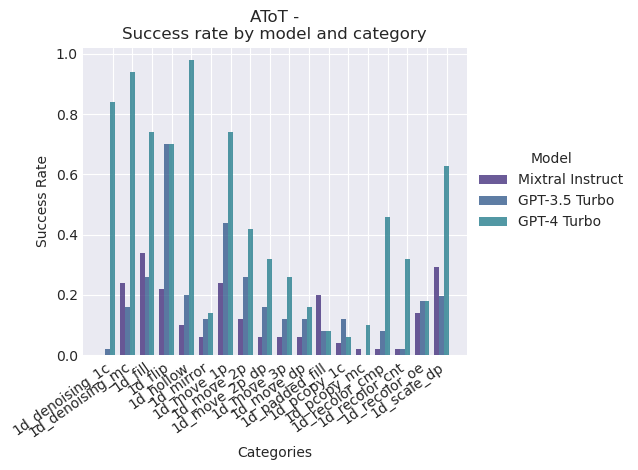

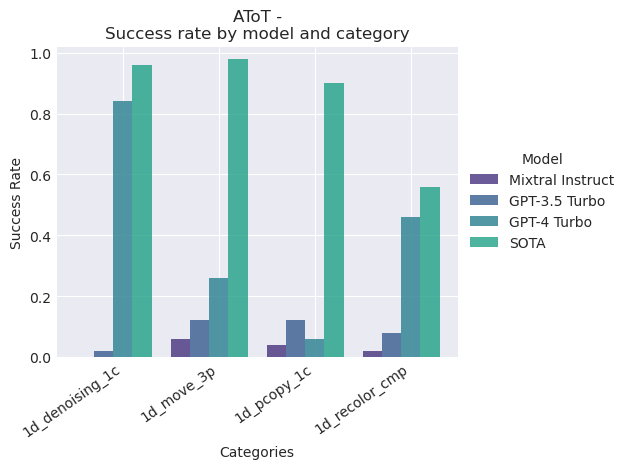

In [27]:
df = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df = df[df['model'].str.contains('gpt-', case=False, na=False) | df['model'].str.contains('Instruct', case=False, na=False) | df['model'].str.contains('Platypus', case=False, na=False) | df['model'].str.contains('chat', case=False, na=False) | df['model'].str.contains('Chat', case=False, na=False) | df['model'].str.contains('vicuna', case=False, na=False)]
plot_grouped_bar_chart(df, top_n_models=3, SOTA=SOTA["arc_1D"])
plot_grouped_bar_chart(df, top_n_models=3, SOTA=None)
cols = ["1d_denoising_1c", "1d_move_3p", "1d_pcopy_1c", "1d_recolor_cmp"]
cols = [element for element in df.columns if any(substring in element for substring in cols)]
df = df[cols+["success_rate","model"]]
plot_grouped_bar_chart(df, top_n_models=3, SOTA=SOTA["arc_1D"])
plot_grouped_bar_chart(df, top_n_models=3, SOTA=None)

#### Chain of thought analysis

In [ ]:
# manually analyze # TODO: change data in tot/src/data to complete dataset
df = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
analyze_random_tasks(df, "arc_1D", "baseline_cot", n_models=3, n_tasks=20, only_unsolved=False, only_solved=True, starting_index=0, only_save_as_txt=True)


In [28]:
path="results/baseline_cot/arc_1D/manual_task_analysis.xlsx"
task_analysis_1D, unsolved_1D, solved_1D = get_task_analysis_kpi(path)
task_analysis_1D

run  n_tasks  \
0      naive_cot_gpt4_unsolved       10   
1        naive_cot_gpt4_solved       10   
2          naive_cot_gpt4_both       20   
3      naive_cot_gpt3_unsolved       10   
4        naive_cot_gpt3_solved       10   
5          naive_cot_gpt3_both       20   
6   naive_cot_mixtral_unsolved       10   
7     naive_cot_mixtral_solved       10   
8       naive_cot_mixtral_both       20   
9                 all_unsolved       30   
10                  all_solved       30   
11                    all_both       60   

    description_correct_and_complete_fraction_of_n_tasks  \
0                                            0.000000      
1                                            0.400000      
2                                            0.200000      
3                                            0.100000      
4                                            0.200000      
5                                            0.150000      
6                                            0.000000      
7                                            0.100000      
8                                            0.050000      
9                                            0.033333      
10                                           0.233333      
11                                           0.133333      

    description_correct_but_missing_relevant_details_fraction_of_n_tasks  \
0                                            0.200000                      
1                                            0.100000                      
2                                            0.150000                      
3                                            0.000000                      
4                                            0.000000                      
5                                            0.000000                      
6                                            0.100000                      
7                                            0.000000                      
8                                            0.050000                      
9                                            0.100000                      
10                                           0.033333                      
11                                           0.066667                      

    description_wrong_fraction_of_n_tasks  \
0                                0.800000   
1                                0.500000   
2                                0.650000   
3                                0.900000   
4                                0.800000   
5                                0.850000   
6                                0.900000   
7                                0.900000   
8                                0.900000   
9                                0.866667   
10                               0.733333   
11                               0.800000   

    description_error_bc_bad_object_detection_fraction_of_incorrect_descriptions  \
0                                            0.900000                              
1                                            1.000000                              
2                                            0.937500                              
3                                            1.000000                              
4                                            1.000000                              
5                                            1.000000                              
6                                            0.900000                              
7                                            1.000000                              
8                                            0.947368                              
9                                            0.931034                              
10                                           1.000000                              
11                                           0.961538                              

    test_case_desc

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
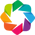

:Sankey   [source,target]   (value)

In [29]:
sankey_edges_unsolved = get_sankey_source_data(unsolved_1D)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='1D-ARC: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
sankey_edges_solved = get_sankey_source_data(solved_1D)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='1D-ARC: Chain-of-Thought Analysis of solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap,label_text_font_size='13pt')

In [ ]:
sankey_edges_both = get_sankey_source_data(pd.concat([unsolved_1D, solved_1D]))
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_both, label='1D-ARC: Chain-of-Thought Analysis of Solved and Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap,label_text_font_size='13pt')

### ARC H vs V

#### Plots

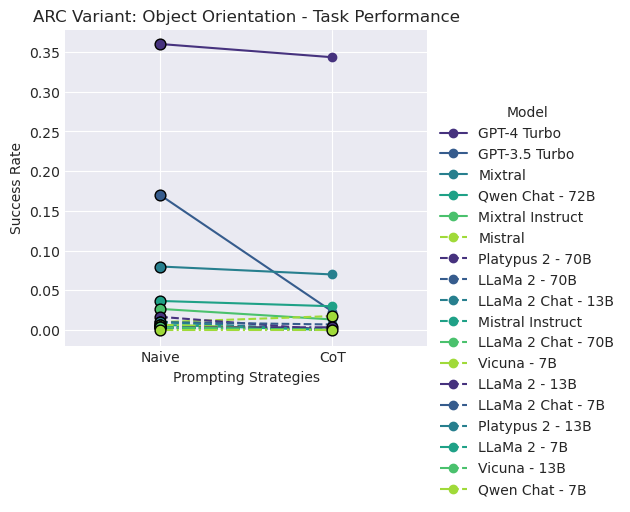

In [30]:
# All models and one of task checking methods (string or json comparison) must be correct
df_naive = pd.read_csv("results/baseline_naive/arc_h_v/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df_cot["run"] = "CoT"
df = pd.concat([df_naive, df_cot])
plot_model_performance_across_runs(df, "run", "success_rate", task="arc_h_v", SOTA=None, value_ticks=None)
plot_model_performance_across_runs(df, "run", "success_rate", task="arc_h_v", top_n_models=5, SOTA=SOTA, value_ticks=None)


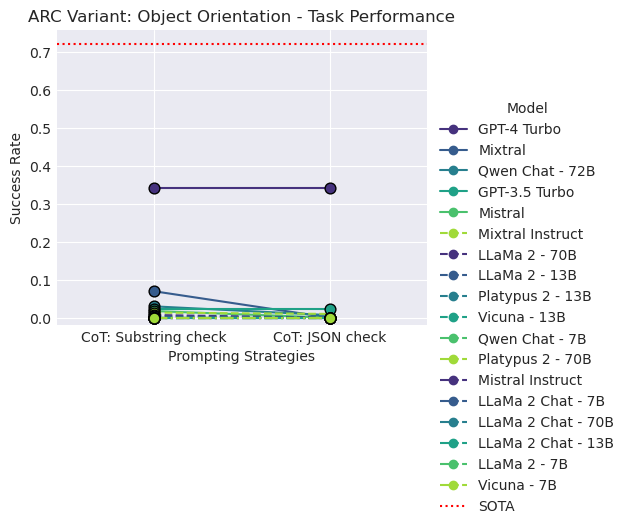

In [31]:
# String Comparison with Line Chart
df_cot = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df_cot["run"] = "CoT: Substring check"
df_cot_wo_str = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df_cot_wo_str["success_rate"] = df_cot_wo_str["success_rate_w/o_str_comparison"]
df_cot_wo_str["run"] = "CoT: JSON check"
df = pd.concat([df_cot, df_cot_wo_str])
plot_model_performance_across_runs(df, "run", "success_rate", task="arc_h_v", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(df, "run", "success_rate", task="arc_h_v", top_n_models=10, SOTA=SOTA, value_ticks=None)


In [32]:
# String Comparison with Grouped Bar Chart
df_cot_wo_str = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
# plot_grouped_bar_chart(df_cot_wo_str, group_by=["success_rate", "success_rate_w/o_str_comparison"], group_col="str_cmp", top_n_models=None, asc=False, SOTA=None, highlight_pretrained_models=True)
plot_grouped_bar_chart(df_cot_wo_str, group_by=["success_rate", "success_rate_w/o_str_comparison"], group_col="str_cmp", top_n_models=10, asc=False, SOTA=None, highlight_pretrained_models=True)


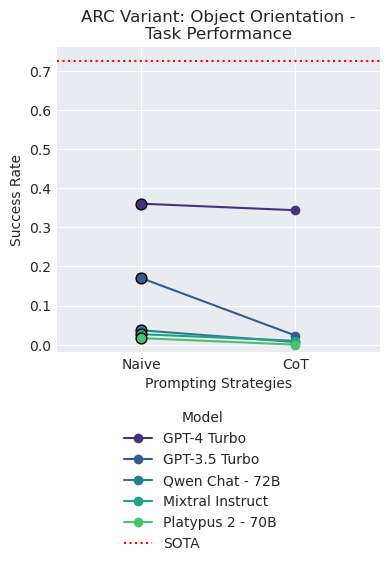

In [33]:
# Naive vs. CoT without string comparison!
df_naive = pd.read_csv("results/baseline_naive/arc_h_v/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot_wo_str = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df_cot_wo_str["success_rate"] = df_cot_wo_str["success_rate_w/o_str_comparison"]
df_cot_wo_str["run"] = "CoT"
df = pd.concat([df_naive,df_cot_wo_str ])
df = df[df['model'].str.contains('gpt-', case=False, na=False) | df['model'].str.contains('Instruct', case=False, na=False) | df['model'].str.contains('Platypus', case=False, na=False) | df['model'].str.contains('chat', case=False, na=False) | df['model'].str.contains('Chat', case=False, na=False) | df['model'].str.contains('vicuna', case=False, na=False)]
plot_model_performance_across_runs(df, "run", "success_rate", task="arc_h_v", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(df, "run", "success_rate", task="arc_h_v", top_n_models=5, SOTA=SOTA, value_ticks=None, small_fig=True)


In [34]:
df[["model", "success_rate", "run"]]

model  success_rate    run
2                     gpt-3.5-turbo-1106      0.170000  Naive
4                     gpt-4-1106-preview      0.360000  Naive
6        NousResearch/Llama-2-7b-chat-hf      0.003333  Naive
12        TheBloke/Llama-2-13B-chat-GPTQ      0.010000  Naive
18        TheBloke/Llama-2-70b-Chat-GPTQ      0.006667  Naive
24    mistralai/Mistral-7B-Instruct-v0.1      0.006667  Naive
30           TheBloke/Platypus2-13B-GPTQ      0.003333  Naive
33           TheBloke/Platypus2-70B-GPTQ      0.016667  Naive
38  mistralai/Mixtral-8x7B-Instruct-v0.1      0.026667  Naive
39         TheBloke/vicuna-13B-v1.5-GPTQ      0.003333  Naive
40          TheBloke/vicuna-7B-v1.5-GPTQ      0.006667  Naive
41                Qwen/Qwen-7B-Chat-Int4      0.000000  Naive
42               Qwen/Qwen-72B-Chat-Int4      0.036667  Naive
0                     gpt-3.5-turbo-1106      0.023333    CoT
1                     gpt-4-1106-preview      0.343333    CoT
2        NousResearch/Llama-2-7b-chat-hf      0.000000    CoT
3         TheBloke/Llama-2-13B-chat-GPTQ      0.000000    CoT
5         TheBloke/Llama-2-70b-Chat-GPTQ      0.000000    CoT
7            TheBloke/Platypus2-13B-GPTQ      0.000000    CoT
8            TheBloke/Platypus2-70B-GPTQ      0.000000    CoT
9     mistralai/Mistral-7B-Instruct-v0.1      0.000000    CoT
12  mistralai/Mixtral-8x7B-Instruct-v0.1      0.010000    CoT
13               Qwen/Qwen-72B-Chat-Int4      0.006667    CoT
15                Qwen/Qwen-7B-Chat-Int4      0.000000    CoT
16          TheBloke/vicuna-7B-v1.5-GPTQ      0.000000    CoT
17         TheBloke/vicuna-13B-v1.5-GPTQ      0.000000    CoT

In [35]:
# TODO: Change to only success_rate_w/o_str_comparison
df_naive = pd.read_csv("results/baseline_naive/arc_h_v/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df_cot["run"] = "CoT"
df = pd.concat([df_cot, df_naive])
df = df[df['model'].str.contains('gpt-', case=False, na=False) | df['model'].str.contains('Instruct', case=False, na=False) | df['model'].str.contains('Platypus', case=False, na=False) | df['model'].str.contains('chat', case=False, na=False) | df['model'].str.contains('Chat', case=False, na=False) | df['model'].str.contains('vicuna', case=False, na=False)]
plot_model_performance_across_runs(df, "run", "avg_complexity", task="arc_h_v", value_ticks=None)


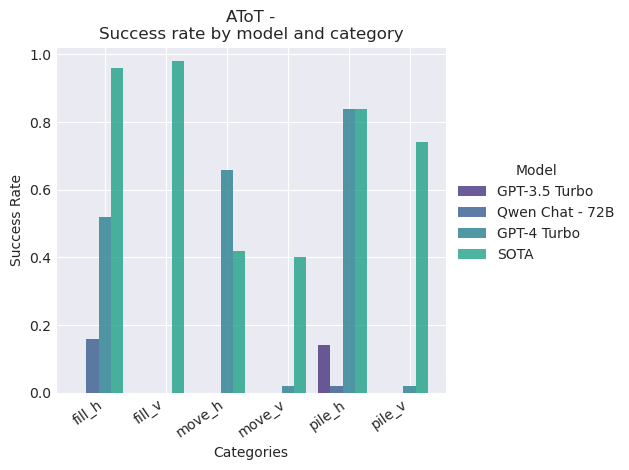

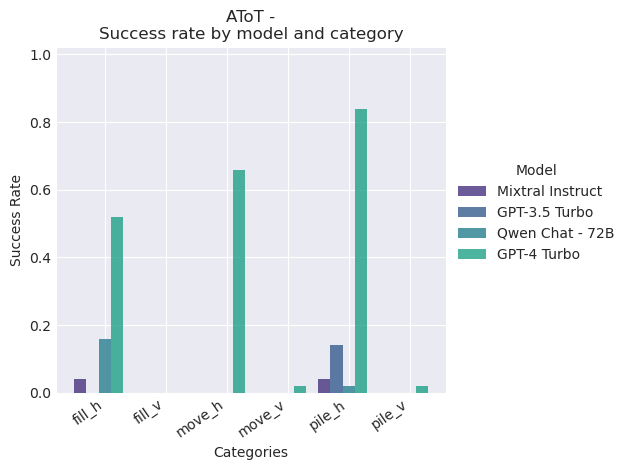

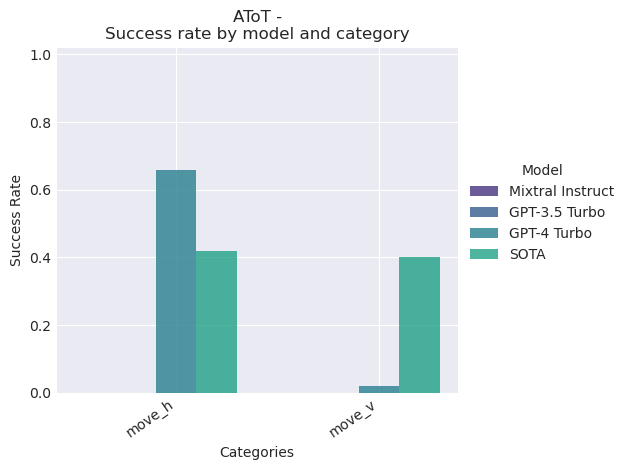

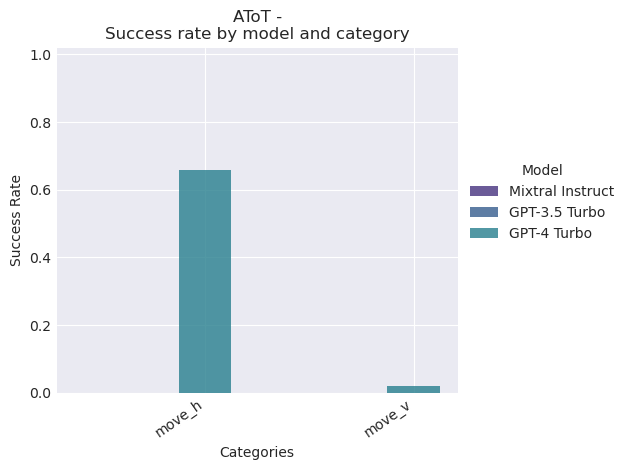

In [36]:
df = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df = df[df["new_representation"] == "0 - 9"]
df = df[df['model'].str.contains('gpt-', case=False, na=False) | df['model'].str.contains('Instruct', case=False, na=False) | df['model'].str.contains('Platypus', case=False, na=False) | df['model'].str.contains('chat', case=False, na=False) | df['model'].str.contains('Chat', case=False, na=False) | df['model'].str.contains('vicuna', case=False, na=False)]
plot_grouped_bar_chart(df, top_n_models=3, SOTA=SOTA["arc_h_v"])
plot_grouped_bar_chart(df, top_n_models=4, SOTA=None)
cols = ["move_h", "move_v"]
cols = [element for element in df.columns if any(substring in element for substring in cols)]
df = df[cols+["success_rate","model"]]
df = df[df['model'].str.contains('gpt-', case=False, na=False) | df['model'].str.contains('Instruct', case=False, na=False)]
plot_grouped_bar_chart(df, top_n_models=3, SOTA=SOTA["arc_h_v"])
plot_grouped_bar_chart(df, top_n_models=3, SOTA=None)

In [37]:
df[["model"]+cols]

model  cat_success_cnt_move_h  \
0                     gpt-3.5-turbo-1106                       0   
1                     gpt-4-1106-preview                      33   
9     mistralai/Mistral-7B-Instruct-v0.1                       0   
12  mistralai/Mixtral-8x7B-Instruct-v0.1                       0   

    cat_success_cnt_move_v  cat_success_rate_move_h  cat_success_rate_move_v  
0                        0                     0.00                     0.00  
1                        1                     0.66                     0.02  
9                        0                     0.00                     0.00  
12                       0                     0.00                     0.00

#### Chain of thought analysis

In [ ]:
# manually analyze # TODO: change data in tot/src/data to complete dataset
df = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
analyze_random_tasks(df, "arc_h_v", "baseline_cot", n_models=3, n_tasks=20, only_unsolved=False, only_solved=True, starting_index=0, only_save_as_txt=True)


In [38]:
path="results/baseline_cot/arc_h_v/manual_task_analysis.xlsx"
task_analysis_arc_h_v, unsolved_arc_h_v, solved_arc_h_v = get_task_analysis_kpi(path)
task_analysis_arc_h_v

run  n_tasks  \
0      naive_cot_gpt4_unsolved       10   
1        naive_cot_gpt4_solved       10   
2          naive_cot_gpt4_both       20   
3      naive_cot_gpt3_unsolved       10   
4        naive_cot_gpt3_solved        7   
5          naive_cot_gpt3_both       17   
6   naive_cot_mixtral_unsolved       10   
7     naive_cot_mixtral_solved        4   
8       naive_cot_mixtral_both       14   
9                 all_unsolved       30   
10                  all_solved       21   
11                    all_both       51   

    description_correct_and_complete_fraction_of_n_tasks  \
0                                            0.100000      
1                                            0.700000      
2                                            0.400000      
3                                            0.100000      
4                                            0.142857      
5                                            0.117647      
6                                            0.000000      
7                                            0.250000      
8                                            0.071429      
9                                            0.066667      
10                                           0.428571      
11                                           0.215686      

    description_correct_but_missing_relevant_details_fraction_of_n_tasks  \
0                                            0.100000                      
1                                            0.000000                      
2                                            0.050000                      
3                                            0.000000                      
4                                            0.142857                      
5                                            0.058824                      
6                                            0.000000                      
7                                            0.000000                      
8                                            0.000000                      
9                                            0.033333                      
10                                           0.047619                      
11                                           0.039216                      

    description_wrong_fraction_of_n_tasks  \
0                                0.800000   
1                                0.300000   
2                                0.550000   
3                                0.900000   
4                                0.714286   
5                                0.823529   
6                                1.000000   
7                                0.750000   
8                                0.928571   
9                                0.900000   
10                               0.523810   
11                               0.745098   

    description_error_bc_bad_object_detection_fraction_of_incorrect_descriptions  \
0                                            0.888889                              
1                                            1.000000                              
2                                            0.916667                              
3                                            0.777778                              
4                                            0.833333                              
5                                            0.800000                              
6                                            0.800000                              
7                                            1.000000                              
8                                            0.846154                              
9                                            0.821429                              
10                                           0.916667                              
11                                           0.850000                              

    test_case_desc

In [ ]:
sankey_edges_unsolved = get_sankey_source_data(unsolved_arc_h_v)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='ARC variant object orientation: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
sankey_edges_solved = get_sankey_source_data(solved_arc_h_v)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='ARC variant object orientation: Chain-of-Thought Analysis of solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
sankey_edges_both = get_sankey_source_data(pd.concat([unsolved_arc_h_v, solved_arc_h_v]))
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_both, label='ARC variant object orientation: Chain-of-Thought Analysis of Solved and Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

### ARC original

#### Plots

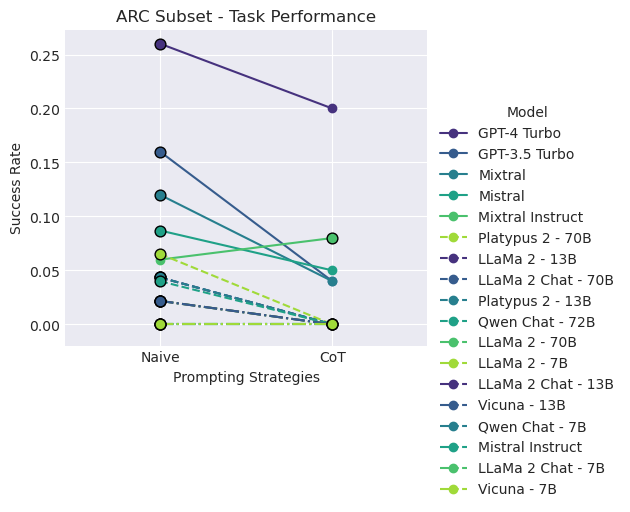

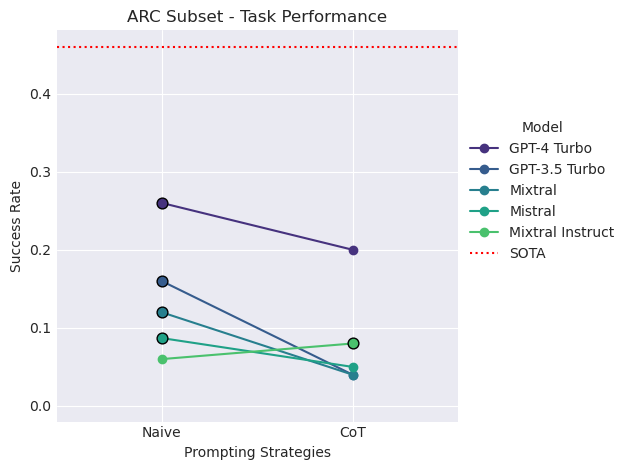

In [39]:
# All models and one of task checking methods (string or json comparison) must be correct
df_naive = pd.read_csv("results/baseline_naive/arc/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc/summary.csv")
df_cot["run"] = "CoT"
df = pd.concat([df_naive, df_cot])

plot_model_performance_across_runs(df, "run", "success_rate", task="arc", SOTA=None, value_ticks=None)
plot_model_performance_across_runs(df, "run", "success_rate", task="arc", top_n_models=5, SOTA=SOTA, value_ticks=None)


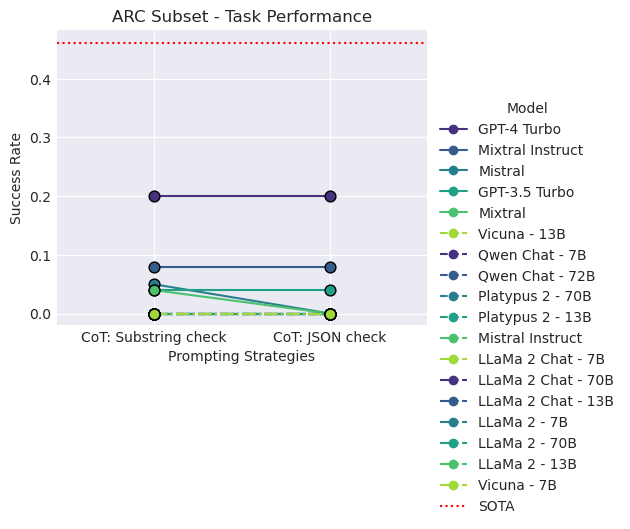

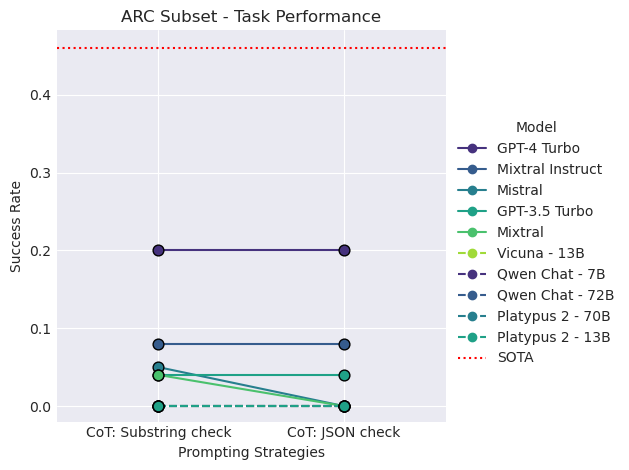

In [40]:
# String Comparison with Line Chart
df_cot = pd.read_csv("results/baseline_cot/arc/summary.csv")
df_cot["run"] = "CoT: Substring check"
df_cot_wo_str = pd.read_csv("results/baseline_cot/arc/summary.csv")
df_cot_wo_str["success_rate"] = df_cot_wo_str["success_rate_w/o_str_comparison"]
df_cot_wo_str["run"] = "CoT: JSON check"
df = pd.concat([df_cot, df_cot_wo_str])
plot_model_performance_across_runs(df, "run", "success_rate", task="arc", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(df, "run", "success_rate", task="arc", top_n_models=10, SOTA=SOTA, value_ticks=None)




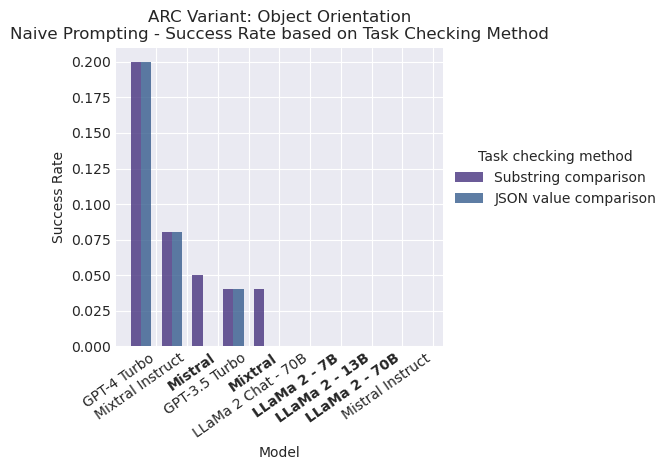

In [41]:
# String Comparison with Grouped Bar Chart
df_cot_wo_str = pd.read_csv("results/baseline_cot/arc/summary.csv")
# plot_grouped_bar_chart(df_cot_wo_str, group_by=["success_rate", "success_rate_w/o_str_comparison"], group_col="str_cmp", top_n_models=None, asc=False, SOTA=None, highlight_pretrained_models=True)
plot_grouped_bar_chart(df_cot_wo_str, group_by=["success_rate", "success_rate_w/o_str_comparison"], group_col="str_cmp", top_n_models=10, asc=False, SOTA=None, highlight_pretrained_models=True)


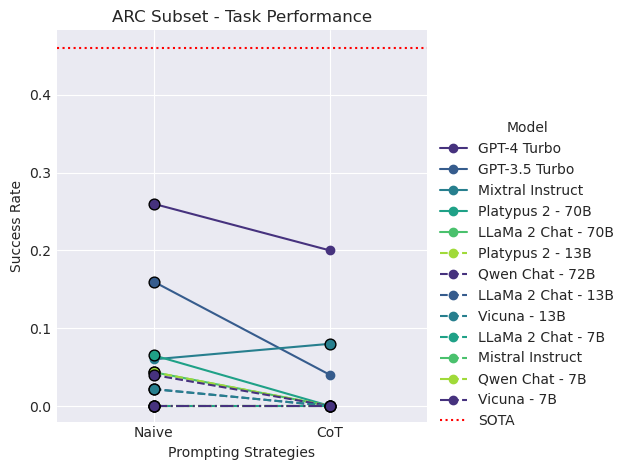

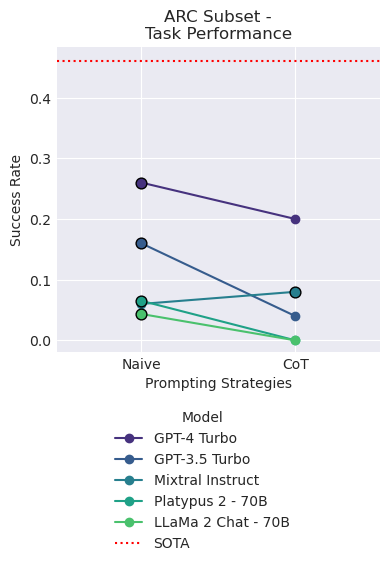

In [42]:
# Naive vs. CoT without string comparison!
df_naive = pd.read_csv("results/baseline_naive/arc/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot_wo_str = pd.read_csv("results/baseline_cot/arc/summary.csv")
df_cot_wo_str["success_rate"] = df_cot_wo_str["success_rate_w/o_str_comparison"]
df_cot_wo_str["run"] = "CoT"
df = pd.concat([df_naive,df_cot_wo_str ])
df = df[df['model'].str.contains('gpt-', case=False, na=False) | df['model'].str.contains('Instruct', case=False, na=False) | df['model'].str.contains('Platypus', case=False, na=False) | df['model'].str.contains('chat', case=False, na=False) | df['model'].str.contains('Chat', case=False, na=False) | df['model'].str.contains('vicuna', case=False, na=False)]

plot_model_performance_across_runs(df, "run", "success_rate", task="arc", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(df, "run", "success_rate", task="arc", top_n_models=5, SOTA=SOTA, value_ticks=None, small_fig=True)


In [43]:
df[[ "model", "success_rate", "run"]]

model  success_rate    run
0                     gpt-3.5-turbo-1106      0.160000  Naive
9        NousResearch/Llama-2-7b-chat-hf      0.000000  Naive
15        TheBloke/Llama-2-13B-chat-GPTQ      0.021739  Naive
21        TheBloke/Llama-2-70b-Chat-GPTQ      0.043478  Naive
27    mistralai/Mistral-7B-Instruct-v0.1      0.000000  Naive
33           TheBloke/Platypus2-13B-GPTQ      0.043478  Naive
36           TheBloke/Platypus2-70B-GPTQ      0.065217  Naive
39                    gpt-4-1106-preview      0.260000  Naive
43  mistralai/Mixtral-8x7B-Instruct-v0.1      0.060000  Naive
44                Qwen/Qwen-7B-Chat-Int4      0.000000  Naive
45          TheBloke/vicuna-7B-v1.5-GPTQ      0.000000  Naive
46         TheBloke/vicuna-13B-v1.5-GPTQ      0.021739  Naive
48               Qwen/Qwen-72B-Chat-Int4      0.040000  Naive
0                     gpt-3.5-turbo-1106      0.040000    CoT
1                     gpt-4-1106-preview      0.200000    CoT
2        NousResearch/Llama-2-7b-chat-hf      0.000000    CoT
3         TheBloke/Llama-2-13B-chat-GPTQ      0.000000    CoT
4         TheBloke/Llama-2-70b-Chat-GPTQ      0.000000    CoT
8     mistralai/Mistral-7B-Instruct-v0.1      0.000000    CoT
10           TheBloke/Platypus2-13B-GPTQ      0.000000    CoT
11           TheBloke/Platypus2-70B-GPTQ      0.000000    CoT
12  mistralai/Mixtral-8x7B-Instruct-v0.1      0.080000    CoT
13               Qwen/Qwen-72B-Chat-Int4      0.000000    CoT
14                Qwen/Qwen-7B-Chat-Int4      0.000000    CoT
15          TheBloke/vicuna-7B-v1.5-GPTQ      0.000000    CoT
16         TheBloke/vicuna-13B-v1.5-GPTQ      0.000000    CoT

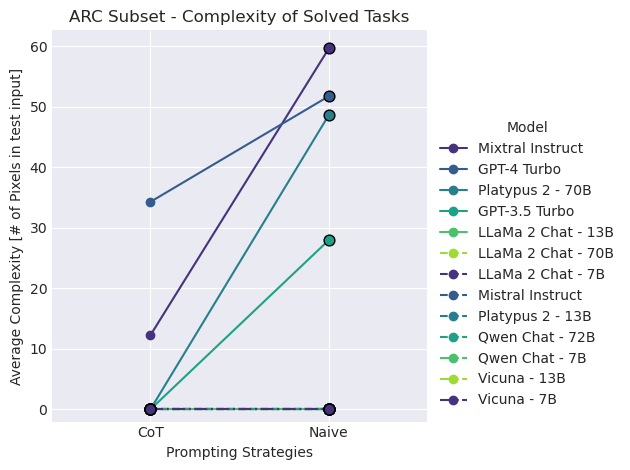

In [44]:
df_naive = pd.read_csv("results/baseline_naive/arc/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc/summary.csv")
df_cot["run"] = "CoT"
df = pd.concat([df_cot, df_naive])
df = df[df['model'].str.contains('gpt-', case=False, na=False) | df['model'].str.contains('Instruct', case=False, na=False) | df['model'].str.contains('Platypus', case=False, na=False) | df['model'].str.contains('chat', case=False, na=False) | df['model'].str.contains('Chat', case=False, na=False) | df['model'].str.contains('vicuna', case=False, na=False)]
plot_model_performance_across_runs(df, "run", "avg_complexity", task="arc", value_ticks=None)


#### Chain of thought analysis

In [ ]:
# manually analyze 
df = pd.read_csv("results/baseline_cot/arc/summary.csv")
analyze_random_tasks(df, "arc", "baseline_cot", n_models=3, n_tasks=20, only_unsolved=False, only_solved=True, starting_index=0, only_save_as_txt=True)


In [45]:
path="results/baseline_cot/arc/manual_task_analysis.xlsx"
task_analysis_arc, unsolved_arc, solved_arc  = get_task_analysis_kpi(path)
task_analysis_arc

run  n_tasks  \
0      naive_cot_gpt4_unsolved       10   
1        naive_cot_gpt4_solved       10   
2          naive_cot_gpt4_both       20   
3      naive_cot_gpt3_unsolved       10   
4        naive_cot_gpt3_solved        2   
5          naive_cot_gpt3_both       12   
6   naive_cot_mixtral_unsolved       10   
7     naive_cot_mixtral_solved        4   
8       naive_cot_mixtral_both       14   
9                 all_unsolved       30   
10                  all_solved       16   
11                    all_both       46   

    description_correct_and_complete_fraction_of_n_tasks  \
0                                            0.300000      
1                                            0.800000      
2                                            0.550000      
3                                            0.100000      
4                                            1.000000      
5                                            0.250000      
6                                            0.100000      
7                                            0.000000      
8                                            0.071429      
9                                            0.166667      
10                                           0.625000      
11                                           0.326087      

    description_correct_but_missing_relevant_details_fraction_of_n_tasks  \
0                                            0.100000                      
1                                            0.100000                      
2                                            0.100000                      
3                                            0.300000                      
4                                            0.000000                      
5                                            0.250000                      
6                                            0.200000                      
7                                            0.000000                      
8                                            0.142857                      
9                                            0.200000                      
10                                           0.062500                      
11                                           0.152174                      

    description_wrong_fraction_of_n_tasks  \
0                                0.600000   
1                                0.100000   
2                                0.350000   
3                                0.600000   
4                                0.000000   
5                                0.500000   
6                                0.700000   
7                                1.000000   
8                                0.785714   
9                                0.633333   
10                               0.312500   
11                               0.521739   

    description_error_bc_bad_object_detection_fraction_of_incorrect_descriptions  \
0                                            0.714286                              
1                                            0.500000                              
2                                            0.666667                              
3                                            0.888889                              
4                                            0.000000                              
5                                            0.888889                              
6                                            0.777778                              
7                                            0.250000                              
8                                            0.615385                              
9                                            0.800000                              
10                                           0.333333                              
11                                           0.709677                              

    test_case_desc

In [ ]:
sankey_edges_solved = get_sankey_source_data(solved_arc)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='ARC Subset: Chain-of-Thought Analysis of Solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
sankey_edges_unsolved = get_sankey_source_data(unsolved_arc)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='ARC Subset: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
sankey_edges_both = get_sankey_source_data(pd.concat([unsolved_arc, solved_arc]))
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_both, label='ARC Subset: Chain-of-Thought Analysis of Solved and Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

### All

In [46]:
path="results/baseline_cot/arc_1D/manual_task_analysis.xlsx"
task_analysis_1D, unsolved_1D, solved_1D = get_task_analysis_kpi(path)
path="results/baseline_cot/arc_h_v/manual_task_analysis.xlsx"
task_analysis_arc_h_v, unsolved_arc_h_v, solved_arc_h_v = get_task_analysis_kpi(path)
path="results/baseline_cot/arc/manual_task_analysis.xlsx"
task_analysis_arc, unsolved_arc, solved_arc  = get_task_analysis_kpi(path)
all_samples = pd.concat([unsolved_1D, solved_1D, unsolved_arc_h_v, solved_arc_h_v, unsolved_arc, solved_arc])
all_unsolved = pd.concat([unsolved_1D, unsolved_arc_h_v, unsolved_arc])
all_unsolved = pd.concat([unsolved_arc])
all_solved = pd.concat([solved_1D, solved_arc_h_v, solved_arc])
all_solved = pd.concat([solved_arc])

#### GPT 4

In [ ]:
sankey_edges_unsolved = get_sankey_source_data(all_unsolved[all_unsolved["model"] == "gpt4"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='GPT-4: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
sankey_edges_solved = get_sankey_source_data(all_solved[all_solved["model"] == "gpt4"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='GPT-4: Chain-of-Thought Analysis of Solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
sankey_edges_all = get_sankey_source_data(all_samples[all_samples["model"] == "gpt4"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_all, label='GPT-4: Chain-of-Thought Analysis of Solved and Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

#### GPT-3.5

In [ ]:
sankey_edges_unsolved = get_sankey_source_data(all_unsolved[all_unsolved["model"] == "gpt3"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='GPT-3: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
sankey_edges_solved = get_sankey_source_data(all_solved[all_solved["model"] == "gpt3"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='GPT-3: Chain-of-Thought Analysis of Solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

#### Mixtral

In [ ]:
sankey_edges_unsolved = get_sankey_source_data(all_unsolved[all_unsolved["model"] == "mixtral"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='Mixtral Instruct: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
sankey_edges_solved = get_sankey_source_data(all_solved[all_solved["model"] == "mixtral"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='Mixtral Instruct: Chain-of-Thought Analysis of Solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

## Tree of Thought

### 1D ARC

#### Plots

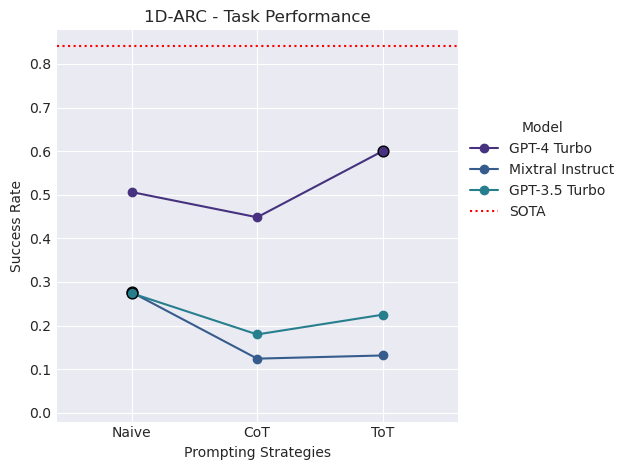

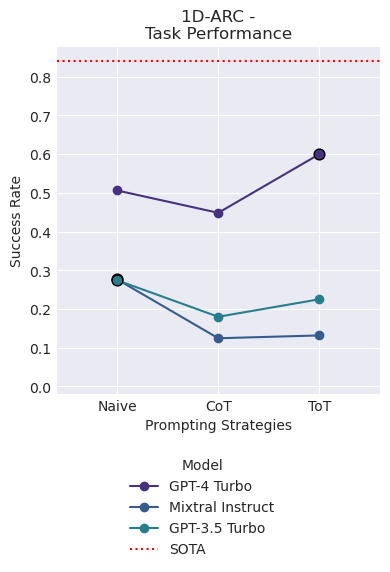

In [47]:
df_naive = pd.read_csv("results/baseline_naive/arc_1D/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df_cot["run"] = "CoT"
df_tot = pd.read_csv("results/tot_normal/arc_1D/summary.csv")
df_tot["run"] = "ToT"
df = pd.concat([df_naive, df_cot, df_tot])
filtered_df = df[df['model'].str.contains('gpt-', case=False, na=False) | df['model'].str.contains('Mixtral-8x7B-Instruct', case=False, na=False)]
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_1D", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_1D", SOTA=SOTA, value_ticks=None, small_fig=True)

In [48]:
filtered_df[["model", "success_rate", "run"]]

model  success_rate    run
2                     gpt-3.5-turbo-1106      0.274140  Naive
35                    gpt-4-1106-preview      0.506104  Naive
37  mistralai/Mixtral-8x7B-Instruct-v0.1      0.276360  Naive
0                     gpt-3.5-turbo-1106      0.179800    CoT
1                     gpt-4-1106-preview      0.448391    CoT
12  mistralai/Mixtral-8x7B-Instruct-v0.1      0.124306    CoT
0                     gpt-4-1106-preview      0.600000    ToT
1                     gpt-3.5-turbo-1106      0.225000    ToT
2   mistralai/Mixtral-8x7B-Instruct-v0.1      0.131579    ToT

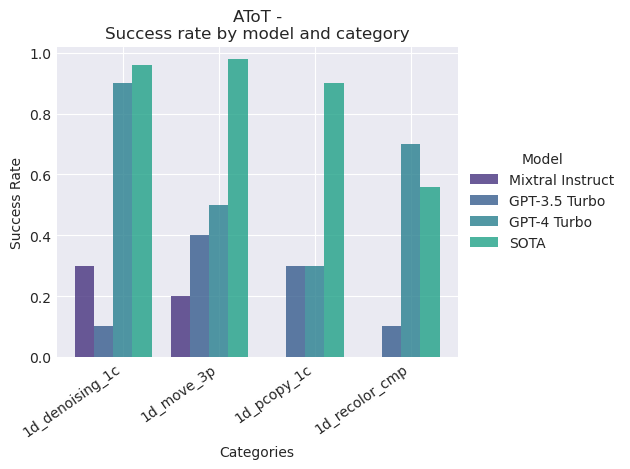

In [49]:
# compare tot of different models
df_tot = pd.read_csv("results/tot_normal/arc_1D/summary.csv")
plot_grouped_bar_chart(df_tot, top_n_models=3, SOTA=SOTA["arc_1D"])


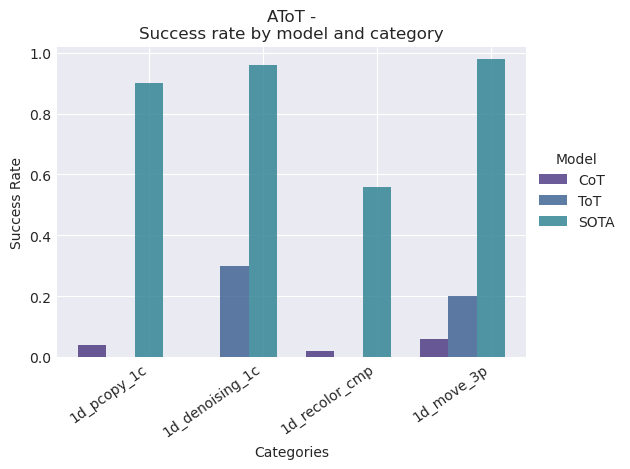

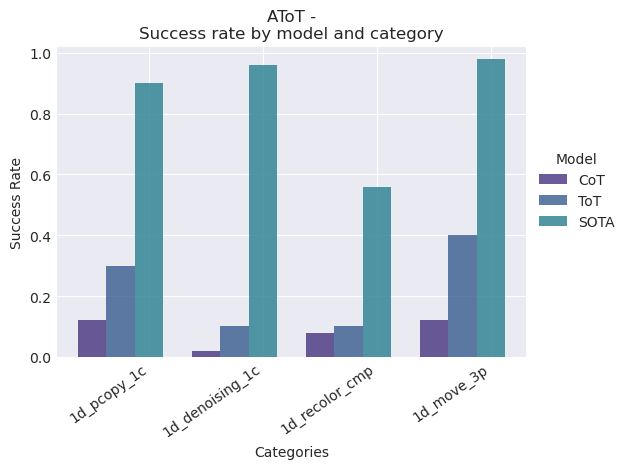

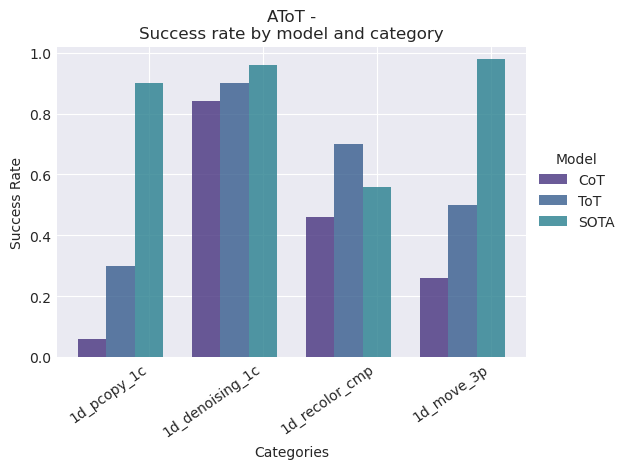

In [3]:
# compare cot and tot of single models
models = ["gpt-3", "gpt-4", "Mixtral-8x7B-Instruct"]
dfs = {}
df_cot = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df_tot = pd.read_csv("results/tot_normal/arc_1D/summary.csv")
for m in models:
    df_cot_tmp = df_cot[df_cot['model'].str.contains(m, case=False, na=False)]
    df_cot_tmp["model"] = "CoT"
    df_tot_tmp = df_tot[df_tot['model'].str.contains(m, case=False, na=False)]
    df_tot_tmp["model"] = "ToT"
    columns = list(set(df_tot_tmp.columns).intersection(set(df_cot_tmp.columns)))
    df_cot_tmp = df_cot_tmp[columns]
    dfs[m] = pd.concat([df_cot_tmp, df_tot_tmp])

plot_grouped_bar_chart(dfs["Mixtral-8x7B-Instruct"], top_n_models=2, SOTA=SOTA["arc_1D"])
plot_grouped_bar_chart(dfs["gpt-3"], top_n_models=2, SOTA=SOTA["arc_1D"])
plot_grouped_bar_chart(dfs["gpt-4"], top_n_models=2, SOTA=SOTA["arc_1D"])


#### Chain of thought analysis

In [ ]:
#################################
# TODO: change data to subset
#################################

# manually analyze # TODO: change data in tot src
df = pd.read_csv("results/tot_normal/arc_1D/summary.csv")
analyze_random_tasks(df, "arc_1D", "tot_normal", n_models=3, n_tasks=20, only_unsolved=True, only_solved=False, starting_index=0, only_save_as_txt=True)


In [4]:
path="results/tot_normal/arc_1D/manual_task_analysis.xlsx"
task_analysis_1D, unsolved_1D, solved_1D = get_task_analysis_kpi(path)
task_analysis_1D

run  step_1_both_sampled_fraction_of_n_tasks  \
0      naive_cot_gpt4_unsolved                                 0.300000   
1        naive_cot_gpt4_solved                                 0.400000   
2          naive_cot_gpt4_both                                 0.350000   
3      naive_cot_gpt3_unsolved                                 0.100000   
4        naive_cot_gpt3_solved                                 0.333333   
5          naive_cot_gpt3_both                                 0.210526   
6   naive_cot_mixtral_unsolved                                 0.000000   
7     naive_cot_mixtral_solved                                 0.200000   
8       naive_cot_mixtral_both                                 0.066667   
9                 all_unsolved                                 0.133333   
10                  all_solved                                 0.333333   
11                    all_both                                 0.222222   

    step_2_both_sampled_fraction_of_n_tasks  \
0                                  0.200000   
1                                  0.600000   
2                                  0.400000   
3                                  0.200000   
4                                  0.000000   
5                                  0.105263   
6                                  0.100000   
7                                  0.200000   
8                                  0.133333   
9                                  0.166667   
10                                 0.291667   
11                                 0.222222   

    step_3_both_sampled_fraction_of_n_tasks  \
0                                  0.000000   
1                                  0.100000   
2                                  0.050000   
3                                  0.100000   
4                                  0.000000   
5                                  0.052632   
6                                  0.100000   
7                                  0.200000   
8                                  0.133333   
9                                  0.066667   
10                                 0.083333   
11                                 0.074074   

    step_4_both_sampled_fraction_of_n_tasks  \
0                                  0.200000   
1                                  0.900000   
2                                  0.550000   
3                                  0.000000   
4                                  0.888889   
5                                  0.421053   
6                                  0.000000   
7                                  1.000000   
8                                  0.333333   
9                                  0.066667   
10                                 0.916667   
11                                 0.444444   

    step_1_only_correct_sampled_fraction_of_n_tasks  \
0                                          0.100000   
1                                          0.400000   
2                                          0.250000   
3                                          0.100000   
4                                          0.111111   
5                                          0.105263   
6                                          0.000000   
7                                          0.000000   
8                                          0.000000   
9                                          0.066667   
10                                         0.208333   
11                                         0.129630   

    step_2_only_correct_sampled_fraction_of_n_tasks  \
0                                          0.000000   
1                                          0.300000   
2                                          0.150000   
3                                          0.000000   
4                                          0.000000   
5                                          0.000000   
6                                          0.000000   
7                                          0.000000   
8   

##### Chain of thought Flow

In [ ]:
sankey_edges_unsolved = get_sankey_source_data(unsolved_1D)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='1D-ARC: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
sankey_edges_solved = get_sankey_source_data(solved_1D)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='1D-ARC: Chain-of-Thought Analysis of solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
# sankey_edges_both = get_sankey_source_data(pd.concat([unsolved_1D, solved_1D]), only_best_node=True)
sankey_edges_both = get_sankey_source_data(pd.concat([unsolved_1D, solved_1D]))
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_both, label='1D-ARC: Chain-of-Thought Analysis of Solved and Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

##### Tree of thought analysis

In [5]:
path="results/tot_normal/arc_1D/manual_task_analysis.xlsx"
task_analysis_1D, unsolved_1D, solved_1D = get_task_analysis_kpi(path)
task_analysis_1D

run  step_1_both_sampled_fraction_of_n_tasks  \
0      naive_cot_gpt4_unsolved                                 0.300000   
1        naive_cot_gpt4_solved                                 0.400000   
2          naive_cot_gpt4_both                                 0.350000   
3      naive_cot_gpt3_unsolved                                 0.100000   
4        naive_cot_gpt3_solved                                 0.333333   
5          naive_cot_gpt3_both                                 0.210526   
6   naive_cot_mixtral_unsolved                                 0.000000   
7     naive_cot_mixtral_solved                                 0.200000   
8       naive_cot_mixtral_both                                 0.066667   
9                 all_unsolved                                 0.133333   
10                  all_solved                                 0.333333   
11                    all_both                                 0.222222   

    step_2_both_sampled_fraction_of_n_tasks  \
0                                  0.200000   
1                                  0.600000   
2                                  0.400000   
3                                  0.200000   
4                                  0.000000   
5                                  0.105263   
6                                  0.100000   
7                                  0.200000   
8                                  0.133333   
9                                  0.166667   
10                                 0.291667   
11                                 0.222222   

    step_3_both_sampled_fraction_of_n_tasks  \
0                                  0.000000   
1                                  0.100000   
2                                  0.050000   
3                                  0.100000   
4                                  0.000000   
5                                  0.052632   
6                                  0.100000   
7                                  0.200000   
8                                  0.133333   
9                                  0.066667   
10                                 0.083333   
11                                 0.074074   

    step_4_both_sampled_fraction_of_n_tasks  \
0                                  0.200000   
1                                  0.900000   
2                                  0.550000   
3                                  0.000000   
4                                  0.888889   
5                                  0.421053   
6                                  0.000000   
7                                  1.000000   
8                                  0.333333   
9                                  0.066667   
10                                 0.916667   
11                                 0.444444   

    step_1_only_correct_sampled_fraction_of_n_tasks  \
0                                          0.100000   
1                                          0.400000   
2                                          0.250000   
3                                          0.100000   
4                                          0.111111   
5                                          0.105263   
6                                          0.000000   
7                                          0.000000   
8                                          0.000000   
9                                          0.066667   
10                                         0.208333   
11                                         0.129630   

    step_2_only_correct_sampled_fraction_of_n_tasks  \
0                                          0.000000   
1                                          0.300000   
2                                          0.150000   
3                                          0.000000   
4                                          0.000000   
5                                          0.000000   
6                                          0.000000   
7                                          0.000000   
8   

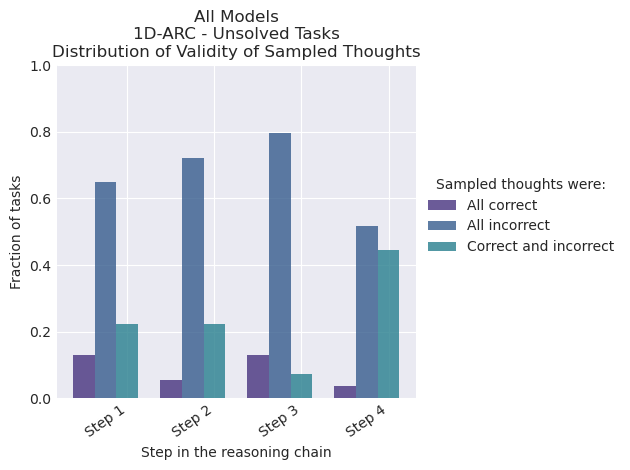

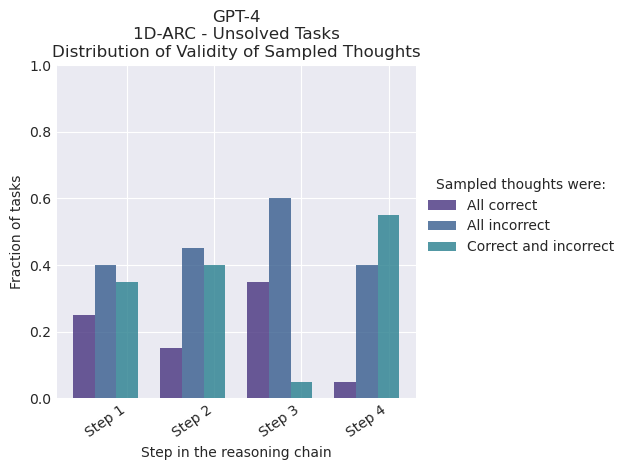

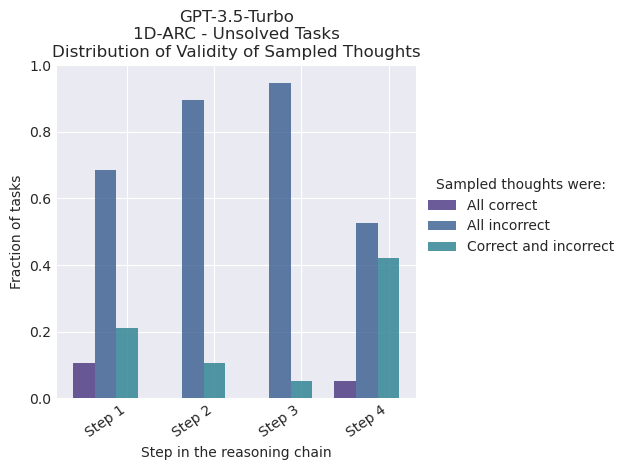

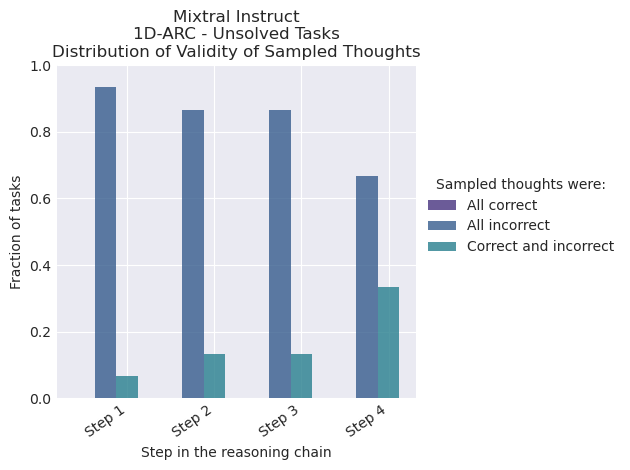

In [6]:
for x in ["all_both", "gpt4_both", "gpt3_both", "mixtral_both"]:
    df = pd.DataFrame()
    filtered_df = task_analysis_1D[task_analysis_1D['run'].str.contains(x, na=False)]
    df["sampled_thoughts"] = [x.split("_")[0]+"_only_correct", x.split("_")[0]+"_only_incorrect", x.split("_")[0]+"_both"]
    for i in range(1,5):
        df[f"step_{i}"] = [filtered_df[f"step_{i}_only_correct_sampled_fraction_of_n_tasks"].iloc[0], filtered_df[f"step_{i}_only_incorrect_sampled_fraction_of_n_tasks"].iloc[0], filtered_df[f"step_{i}_both_sampled_fraction_of_n_tasks"].iloc[0]]
    plot_grouped_bar_chart(df, group_by="sampled_thoughts", group_col="steps",top_n_models=None)

In [ ]:
# for x in ["all_both", "gpt4_both", "gpt3_both", "mixtral_both"]:
#     df = pd.DataFrame()
#     filtered_df = task_analysis_1D[task_analysis_1D['run'].str.contains(x, na=False)]
#     plot_grouped_bar_chart(filtered_df, group_by="run", group_col="both_sampled_fraction_of_n_tasks",top_n_models=None)

In [ ]:
# for x in ["all_both", "gpt4", "gpt3", "mixtral"]:
#     df = pd.DataFrame()
#     filtered_df = task_analysis_1D[task_analysis_1D['run'].str.contains(x, na=False)]
#     plot_grouped_bar_chart(filtered_df, group_by="run", group_col="both_sampled_fraction_of_n_tasks",top_n_models=None)

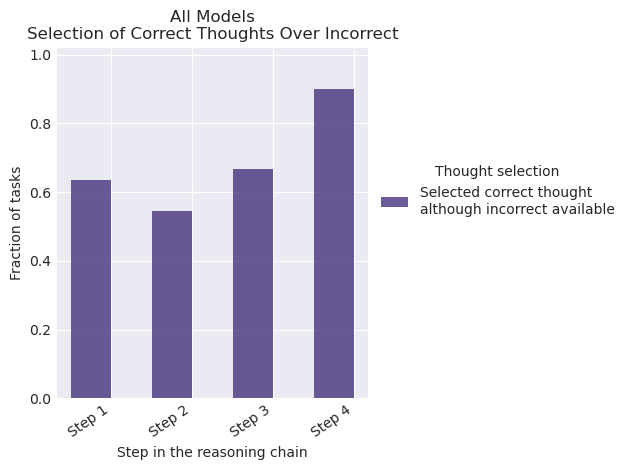

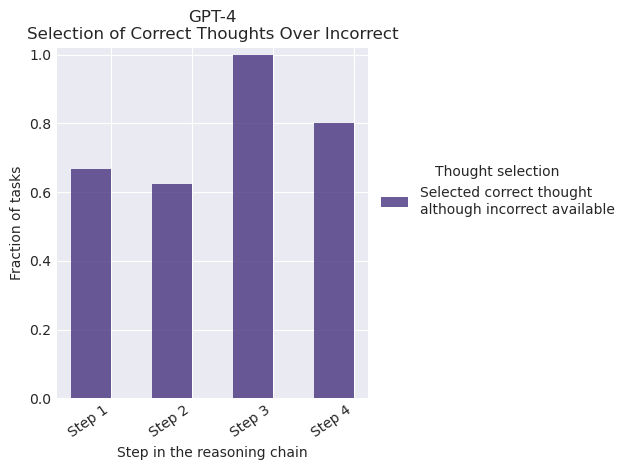

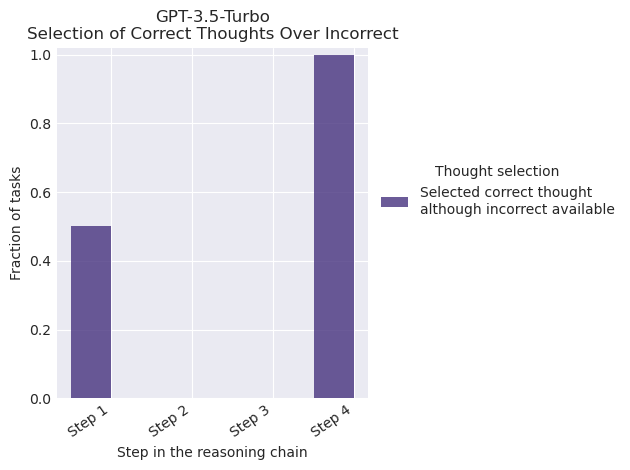

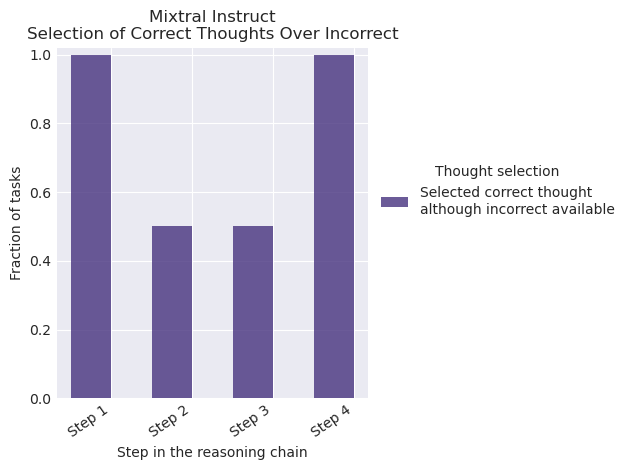

In [7]:
for x in ["all_both", "gpt4_both", "gpt3_both", "mixtral_both"]:
    df = pd.DataFrame()
    filtered_df = task_analysis_1D[task_analysis_1D['run'].str.contains(x, na=False)]
    df["chosen_thoughts"] = [x.split("_")[0]+"_correct_when_incorrect_exist"]#, x.split("_")[0]+"_incorrect_when_correct_exist"]
    for i, step in enumerate(["description", "pattern", "instructions", "transformation"], 1):
        df[f"step_{i}"] = [filtered_df[f"correct_{step}_chosen_although_incorrect_available_fraction_of_tasks_w_correct_and_incorrect"].iloc[0]]#, filtered_df[f"incorrect_{step}_chosen_although_correct_available_fraction_of_tasks_w_correct_and_incorrect"].iloc[0]]
    plot_grouped_bar_chart(df, group_by="chosen_thoughts", group_col="steps",top_n_models=None)

### ARC H vs V

#### Plots

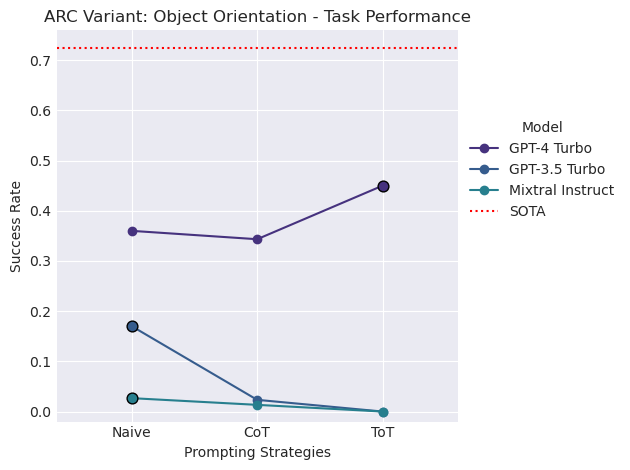

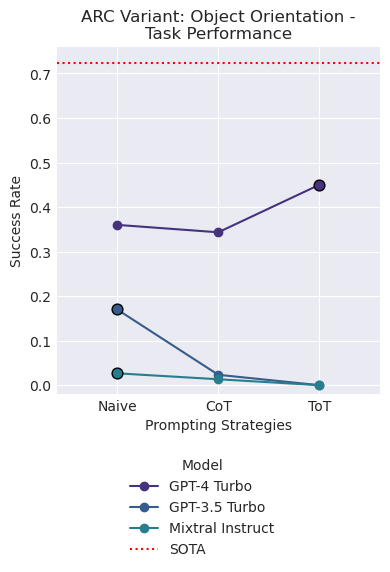

In [8]:
df_naive = pd.read_csv("results/baseline_naive/arc_h_v/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df_cot["run"] = "CoT"
df_tot = pd.read_csv("results/tot_normal/arc_h_v/summary.csv")
df_tot["run"] = "ToT"
df = pd.concat([df_naive, df_cot, df_tot])
filtered_df = df[df['model'].str.contains('gpt-', case=False, na=False) | 
                 df['model'].str.contains('Mixtral-8x7B-Instruct', case=False, na=False)]
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_h_v", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_h_v", SOTA=SOTA, value_ticks=None, small_fig=True)

In [9]:
filtered_df[["model", "success_rate", "run"]]

model  success_rate    run
2                     gpt-3.5-turbo-1106      0.170000  Naive
4                     gpt-4-1106-preview      0.360000  Naive
38  mistralai/Mixtral-8x7B-Instruct-v0.1      0.026667  Naive
0                     gpt-3.5-turbo-1106      0.023333    CoT
1                     gpt-4-1106-preview      0.343333    CoT
12  mistralai/Mixtral-8x7B-Instruct-v0.1      0.013333    CoT
0                     gpt-4-1106-preview      0.450000    ToT
1                     gpt-3.5-turbo-1106      0.000000    ToT
2   mistralai/Mixtral-8x7B-Instruct-v0.1      0.000000    ToT

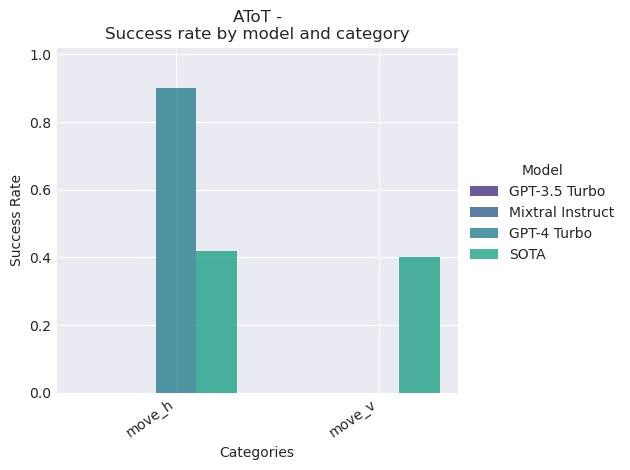

In [10]:
# compare tot of different models
df_tot = pd.read_csv("results/tot_normal/arc_h_v/summary.csv")
plot_grouped_bar_chart(df_tot, top_n_models=3, SOTA=SOTA["arc_h_v"])


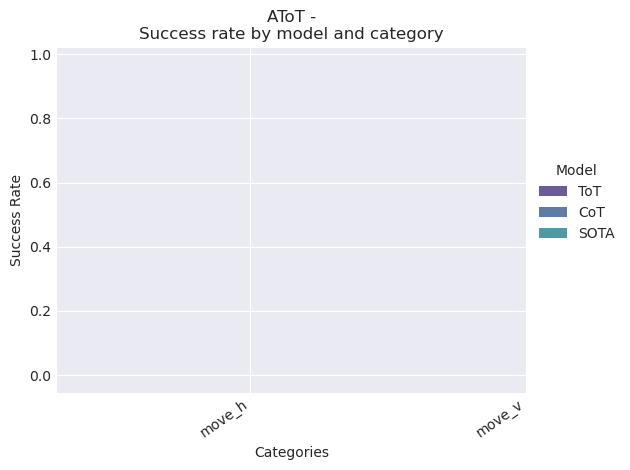

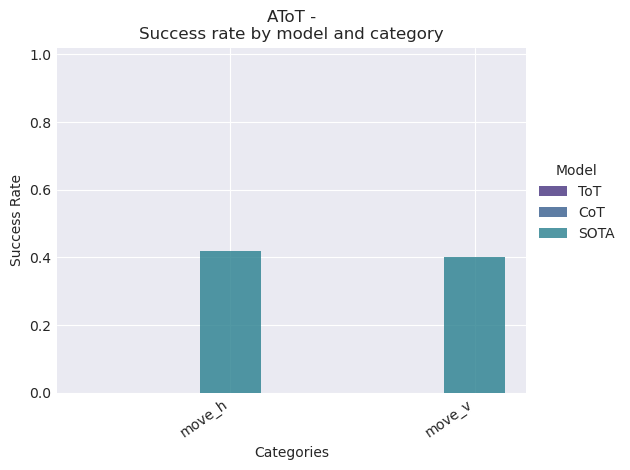

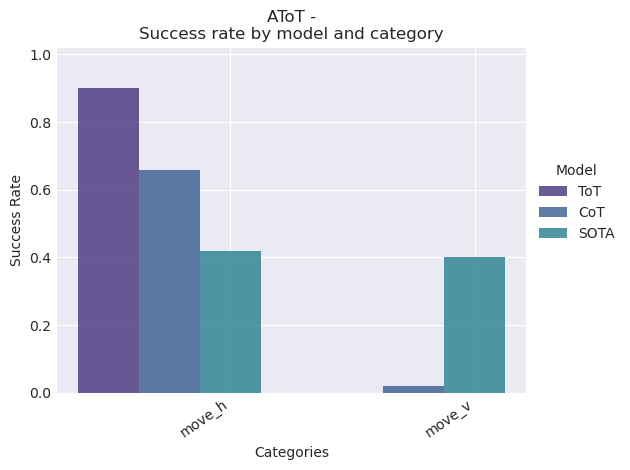

In [11]:
# compare cot and tot of single models
models = ["gpt-3", "gpt-4", "Mixtral-8x7B-Instruct"]
dfs = {}
df_cot = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df_tot = pd.read_csv("results/tot_normal/arc_h_v/summary.csv")
for m in models:
    df_cot_tmp = df_cot[df_cot['model'].str.contains(m, case=False, na=False)]
    df_cot_tmp["model"] = "CoT"
    df_tot_tmp = df_tot[df_tot['model'].str.contains(m, case=False, na=False)]
    df_tot_tmp["model"] = "ToT"
    filter_cols = [col for col in df_tot_tmp.columns if "cat" in col] + ["model"]
    df_cot_tmp = df_cot_tmp[filter_cols]
    dfs[m] = pd.concat([df_cot_tmp, df_tot_tmp])

plot_grouped_bar_chart(dfs["Mixtral-8x7B-Instruct"], top_n_models=2, SOTA=SOTA["arc_1D"])
plot_grouped_bar_chart(dfs["gpt-3"], top_n_models=2, SOTA=SOTA["arc_h_v"])
plot_grouped_bar_chart(dfs["gpt-4"], top_n_models=2, SOTA=SOTA["arc_h_v"])


#### Chain of thought analysis

In [ ]:
#################################
# TODO: change data to subset
#################################
# manually analyze # TODO: change data in tot src
df = pd.read_csv("results/tot_normal/arc_h_v/summary.csv")
analyze_random_tasks(df, "arc_h_v", "tot_normal", n_models=3, n_tasks=10, only_unsolved=False, only_solved=True, starting_index=0, only_save_as_txt=True)


In [12]:
path="results/tot_normal/arc_h_v/manual_task_analysis.xlsx"
task_analysis_arc_h_v, unsolved_arc_h_v, solved_arc_h_v = get_task_analysis_kpi(path)
task_analysis_arc_h_v

run  step_1_both_sampled_fraction_of_n_tasks  \
0      naive_cot_gpt4_unsolved                                 0.100000   
1        naive_cot_gpt4_solved                                 0.222222   
2          naive_cot_gpt4_both                                 0.157895   
3      naive_cot_gpt3_unsolved                                 0.000000   
4        naive_cot_gpt3_solved                                 0.000000   
5          naive_cot_gpt3_both                                 0.000000   
6   naive_cot_mixtral_unsolved                                 0.300000   
7     naive_cot_mixtral_solved                                 0.000000   
8       naive_cot_mixtral_both                                 0.300000   
9                 all_unsolved                                 0.133333   
10                  all_solved                                 0.222222   
11                    all_both                                 0.153846   

    step_2_both_sampled_fraction_of_n_tasks  \
0                                  0.000000   
1                                  0.555556   
2                                  0.263158   
3                                  0.000000   
4                                  0.000000   
5                                  0.000000   
6                                  0.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.000000   
10                                 0.555556   
11                                 0.128205   

    step_3_both_sampled_fraction_of_n_tasks  \
0                                  0.000000   
1                                  0.222222   
2                                  0.105263   
3                                  0.100000   
4                                  0.000000   
5                                  0.100000   
6                                  0.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.033333   
10                                 0.222222   
11                                 0.076923   

    step_4_both_sampled_fraction_of_n_tasks  \
0                                  0.000000   
1                                  0.888889   
2                                  0.421053   
3                                  0.000000   
4                                  0.000000   
5                                  0.000000   
6                                  0.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.000000   
10                                 0.888889   
11                                 0.205128   

    step_1_only_correct_sampled_fraction_of_n_tasks  \
0                                          0.000000   
1                                          0.333333   
2                                          0.157895   
3                                          0.200000   
4                                          0.000000   
5                                          0.200000   
6                                          0.000000   
7                                          0.000000   
8                                          0.000000   
9                                          0.066667   
10                                         0.333333   
11                                         0.128205   

    step_2_only_correct_sampled_fraction_of_n_tasks  \
0                                          0.100000   
1                                          0.333333   
2                                          0.210526   
3                                          0.000000   
4                                          0.000000   
5                                          0.000000   
6                                          0.000000   
7                                          0.000000   
8   

##### Chain of thought Flow

In [ ]:
sankey_edges_unsolved = get_sankey_source_data(unsolved_arc_h_v)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='2D ARC Variants: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
sankey_edges_solved = get_sankey_source_data(solved_arc_h_v)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='2D ARC Variants: Chain-of-Thought Analysis of solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
# sankey_edges_both = get_sankey_source_data(pd.concat([unsolved_arc_h_v, solved_1D]), only_best_node=True)
sankey_edges_both = get_sankey_source_data(pd.concat([unsolved_arc_h_v, solved_arc_h_v]))
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_both, label='2D ARC Variants: Chain-of-Thought Analysis of Solved and Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

##### Tree of thought analysis

In [13]:
path="results/tot_normal/arc_h_v/manual_task_analysis.xlsx"
task_analysis_arc_h_v, unsolved_arc_h_v, solved_arc_h_v = get_task_analysis_kpi(path)
task_analysis_arc_h_v

run  step_1_both_sampled_fraction_of_n_tasks  \
0      naive_cot_gpt4_unsolved                                 0.100000   
1        naive_cot_gpt4_solved                                 0.222222   
2          naive_cot_gpt4_both                                 0.157895   
3      naive_cot_gpt3_unsolved                                 0.000000   
4        naive_cot_gpt3_solved                                 0.000000   
5          naive_cot_gpt3_both                                 0.000000   
6   naive_cot_mixtral_unsolved                                 0.300000   
7     naive_cot_mixtral_solved                                 0.000000   
8       naive_cot_mixtral_both                                 0.300000   
9                 all_unsolved                                 0.133333   
10                  all_solved                                 0.222222   
11                    all_both                                 0.153846   

    step_2_both_sampled_fraction_of_n_tasks  \
0                                  0.000000   
1                                  0.555556   
2                                  0.263158   
3                                  0.000000   
4                                  0.000000   
5                                  0.000000   
6                                  0.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.000000   
10                                 0.555556   
11                                 0.128205   

    step_3_both_sampled_fraction_of_n_tasks  \
0                                  0.000000   
1                                  0.222222   
2                                  0.105263   
3                                  0.100000   
4                                  0.000000   
5                                  0.100000   
6                                  0.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.033333   
10                                 0.222222   
11                                 0.076923   

    step_4_both_sampled_fraction_of_n_tasks  \
0                                  0.000000   
1                                  0.888889   
2                                  0.421053   
3                                  0.000000   
4                                  0.000000   
5                                  0.000000   
6                                  0.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.000000   
10                                 0.888889   
11                                 0.205128   

    step_1_only_correct_sampled_fraction_of_n_tasks  \
0                                          0.000000   
1                                          0.333333   
2                                          0.157895   
3                                          0.200000   
4                                          0.000000   
5                                          0.200000   
6                                          0.000000   
7                                          0.000000   
8                                          0.000000   
9                                          0.066667   
10                                         0.333333   
11                                         0.128205   

    step_2_only_correct_sampled_fraction_of_n_tasks  \
0                                          0.100000   
1                                          0.333333   
2                                          0.210526   
3                                          0.000000   
4                                          0.000000   
5                                          0.000000   
6                                          0.000000   
7                                          0.000000   
8   

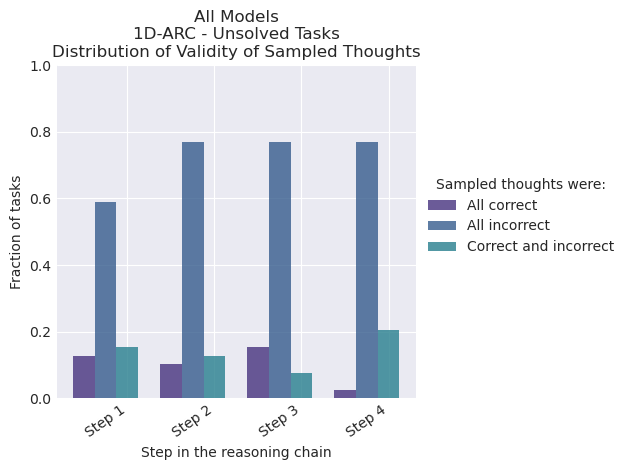

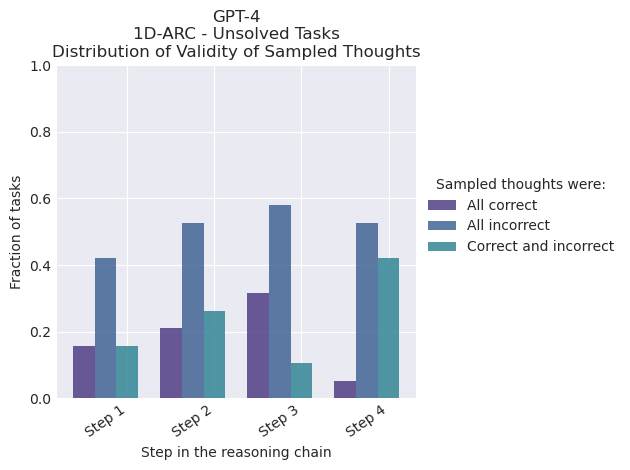

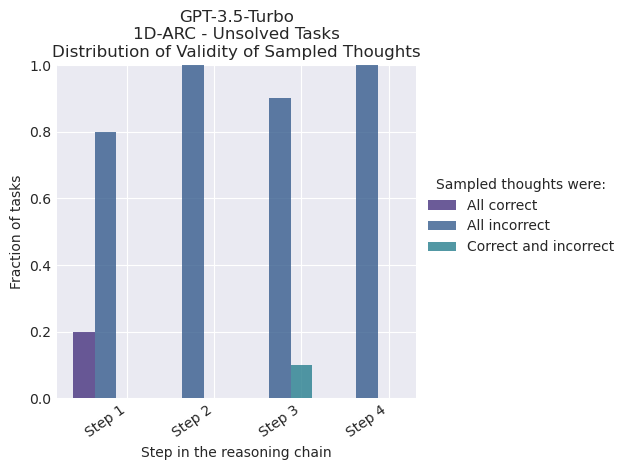

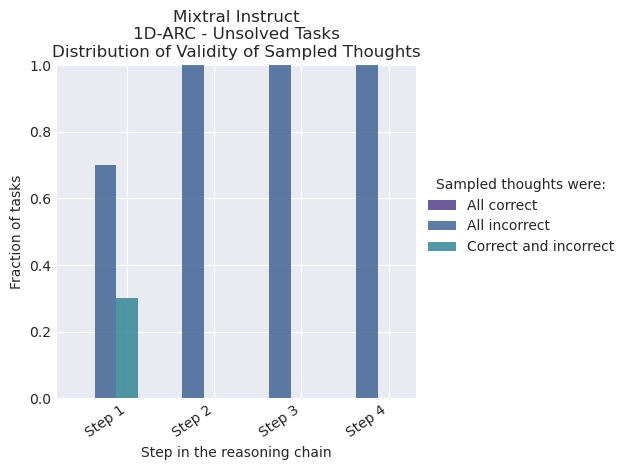

In [14]:
for x in ["all_both", "gpt4_both", "gpt3_both", "mixtral_both"]:
    df = pd.DataFrame()
    filtered_df = task_analysis_arc_h_v[task_analysis_arc_h_v['run'].str.contains(x, na=False)]
    df["sampled_thoughts"] = [x.split("_")[0]+"_only_correct", x.split("_")[0]+"_only_incorrect", x.split("_")[0]+"_both"]
    for i in range(1,5):
        df[f"step_{i}"] = [filtered_df[f"step_{i}_only_correct_sampled_fraction_of_n_tasks"].iloc[0], filtered_df[f"step_{i}_only_incorrect_sampled_fraction_of_n_tasks"].iloc[0], filtered_df[f"step_{i}_both_sampled_fraction_of_n_tasks"].iloc[0]]
    plot_grouped_bar_chart(df, group_by="sampled_thoughts", group_col="steps",top_n_models=None)

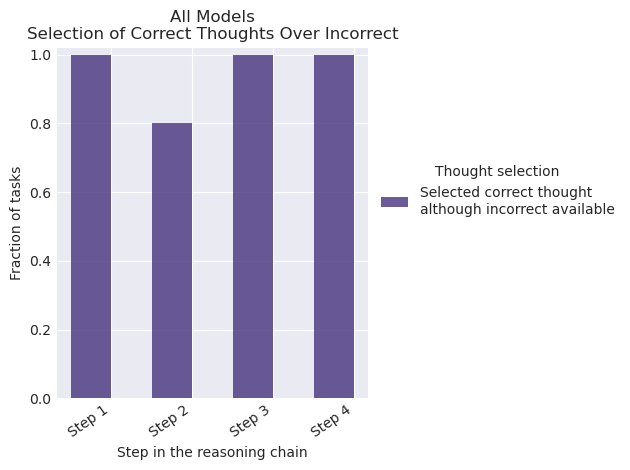

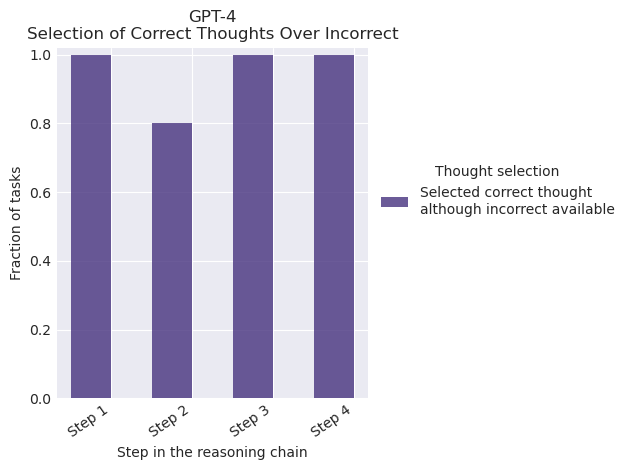

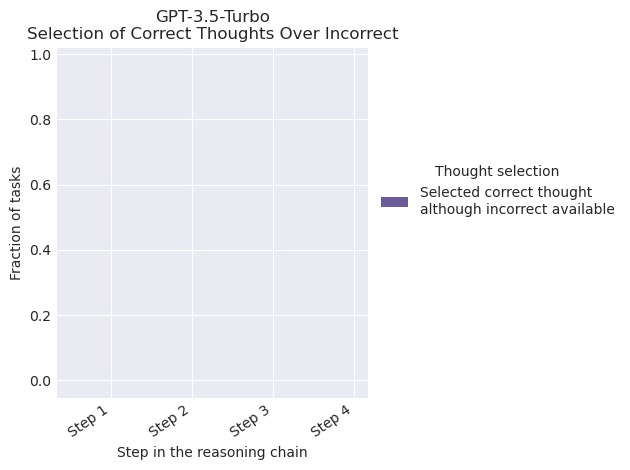

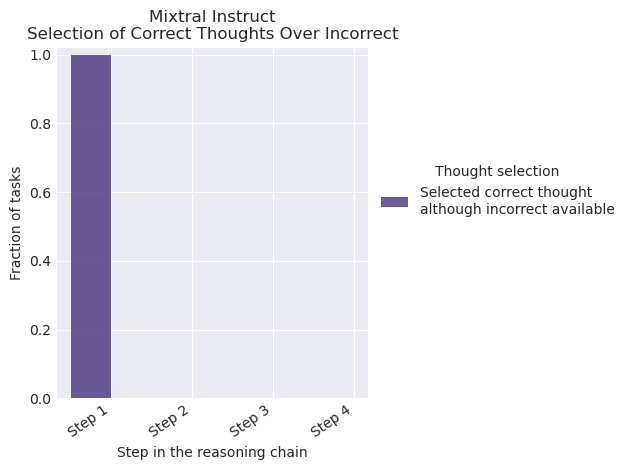

In [15]:
for x in ["all_both", "gpt4_both", "gpt3_both", "mixtral_both"]:
    df = pd.DataFrame()
    filtered_df = task_analysis_arc_h_v[task_analysis_arc_h_v['run'].str.contains(x, na=False)]
    df["chosen_thoughts"] = [x.split("_")[0]+"_correct_when_incorrect_exist"]#, x.split("_")[0]+"_incorrect_when_correct_exist"]
    for i, step in enumerate(["description", "pattern", "instructions", "transformation"], 1):
        df[f"step_{i}"] = [filtered_df[f"correct_{step}_chosen_although_incorrect_available_fraction_of_tasks_w_correct_and_incorrect"].iloc[0]]#, filtered_df[f"incorrect_{step}_chosen_although_correct_available_fraction_of_tasks_w_correct_and_incorrect"].iloc[0]]
    plot_grouped_bar_chart(df, group_by="chosen_thoughts", group_col="steps",top_n_models=None)

### ARC original

No experiments due to resource limitations.

### All

In [16]:
path="results/tot_normal/arc_1D/manual_task_analysis.xlsx"
task_analysis_1D, unsolved_1D, solved_1D = get_task_analysis_kpi(path)
# both_1D = pd.concat([unsolved_1D, solved_1D])
path="results/tot_normal/arc_h_v/manual_task_analysis.xlsx"
task_analysis_arc_h_v, unsolved_arc_h_v, solved_arc_h_v = get_task_analysis_kpi(path)
unsolved_all = pd.concat([unsolved_1D, unsolved_arc_h_v])
solved_all = pd.concat([solved_1D, solved_arc_h_v])
both_all = pd.concat([unsolved_1D, solved_1D, unsolved_arc_h_v, solved_arc_h_v])

#### GPT 4

In [ ]:
# sankey_edges_solved = get_sankey_source_data(solved_1D[solved_1D["model"] == "gpt4"])
sankey_edges_solved = get_sankey_source_data(solved_all[solved_all["model"] == "gpt4"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='GPT-4: Chain-of-Thought Analysis of Solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
# sankey_edges_unsolved = get_sankey_source_data(unsolved_1D[unsolved_1D["model"] == "gpt4"])
sankey_edges_unsolved = get_sankey_source_data(unsolved_all[unsolved_all["model"] == "gpt4"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='GPT-4: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
# sankey_edges_all = get_sankey_source_data(all_1D[all_1D["model"] == "gpt4"])
sankey_edges_all = get_sankey_source_data(both_all[both_all["model"] == "gpt4"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_all, label='GPT-4: Chain-of-Thought Analysis of Solved and Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

#### GPT 3

In [ ]:
# sankey_edges_solved = get_sankey_source_data(solved_1D[solved_1D["model"] == "gpt3"])
sankey_edges_solved = get_sankey_source_data(solved_all[solved_all["model"] == "gpt3"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='GPT-3: Chain-of-Thought Analysis of Solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
# sankey_edges_unsolved = get_sankey_source_data(unsolved_1D[unsolved_1D["model"] == "gpt3"])
sankey_edges_unsolved = get_sankey_source_data(unsolved_all[unsolved_all["model"] == "gpt3"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='GPT-3: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
# sankey_edges_all = get_sankey_source_data(all_1D[all_1D["model"] == "gpt3"])
sankey_edges_all = get_sankey_source_data(both_all[both_all["model"] == "gpt3"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_all, label='GPT-3: Chain-of-Thought Analysis of Solved and Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

##### Mixtral

In [ ]:
# sankey_edges_solved = get_sankey_source_data(solved_1D[solved_1D["model"] == "mixtral"])
sankey_edges_solved = get_sankey_source_data(solved_all[solved_all["model"] == "mixtral"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='Mixtral: Chain-of-Thought Analysis of Solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
# sankey_edges_unsolved = get_sankey_source_data(unsolved_1D[unsolved_1D["model"] == "mixtral"])
sankey_edges_unsolved = get_sankey_source_data(unsolved_all[unsolved_all["model"] == "mixtral"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='Mixtral: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
# sankey_edges_all = get_sankey_source_data(all_1D[all_1D["model"] == "mixtral"])
sankey_edges_all = get_sankey_source_data(both_all[both_all["model"] == "mixtral"])
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_all, label='Mixtral: Chain-of-Thought Analysis of Solved and Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

## Augmented CoT

### 1D ARC

#### Plots

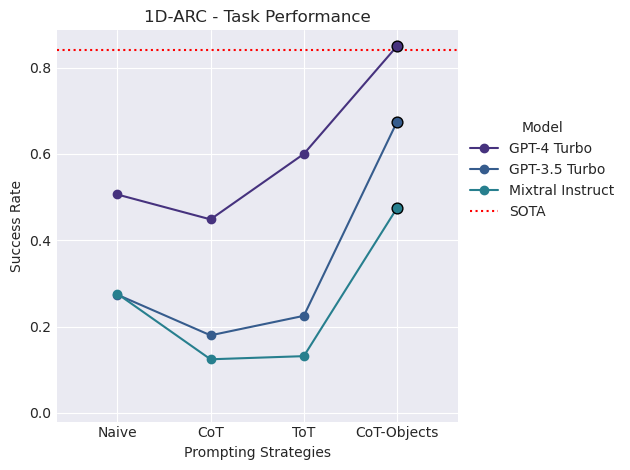

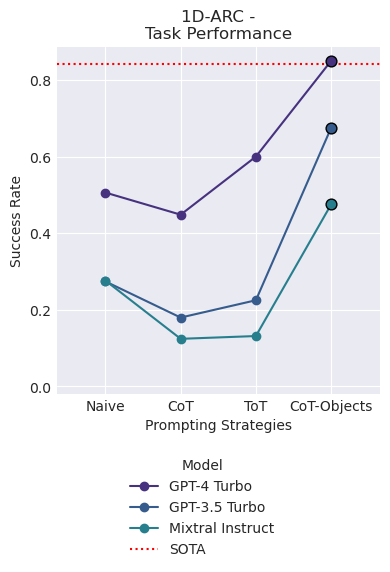

In [17]:
df_naive = pd.read_csv("results/baseline_naive/arc_1D/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df_cot["run"] = "CoT"
df_tot = pd.read_csv("results/tot_normal/arc_1D/summary.csv")
df_tot["run"] = "ToT"
df_cot_o = pd.read_csv("results/cot_objects/arc_1D/summary.csv")
df_cot_o["run"] = "CoT-O"
df_cot_o_rep = pd.read_csv("results/cot_objects/arc_1D/summary.csv")
df_cot_o_rep["success_rate"] = df_cot_o_rep["object_info_object_representation_success_rate"]
df_cot_o_rep["run"] = "CoT-Objects"
df = pd.concat([df_naive, df_cot, df_tot, df_cot_o, df_cot_o_rep])
df = pd.concat([df_naive, df_cot, df_tot, df_cot_o_rep])
filtered_df = df[df['model'].str.contains('gpt-', case=False, na=False) | df['model'].str.contains('Mixtral-8x7B-Instruct', case=False, na=False)]
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_1D", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_1D", SOTA=SOTA, value_ticks=None, small_fig=True)

In [18]:
filtered_df[["model", "success_rate", "run"]]

model  success_rate          run
2                     gpt-3.5-turbo-1106      0.274140        Naive
35                    gpt-4-1106-preview      0.506104        Naive
37  mistralai/Mixtral-8x7B-Instruct-v0.1      0.276360        Naive
0                     gpt-3.5-turbo-1106      0.179800          CoT
1                     gpt-4-1106-preview      0.448391          CoT
12  mistralai/Mixtral-8x7B-Instruct-v0.1      0.124306          CoT
0                     gpt-4-1106-preview      0.600000          ToT
1                     gpt-3.5-turbo-1106      0.225000          ToT
2   mistralai/Mixtral-8x7B-Instruct-v0.1      0.131579          ToT
0                     gpt-3.5-turbo-1106      0.675000  CoT-Objects
1                     gpt-4-1106-preview      0.850000  CoT-Objects
2   mistralai/Mixtral-8x7B-Instruct-v0.1      0.475000  CoT-Objects

##### Same Run: grid output vs. object cmp

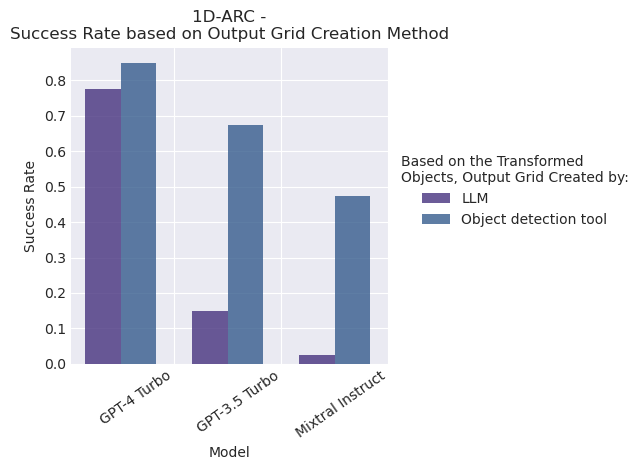

In [19]:
# compare cot_o overall result vs. object representation of output correct  --- All three models
df_cot_o = pd.read_csv("results/cot_objects/arc_1D/summary.csv")
df_cot_o_rep = df_cot_o.copy()
# display(df_cot_o_rep)
plot_grouped_bar_chart(df_cot_o_rep, group_by=["success_rate", "object_info_object_representation_success_rate"], group_col="obj_cmp", top_n_models=10, asc=False, SOTA=None, highlight_pretrained_models=True)


In [20]:
df_cot_o_rep[["success_rate", "object_info_object_representation_success_rate", "model"]]

success_rate  object_info_object_representation_success_rate  \
0         0.150                                           0.675   
1         0.775                                           0.850   
2         0.025                                           0.475   

                                  model  
0                    gpt-3.5-turbo-1106  
1                    gpt-4-1106-preview  
2  mistralai/Mixtral-8x7B-Instruct-v0.1

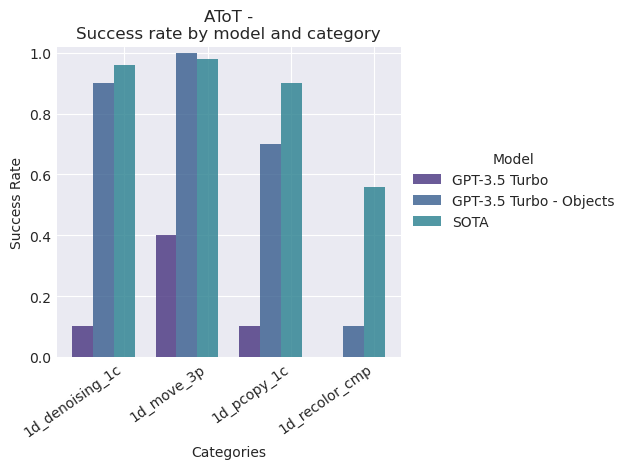

In [3]:
# compare cot_o overall result vs. object representation of output correct  --- GPT 3
df_cot_o = pd.read_csv("results/cot_objects/arc_1D/summary.csv")
df_cot_o_rep = df_cot_o.copy()
df_cot_o_rep["model"] = df_cot_o_rep["model"] + "_rep"
df_cot_o_rep = df_cot_o_rep.loc[:, ~df_cot_o_rep.columns.str.startswith('cat_success')]
rename_cols = {col: col.replace('object_info_object_representation_', '') 
               for col in df_cot_o_rep.columns if col.startswith('object_info_object_representation_cat_success_rate')}
df_cot_o_rep = df_cot_o_rep.rename(columns=rename_cols)
df = pd.concat([df_cot_o, df_cot_o_rep])
filtered_df = df[df['model'].str.contains('gpt-3', case=False, na=False)]
plot_grouped_bar_chart(filtered_df, top_n_models=2, SOTA=SOTA["arc_1D"])


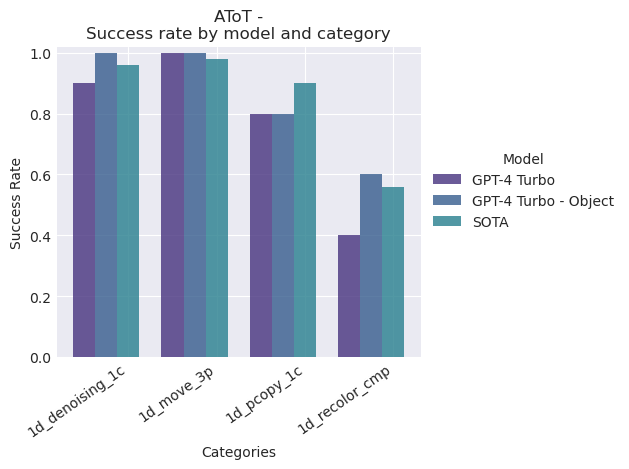

In [4]:
# compare cot_o overall result vs. object representation of output correct  --- GPT 4
df_cot_o = pd.read_csv("results/cot_objects/arc_1D/summary.csv")
df_cot_o_rep = df_cot_o.copy()
df_cot_o_rep["model"] = df_cot_o_rep["model"] + "_rep"
df_cot_o_rep = df_cot_o_rep.loc[:, ~df_cot_o_rep.columns.str.startswith('cat_success')]
rename_cols = {col: col.replace('object_info_object_representation_', '') 
               for col in df_cot_o_rep.columns if col.startswith('object_info_object_representation_cat_success_rate')}
df_cot_o_rep = df_cot_o_rep.rename(columns=rename_cols)
df = pd.concat([df_cot_o, df_cot_o_rep])
filtered_df = df[df['model'].str.contains('gpt-4', case=False, na=False)]
plot_grouped_bar_chart(filtered_df, top_n_models=2, SOTA=SOTA["arc_1D"])


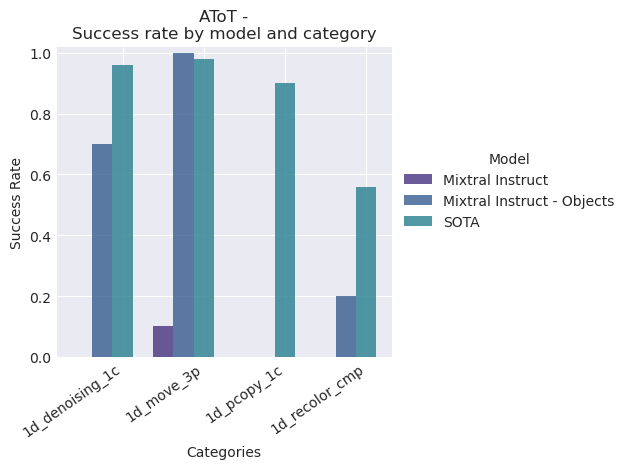

In [5]:
# compare cot_o overall result vs. object representation of output correct  --- Mixtral
df_cot_o = pd.read_csv("results/cot_objects/arc_1D/summary.csv")
df_cot_o_rep = df_cot_o.copy()
df_cot_o_rep["model"] = df_cot_o_rep["model"] + "_rep"
df_cot_o_rep = df_cot_o_rep.loc[:, ~df_cot_o_rep.columns.str.startswith('cat_success')]
rename_cols = {col: col.replace('object_info_object_representation_', '') 
               for col in df_cot_o_rep.columns if col.startswith('object_info_object_representation_cat_success_rate')}
df_cot_o_rep = df_cot_o_rep.rename(columns=rename_cols)
df = pd.concat([df_cot_o, df_cot_o_rep])
filtered_df = df[df['model'].str.contains('Mixtral-8x7B-Instruct', case=False, na=False)]
plot_grouped_bar_chart(filtered_df, top_n_models=2, SOTA=SOTA["arc_1D"])


##### Different Runs: normal CoT vs. object cmp 

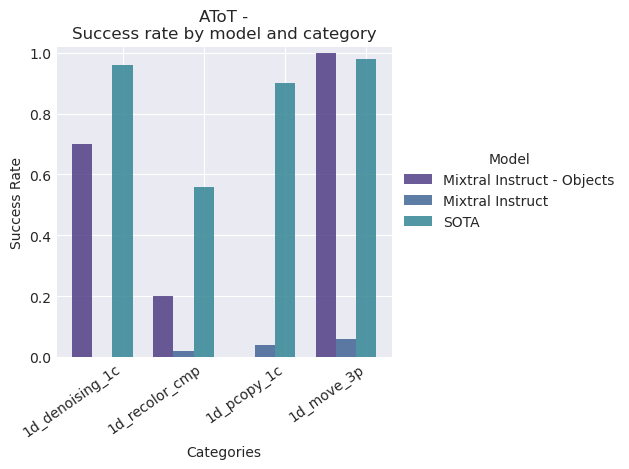

In [6]:
# compare cot_o overall result vs. object representation of output correct  --- Mixtral
df_cot = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df_cot_o = pd.read_csv("results/cot_objects/arc_1D/summary.csv")
df_cot_o_rep = df_cot_o.copy()
df_cot_o_rep["model"] = df_cot_o_rep["model"] + "_rep"
df_cot_o_rep = df_cot_o_rep.loc[:, ~df_cot_o_rep.columns.str.startswith('cat_success')]
rename_cols = {col: col.replace('object_info_object_representation_', '') 
               for col in df_cot_o_rep.columns if col.startswith('object_info_object_representation_cat_success_rate')}
df_cot_o_rep = df_cot_o_rep.rename(columns=rename_cols)
columns = list(set(df_cot.columns).intersection(set(df_cot_o_rep.columns)))
df = pd.concat([df_cot[columns], df_cot_o_rep[columns]])
filtered_df = df[df['model'].str.contains('Mixtral-8x7B-Instruct', case=False, na=False)]
plot_grouped_bar_chart(filtered_df, top_n_models=2, SOTA=SOTA["arc_1D"])


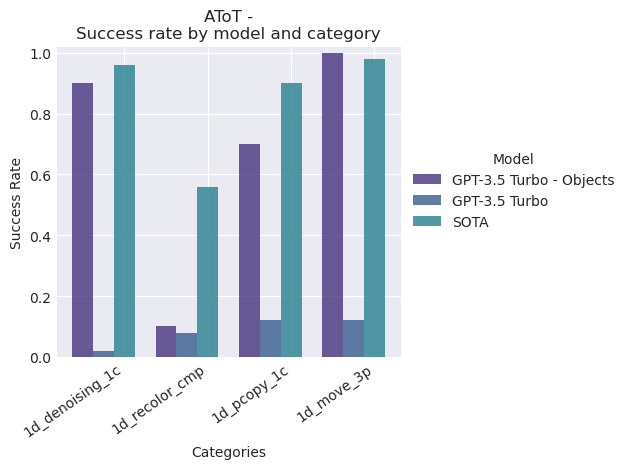

In [7]:
# compare cot_o overall result vs. object representation of output correct  --- GPT 3
df_cot = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df_cot_o = pd.read_csv("results/cot_objects/arc_1D/summary.csv")
df_cot_o_rep = df_cot_o.copy()
df_cot_o_rep["model"] = df_cot_o_rep["model"] + "_rep"
df_cot_o_rep = df_cot_o_rep.loc[:, ~df_cot_o_rep.columns.str.startswith('cat_success')]
rename_cols = {col: col.replace('object_info_object_representation_', '') 
               for col in df_cot_o_rep.columns if col.startswith('object_info_object_representation_cat_success_rate')}
df_cot_o_rep = df_cot_o_rep.rename(columns=rename_cols)
columns = list(set(df_cot.columns).intersection(set(df_cot_o_rep.columns)))
df = pd.concat([df_cot[columns], df_cot_o_rep[columns]])
filtered_df = df[df['model'].str.contains('gpt-3', case=False, na=False)]
plot_grouped_bar_chart(filtered_df, top_n_models=2, SOTA=SOTA["arc_1D"])


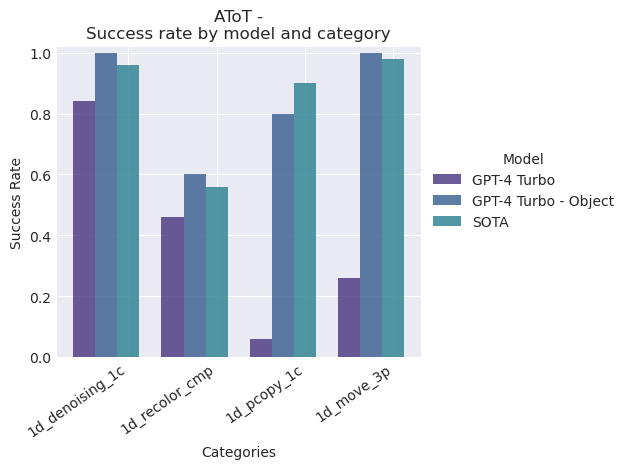

In [8]:
# compare cot_o overall result vs. object representation of output correct  --- GPT 4
df_cot = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df_cot_o = pd.read_csv("results/cot_objects/arc_1D/summary.csv")
df_cot_o_rep = df_cot_o.copy()
df_cot_o_rep["model"] = df_cot_o_rep["model"] + "_rep"
df_cot_o_rep = df_cot_o_rep.loc[:, ~df_cot_o_rep.columns.str.startswith('cat_success')]
rename_cols = {col: col.replace('object_info_object_representation_', '') 
               for col in df_cot_o_rep.columns if col.startswith('object_info_object_representation_cat_success_rate')}
df_cot_o_rep = df_cot_o_rep.rename(columns=rename_cols)
columns = list(set(df_cot.columns).intersection(set(df_cot_o_rep.columns)))
df = pd.concat([df_cot[columns], df_cot_o_rep[columns]])
filtered_df = df[df['model'].str.contains('gpt-4', case=False, na=False)]
plot_grouped_bar_chart(filtered_df, top_n_models=2, SOTA=SOTA["arc_1D"])


##### Same Run: only object cmp across models 

In [9]:
# compare cot_o overall result vs. object representation of output correct  --- GPT 3
df_cot_o = pd.read_csv("results/cot_objects/arc_1D/summary.csv")
df_cot_o_rep = df_cot_o.copy()
df_cot_o_rep["model"] = df_cot_o_rep["model"] #+ "_rep"
df_cot_o_rep = df_cot_o_rep.loc[:, ~df_cot_o_rep.columns.str.startswith('cat_success')]
rename_cols = {col: col.replace('object_info_object_representation_', '') 
               for col in df_cot_o_rep.columns if col.startswith('object_info_object_representation_cat_success_rate')}
df_cot_o_rep = df_cot_o_rep.rename(columns=rename_cols)
plot_grouped_bar_chart(df_cot_o_rep, top_n_models=3, SOTA=SOTA["arc_1D"])


### ARC H vs V

#### Plots

In [10]:
df_naive = pd.read_csv("results/baseline_naive/arc_h_v/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df_cot["run"] = "CoT"
df_tot = pd.read_csv("results/tot_normal/arc_h_v/summary.csv")
df_tot["run"] = "ToT"
df_cot_o = pd.read_csv("results/cot_objects/arc_h_v/summary.csv")
df_cot_o["run"] = "CoT-O"
df_cot_o_rep = pd.read_csv("results/cot_objects/arc_h_v/summary.csv")
df_cot_o_rep["success_rate"] = df_cot_o_rep["object_info_object_representation_success_rate"]
df_cot_o_rep["run"] = "CoT-Objects"
df = pd.concat([df_naive, df_cot, df_tot, df_cot_o, df_cot_o_rep])
df = pd.concat([df_naive, df_cot, df_tot, df_cot_o_rep])
filtered_df = df[df['model'].str.contains('gpt-', case=False, na=False) | df['model'].str.contains('Mixtral-8x7B-Instruct', case=False, na=False)]
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_h_v", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_h_v", SOTA=SOTA, value_ticks=None, small_fig=True)

In [11]:
filtered_df[["model", "success_rate", "run"]]

model  success_rate          run
2                     gpt-3.5-turbo-1106      0.170000        Naive
4                     gpt-4-1106-preview      0.360000        Naive
38  mistralai/Mixtral-8x7B-Instruct-v0.1      0.026667        Naive
0                     gpt-3.5-turbo-1106      0.023333          CoT
1                     gpt-4-1106-preview      0.343333          CoT
12  mistralai/Mixtral-8x7B-Instruct-v0.1      0.013333          CoT
0                     gpt-4-1106-preview      0.450000          ToT
1                     gpt-3.5-turbo-1106      0.000000          ToT
2   mistralai/Mixtral-8x7B-Instruct-v0.1      0.000000          ToT
0                     gpt-3.5-turbo-1106      0.150000  CoT-Objects
1   mistralai/Mixtral-8x7B-Instruct-v0.1      0.000000  CoT-Objects
2                     gpt-4-1106-preview      0.550000  CoT-Objects

##### Same Run: grid output vs. object cmp

In [12]:
# compare cot_o overall result vs. object representation of output correct  --- All three models
df_cot_o = pd.read_csv("results/cot_objects/arc_h_v/summary.csv")
df_cot_o_rep = df_cot_o.copy()
# display(df_cot_o_rep)
plot_grouped_bar_chart(df_cot_o_rep, group_by=["success_rate", "object_info_object_representation_success_rate"], group_col="obj_cmp", top_n_models=10, asc=False, SOTA=None, highlight_pretrained_models=True)


In [13]:
df_cot_o_rep[["success_rate", "object_info_object_representation_success_rate", "model"]]

success_rate  object_info_object_representation_success_rate  \
0           0.0                                            0.15   
1           0.0                                            0.00   
2           0.3                                            0.55   

                                  model  
0                    gpt-3.5-turbo-1106  
1  mistralai/Mixtral-8x7B-Instruct-v0.1  
2                    gpt-4-1106-preview

In [14]:
# compare cot_o overall result vs. object representation of output correct  --- GPT 3
df_cot_o = pd.read_csv("results/cot_objects/arc_h_v/summary.csv")
df_cot_o_rep = df_cot_o.copy()
df_cot_o_rep["model"] = df_cot_o_rep["model"] + "_rep"
df_cot_o_rep = df_cot_o_rep.loc[:, ~df_cot_o_rep.columns.str.startswith('cat_success')]
rename_cols = {col: col.replace('object_info_object_representation_', '') 
               for col in df_cot_o_rep.columns if col.startswith('object_info_object_representation_cat_success_rate')}
df_cot_o_rep = df_cot_o_rep.rename(columns=rename_cols)
df = pd.concat([df_cot_o, df_cot_o_rep])
filtered_df = df[df['model'].str.contains('gpt-3', case=False, na=False)]
plot_grouped_bar_chart(filtered_df, top_n_models=2, SOTA=SOTA["arc_h_v"])


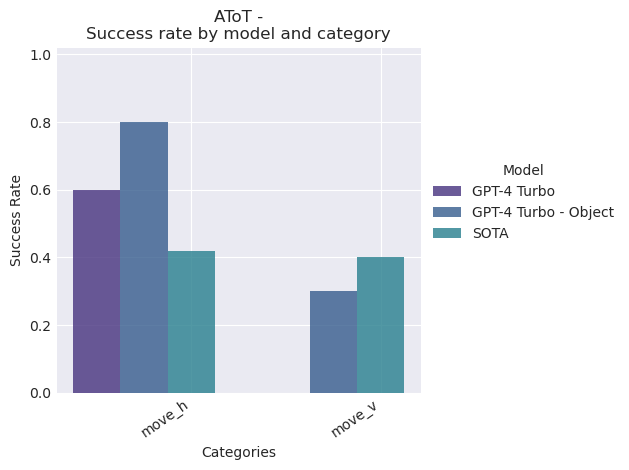

In [15]:
# compare cot_o overall result vs. object representation of output correct  --- GPT 4
df_cot_o = pd.read_csv("results/cot_objects/arc_h_v/summary.csv")
df_cot_o_rep = df_cot_o.copy()
df_cot_o_rep["model"] = df_cot_o_rep["model"] + "_rep"
df_cot_o_rep = df_cot_o_rep.loc[:, ~df_cot_o_rep.columns.str.startswith('cat_success')]
rename_cols = {col: col.replace('object_info_object_representation_', '') 
               for col in df_cot_o_rep.columns if col.startswith('object_info_object_representation_cat_success_rate')}
df_cot_o_rep = df_cot_o_rep.rename(columns=rename_cols)
df = pd.concat([df_cot_o, df_cot_o_rep])
filtered_df = df[df['model'].str.contains('gpt-4', case=False, na=False)]
plot_grouped_bar_chart(filtered_df, top_n_models=2, SOTA=SOTA["arc_h_v"])

In [16]:
# compare cot_o overall result vs. object representation of output correct  --- Mixtral
df_cot_o = pd.read_csv("results/cot_objects/arc_h_v/summary.csv")
df_cot_o_rep = df_cot_o.copy()
df_cot_o_rep["model"] = df_cot_o_rep["model"] + "_rep"
df_cot_o_rep = df_cot_o_rep.loc[:, ~df_cot_o_rep.columns.str.startswith('cat_success')]
rename_cols = {col: col.replace('object_info_object_representation_', '') 
               for col in df_cot_o_rep.columns if col.startswith('object_info_object_representation_cat_success_rate')}
df_cot_o_rep = df_cot_o_rep.rename(columns=rename_cols)
df = pd.concat([df_cot_o, df_cot_o_rep])
filtered_df = df[df['model'].str.contains('Mixtral-8x7B-Instruct', case=False, na=False)]
plot_grouped_bar_chart(filtered_df, top_n_models=2, SOTA=SOTA["arc_h_v"])


##### Different Runs: normal CoT vs. object cmp 

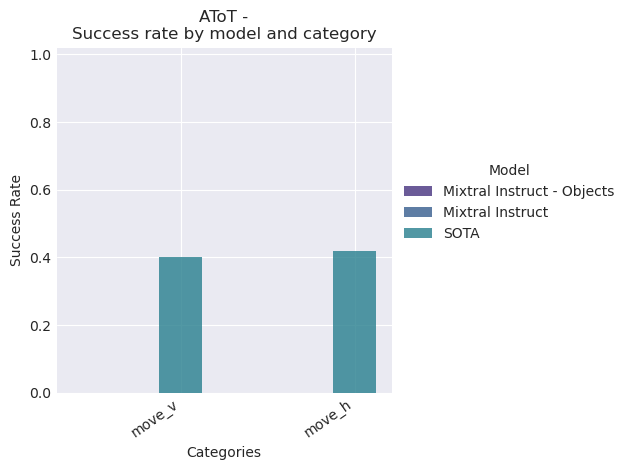

In [17]:
# compare cot_o overall result vs. object representation of output correct  --- Mixtral
df_cot = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df_cot_o = pd.read_csv("results/cot_objects/arc_h_v/summary.csv")
df_cot_o_rep = df_cot_o.copy()
df_cot_o_rep["model"] = df_cot_o_rep["model"] + "_rep"
df_cot_o_rep = df_cot_o_rep.loc[:, ~df_cot_o_rep.columns.str.startswith('cat_success')]
rename_cols = {col: col.replace('object_info_object_representation_', '') 
               for col in df_cot_o_rep.columns if col.startswith('object_info_object_representation_cat_success_rate')}
df_cot_o_rep = df_cot_o_rep.rename(columns=rename_cols)
columns = list(set(df_cot.columns).intersection(set(df_cot_o_rep.columns)))
df = pd.concat([df_cot[columns], df_cot_o_rep[columns]])
filtered_df = df[df['model'].str.contains('Mixtral-8x7B-Instruct', case=False, na=False)]
plot_grouped_bar_chart(filtered_df, top_n_models=2, SOTA=SOTA["arc_h_v"])


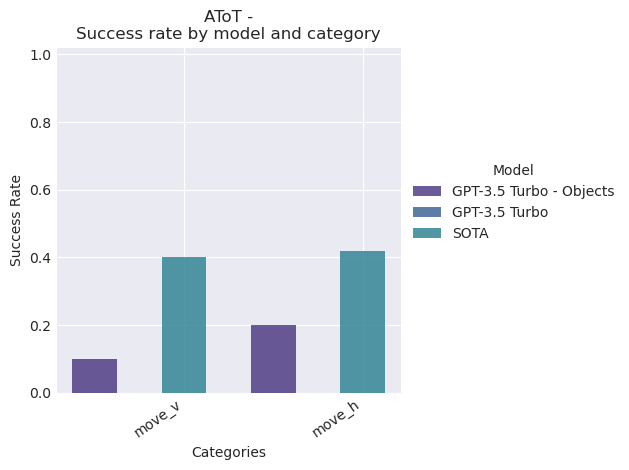

In [18]:
# compare cot_o overall result vs. object representation of output correct  --- GPT 3
df_cot = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df_cot_o = pd.read_csv("results/cot_objects/arc_h_v/summary.csv")
df_cot_o_rep = df_cot_o.copy()
df_cot_o_rep["model"] = df_cot_o_rep["model"] + "_rep"
df_cot_o_rep = df_cot_o_rep.loc[:, ~df_cot_o_rep.columns.str.startswith('cat_success')]
rename_cols = {col: col.replace('object_info_object_representation_', '') 
               for col in df_cot_o_rep.columns if col.startswith('object_info_object_representation_cat_success_rate')}
df_cot_o_rep = df_cot_o_rep.rename(columns=rename_cols)
columns = list(set(df_cot.columns).intersection(set(df_cot_o_rep.columns)))
df = pd.concat([df_cot[columns], df_cot_o_rep[columns]])
filtered_df = df[df['model'].str.contains('gpt-3', case=False, na=False)]
plot_grouped_bar_chart(filtered_df, top_n_models=2, SOTA=SOTA["arc_h_v"])


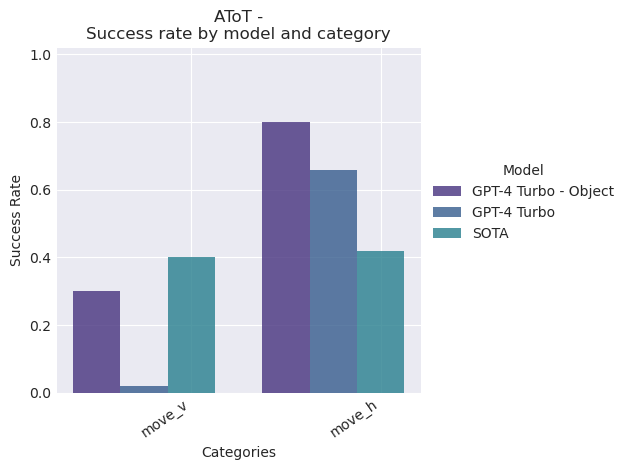

In [19]:
# compare cot_o overall result vs. object representation of output correct  --- GPT 4
df_cot = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df_cot_o = pd.read_csv("results/cot_objects/arc_h_v/summary.csv")
df_cot_o_rep = df_cot_o.copy()
df_cot_o_rep["model"] = df_cot_o_rep["model"] + "_rep"
df_cot_o_rep = df_cot_o_rep.loc[:, ~df_cot_o_rep.columns.str.startswith('cat_success')]
rename_cols = {col: col.replace('object_info_object_representation_', '') 
               for col in df_cot_o_rep.columns if col.startswith('object_info_object_representation_cat_success_rate')}
df_cot_o_rep = df_cot_o_rep.rename(columns=rename_cols)
columns = list(set(df_cot.columns).intersection(set(df_cot_o_rep.columns)))
df = pd.concat([df_cot[columns], df_cot_o_rep[columns]])
filtered_df = df[df['model'].str.contains('gpt-4', case=False, na=False)]
plot_grouped_bar_chart(filtered_df, top_n_models=2, SOTA=SOTA["arc_h_v"])


##### Same Run: only object cmp across models 

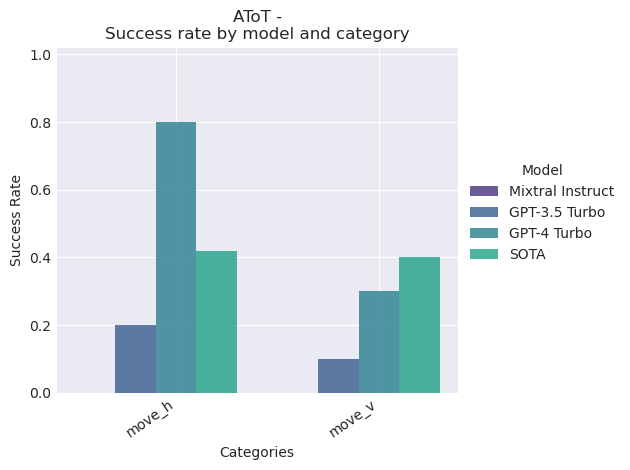

In [20]:
# compare cot_o overall result vs. object representation of output correct  --- GPT 3
df_cot_o = pd.read_csv("results/cot_objects/arc_h_v/summary.csv")
df_cot_o_rep = df_cot_o.copy()
df_cot_o_rep["model"] = df_cot_o_rep["model"] #+ "_rep"
df_cot_o_rep = df_cot_o_rep.loc[:, ~df_cot_o_rep.columns.str.startswith('cat_success')]
rename_cols = {col: col.replace('object_info_object_representation_', '') 
               for col in df_cot_o_rep.columns if col.startswith('object_info_object_representation_cat_success_rate')}
df_cot_o_rep = df_cot_o_rep.rename(columns=rename_cols)
df_cot_o_rep["success_rate"].iloc[0] = 0.01
plot_grouped_bar_chart(df_cot_o_rep, top_n_models=3, SOTA=SOTA["arc_h_v"])

## Augmented ToT

### 1D ARC

#### Plots

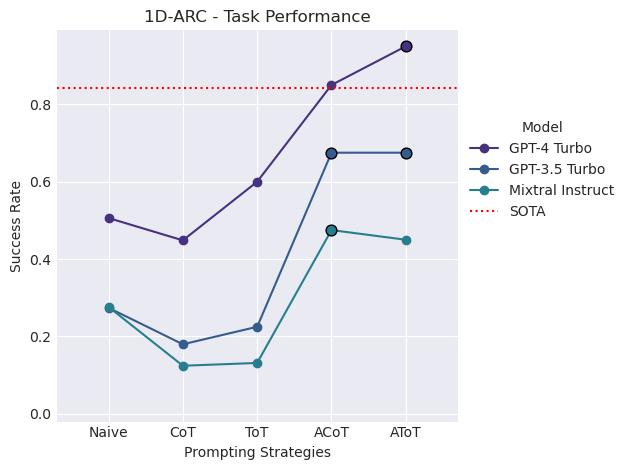

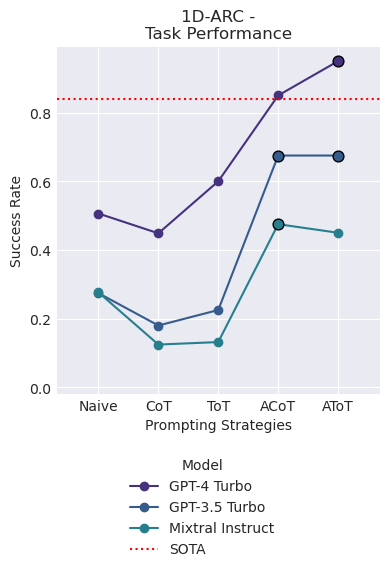

In [21]:
df_naive = pd.read_csv("results/baseline_naive/arc_1D/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df_cot["run"] = "CoT"
df_tot = pd.read_csv("results/tot_normal/arc_1D/summary.csv")
df_tot["run"] = "ToT"
df_cot_o_rep = pd.read_csv("results/cot_objects/arc_1D/summary.csv")
df_cot_o_rep["success_rate"] = df_cot_o_rep["object_info_object_representation_success_rate"]
df_cot_o_rep["run"] = "ACoT"
df_atot = pd.read_csv("results/tot_objects/arc_1D/summary.csv")
df_atot["run"] = "AToT"
df = pd.concat([df_naive, df_cot, df_tot, df_cot_o_rep, df_atot])
filtered_df = df[df['model'].str.contains('gpt-', case=False, na=False) | df['model'].str.contains('Mixtral-8x7B-Instruct', case=False, na=False)]
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_1D", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_1D", SOTA=SOTA, value_ticks=None, small_fig=True)

In [22]:
filtered_df[["model", "success_rate", "run"]]

model  success_rate    run
2                     gpt-3.5-turbo-1106      0.274140  Naive
35                    gpt-4-1106-preview      0.506104  Naive
37  mistralai/Mixtral-8x7B-Instruct-v0.1      0.276360  Naive
0                     gpt-3.5-turbo-1106      0.179800    CoT
1                     gpt-4-1106-preview      0.448391    CoT
12  mistralai/Mixtral-8x7B-Instruct-v0.1      0.124306    CoT
0                     gpt-4-1106-preview      0.600000    ToT
1                     gpt-3.5-turbo-1106      0.225000    ToT
2   mistralai/Mixtral-8x7B-Instruct-v0.1      0.131579    ToT
0                     gpt-3.5-turbo-1106      0.675000   ACoT
1                     gpt-4-1106-preview      0.850000   ACoT
2   mistralai/Mixtral-8x7B-Instruct-v0.1      0.475000   ACoT
0                     gpt-4-1106-preview      0.950000   AToT
1                     gpt-3.5-turbo-1106      0.675000   AToT
2   mistralai/Mixtral-8x7B-Instruct-v0.1      0.450000   AToT

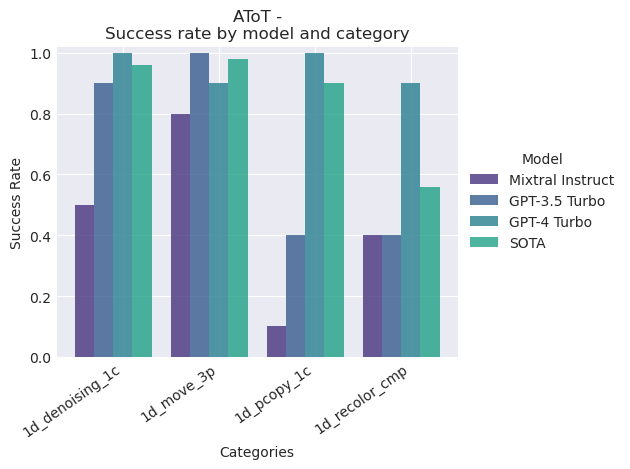

In [23]:
# compare tot of different models
df_tot = pd.read_csv("results/tot_objects/arc_1D/summary.csv")
plot_grouped_bar_chart(df_tot, top_n_models=3, SOTA=SOTA["arc_1D"])


#### Chain of thought analysis

In [ ]:
#################################
# TODO: change data to subset
#################################

# manually analyze # TODO: change data in tot src
df = pd.read_csv("results/tot_objects/arc_1D/summary.csv")
analyze_random_tasks(df, "arc_1D", "tot_objects", n_models=3, n_tasks=20, only_unsolved=False, only_solved=True, starting_index=0, only_save_as_txt=True)


In [24]:
path="results/tot_objects/arc_1D/manual_task_analysis.xlsx"
task_analysis_1D, unsolved_1D, solved_1D = get_task_analysis_kpi(path)
task_analysis_1D

run  step_1_both_sampled_fraction_of_n_tasks  \
0      tot_objects_gpt4_unsolved                                      0.0   
1        tot_objects_gpt4_solved                                      0.0   
2          tot_objects_gpt4_both                                      0.0   
3      tot_objects_gpt3_unsolved                                      0.0   
4        tot_objects_gpt3_solved                                      0.0   
5          tot_objects_gpt3_both                                      0.0   
6   tot_objects_mixtral_unsolved                                      0.0   
7     tot_objects_mixtral_solved                                      0.0   
8       tot_objects_mixtral_both                                      0.0   
9                   all_unsolved                                      0.0   
10                    all_solved                                      0.0   
11                      all_both                                      0.0   

    step_2_both_sampled_fraction_of_n_tasks  \
0                                  0.500000   
1                                  0.200000   
2                                  0.250000   
3                                  0.000000   
4                                  0.100000   
5                                  0.050000   
6                                  0.100000   
7                                  0.500000   
8                                  0.300000   
9                                  0.090909   
10                                 0.266667   
11                                 0.192308   

    step_3_both_sampled_fraction_of_n_tasks  \
0                                  0.000000   
1                                  0.100000   
2                                  0.083333   
3                                  0.000000   
4                                  0.100000   
5                                  0.050000   
6                                  0.000000   
7                                  0.300000   
8                                  0.150000   
9                                  0.000000   
10                                 0.166667   
11                                 0.096154   

    step_4_both_sampled_fraction_of_n_tasks  \
0                                  0.000000   
1                                  0.900000   
2                                  0.750000   
3                                  0.200000   
4                                  0.500000   
5                                  0.350000   
6                                  0.300000   
7                                  1.000000   
8                                  0.650000   
9                                  0.227273   
10                                 0.800000   
11                                 0.557692   

    step_1_only_correct_sampled_fraction_of_n_tasks  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
5                                               0.0   
6                                               0.0   
7                                               0.0   
8                                               0.0   
9                                               0.0   
10                                              0.0   
11                                              0.0   

    step_2_only_correct_sampled_fraction_of_n_tasks  \
0                                          0.000000   
1                                          0.600000   
2                                          0.500000   
3                                          0.000000   
4                                          0.400000   
5                                          0.200000   
6                                          0.000000   
7                                  

##### Chain of thought Flow

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
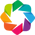

:Sankey   [source,target]   (value)

In [25]:
sankey_edges_unsolved = get_sankey_source_data(unsolved_1D, ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='1D-ARC: Augmented Tree-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
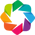

:Sankey   [source,target]   (value)

In [16]:
sankey_edges_solved = get_sankey_source_data(solved_1D, ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='1D-ARC: Augmented Tree-of-Thought Analysis of solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

In [ ]:
# sankey_edges_both = get_sankey_source_data(pd.concat([unsolved_1D, solved_1D]), only_best_node=True)
sankey_edges_both = get_sankey_source_data(pd.concat([unsolved_1D, solved_1D]), ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_both, label='1D-ARC: Augmented Tree-of-Thought Analysis of Solved and Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

##### Tree of thought analysis

In [26]:
path="results/tot_objects/arc_1D/manual_task_analysis.xlsx"
task_analysis_1D, unsolved_1D, solved_1D = get_task_analysis_kpi(path)
task_analysis_1D

run  step_1_both_sampled_fraction_of_n_tasks  \
0      tot_objects_gpt4_unsolved                                      0.0   
1        tot_objects_gpt4_solved                                      0.0   
2          tot_objects_gpt4_both                                      0.0   
3      tot_objects_gpt3_unsolved                                      0.0   
4        tot_objects_gpt3_solved                                      0.0   
5          tot_objects_gpt3_both                                      0.0   
6   tot_objects_mixtral_unsolved                                      0.0   
7     tot_objects_mixtral_solved                                      0.0   
8       tot_objects_mixtral_both                                      0.0   
9                   all_unsolved                                      0.0   
10                    all_solved                                      0.0   
11                      all_both                                      0.0   

    step_2_both_sampled_fraction_of_n_tasks  \
0                                  0.500000   
1                                  0.200000   
2                                  0.250000   
3                                  0.000000   
4                                  0.100000   
5                                  0.050000   
6                                  0.100000   
7                                  0.500000   
8                                  0.300000   
9                                  0.090909   
10                                 0.266667   
11                                 0.192308   

    step_3_both_sampled_fraction_of_n_tasks  \
0                                  0.000000   
1                                  0.100000   
2                                  0.083333   
3                                  0.000000   
4                                  0.100000   
5                                  0.050000   
6                                  0.000000   
7                                  0.300000   
8                                  0.150000   
9                                  0.000000   
10                                 0.166667   
11                                 0.096154   

    step_4_both_sampled_fraction_of_n_tasks  \
0                                  0.000000   
1                                  0.900000   
2                                  0.750000   
3                                  0.200000   
4                                  0.500000   
5                                  0.350000   
6                                  0.300000   
7                                  1.000000   
8                                  0.650000   
9                                  0.227273   
10                                 0.800000   
11                                 0.557692   

    step_1_only_correct_sampled_fraction_of_n_tasks  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
5                                               0.0   
6                                               0.0   
7                                               0.0   
8                                               0.0   
9                                               0.0   
10                                              0.0   
11                                              0.0   

    step_2_only_correct_sampled_fraction_of_n_tasks  \
0                                          0.000000   
1                                          0.600000   
2                                          0.500000   
3                                          0.000000   
4                                          0.400000   
5                                          0.200000   
6                                          0.000000   
7                                  

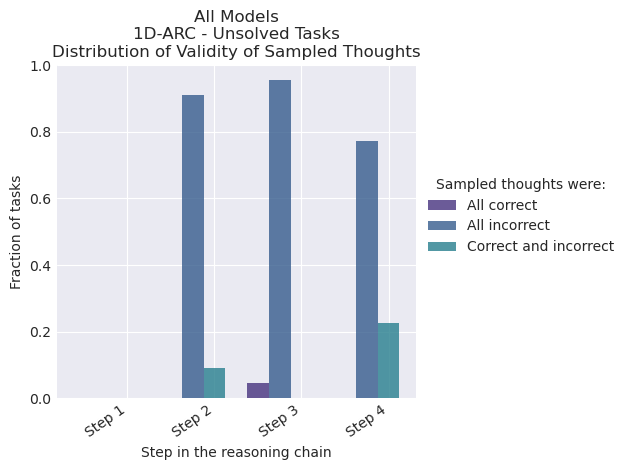

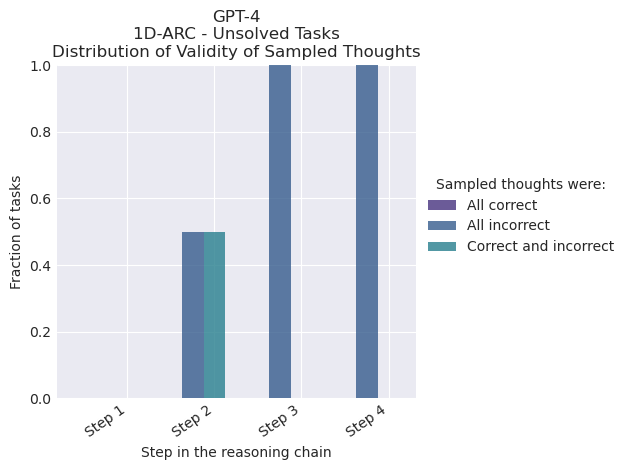

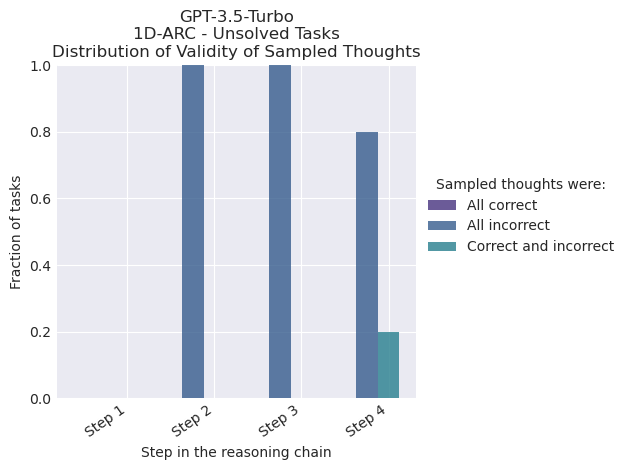

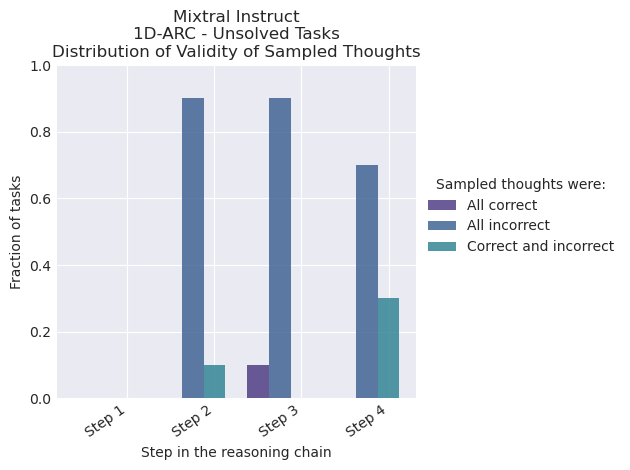

In [27]:
# for x in ["all_both", "gpt4_both", "gpt3_both", "mixtral_both"]:
for x in ["all_unsolved", "gpt4_unsolved", "gpt3_unsolved", "mixtral_unsolved"]:
    df = pd.DataFrame()
    filtered_df = task_analysis_1D[task_analysis_1D['run'].str.contains(x, na=False)]
    df["sampled_thoughts"] = [x.split("_")[0]+"_only_correct", x.split("_")[0]+"_only_incorrect", x.split("_")[0]+"_both"]
    for i in range(1,5):
        df[f"step_{i}"] = [filtered_df[f"step_{i}_only_correct_sampled_fraction_of_n_tasks"].iloc[0], filtered_df[f"step_{i}_only_incorrect_sampled_fraction_of_n_tasks"].iloc[0], filtered_df[f"step_{i}_both_sampled_fraction_of_n_tasks"].iloc[0]]
    plot_grouped_bar_chart(df, group_by="sampled_thoughts", group_col="steps",top_n_models=None)

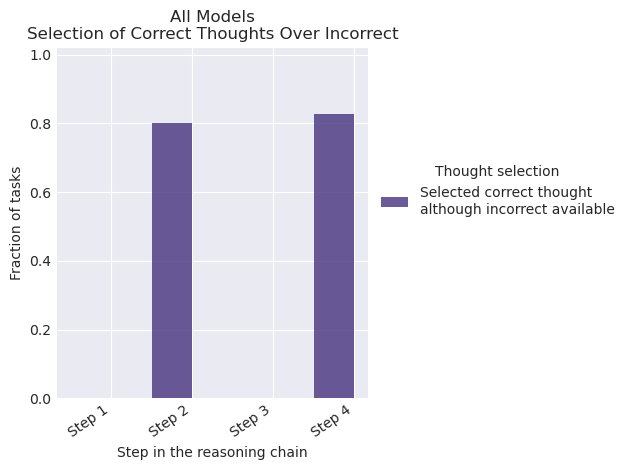

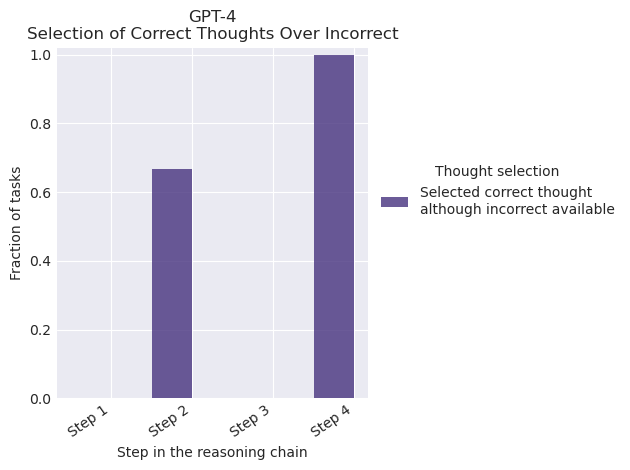

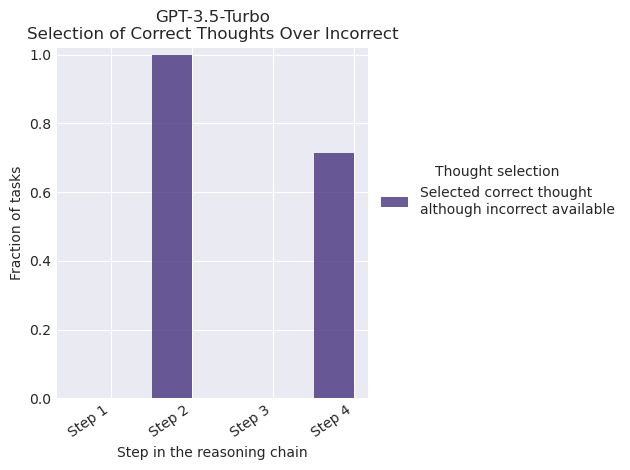

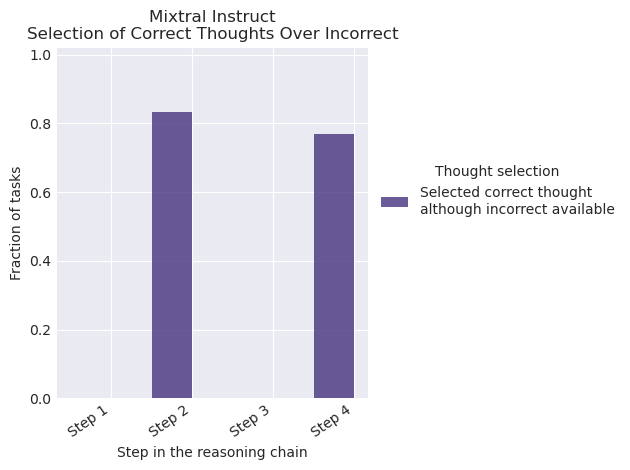

In [28]:
for x in ["all_both", "gpt4_both", "gpt3_both", "mixtral_both"]:
    df = pd.DataFrame()
    filtered_df = task_analysis_1D[task_analysis_1D['run'].str.contains(x, na=False)]
    df["chosen_thoughts"] = [x.split("_")[0]+"_correct_when_incorrect_exist"]#, x.split("_")[0]+"_incorrect_when_correct_exist"]
    for i, step in enumerate(["description", "pattern", "instructions", "transformation"], 1):
        df[f"step_{i}"] = [filtered_df[f"correct_{step}_chosen_although_incorrect_available_fraction_of_tasks_w_correct_and_incorrect"].iloc[0]]#, filtered_df[f"incorrect_{step}_chosen_although_correct_available_fraction_of_tasks_w_correct_and_incorrect"].iloc[0]]
    plot_grouped_bar_chart(df, group_by="chosen_thoughts", group_col="steps",top_n_models=None)

### ARC H vs V

#### Plots

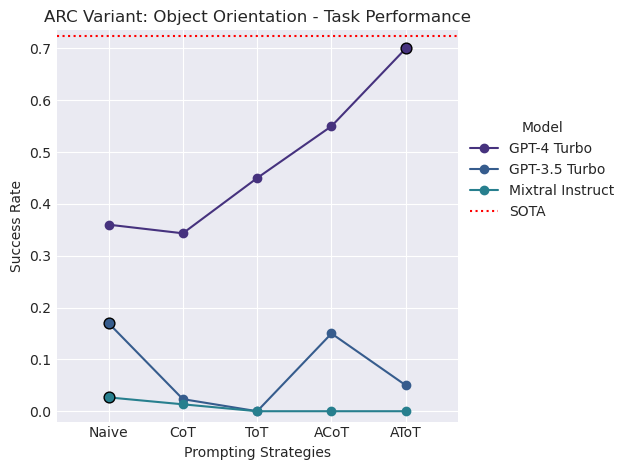

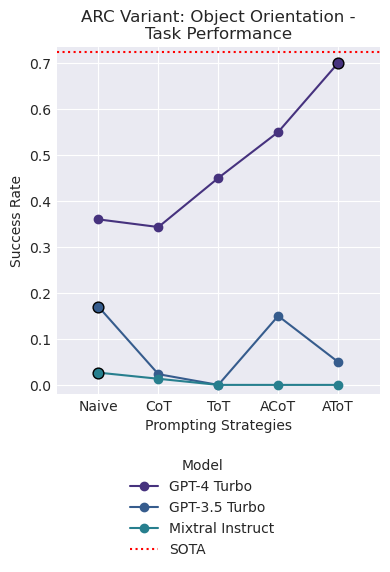

In [29]:
df_naive = pd.read_csv("results/baseline_naive/arc_h_v/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df_cot["run"] = "CoT"
df_tot = pd.read_csv("results/tot_normal/arc_h_v/summary.csv")
df_tot["run"] = "ToT"
df_cot_o_rep = pd.read_csv("results/cot_objects/arc_h_v/summary.csv")
df_cot_o_rep["success_rate"] = df_cot_o_rep["object_info_object_representation_success_rate"]
df_cot_o_rep["run"] = "ACoT"
df_atot = pd.read_csv("results/tot_objects/arc_h_v/summary.csv")
df_atot["run"] = "AToT"
df = pd.concat([df_naive, df_cot, df_tot, df_cot_o_rep, df_atot])
filtered_df = df[df['model'].str.contains('gpt-', case=False, na=False) | 
                 df['model'].str.contains('Mixtral-8x7B-Instruct', case=False, na=False)]
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_h_v", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_h_v", SOTA=SOTA, value_ticks=None, small_fig=True)

In [30]:
filtered_df[["model", "success_rate", "run"]]

model  success_rate    run
2                     gpt-3.5-turbo-1106      0.170000  Naive
4                     gpt-4-1106-preview      0.360000  Naive
38  mistralai/Mixtral-8x7B-Instruct-v0.1      0.026667  Naive
0                     gpt-3.5-turbo-1106      0.023333    CoT
1                     gpt-4-1106-preview      0.343333    CoT
12  mistralai/Mixtral-8x7B-Instruct-v0.1      0.013333    CoT
0                     gpt-4-1106-preview      0.450000    ToT
1                     gpt-3.5-turbo-1106      0.000000    ToT
2   mistralai/Mixtral-8x7B-Instruct-v0.1      0.000000    ToT
0                     gpt-3.5-turbo-1106      0.150000   ACoT
1   mistralai/Mixtral-8x7B-Instruct-v0.1      0.000000   ACoT
2                     gpt-4-1106-preview      0.550000   ACoT
0                     gpt-3.5-turbo-1106      0.050000   AToT
1                     gpt-4-1106-preview      0.700000   AToT
2   mistralai/Mixtral-8x7B-Instruct-v0.1      0.000000   AToT

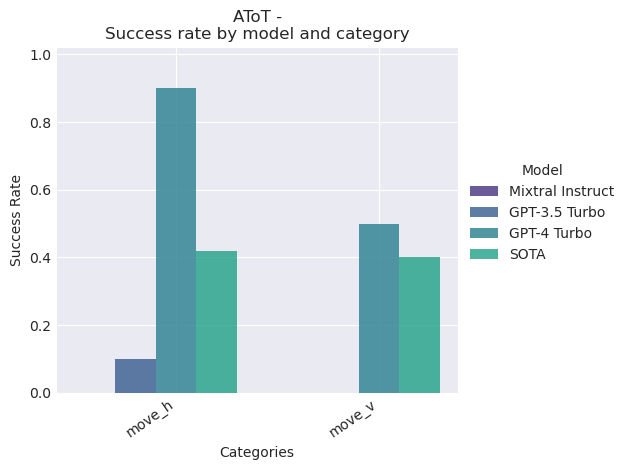

In [31]:
# compare tot of different models
df_tot = pd.read_csv("results/tot_objects/arc_h_v/summary.csv")
plot_grouped_bar_chart(df_tot, top_n_models=3, SOTA=SOTA["arc_h_v"])


#### Chain of thought analysis

In [ ]:
#################################
# TODO: change data to subset
#################################
# manually analyze # TODO: change data in tot src
df = pd.read_csv("results/tot_objects/arc_h_v/summary.csv")
analyze_random_tasks(df, "arc_h_v", "tot_objects", n_models=3, n_tasks=20, only_unsolved=True, only_solved=False, starting_index=0, only_save_as_txt=True)


##### Chain of thought Flow

In [33]:
path="results/tot_objects/arc_h_v/manual_task_analysis.xlsx"
task_analysis_arc_h_v, unsolved_arc_h_v, solved_arc_h_v = get_task_analysis_kpi(path)
task_analysis_arc_h_v

run  step_1_both_sampled_fraction_of_n_tasks  \
0      naive_cot_gpt4_unsolved                                      0.0   
1        naive_cot_gpt4_solved                                      0.0   
2          naive_cot_gpt4_both                                      0.0   
3      naive_cot_gpt3_unsolved                                      0.0   
4        naive_cot_gpt3_solved                                      0.0   
5          naive_cot_gpt3_both                                      0.0   
6   naive_cot_mixtral_unsolved                                      0.0   
7     naive_cot_mixtral_solved                                      0.0   
8       naive_cot_mixtral_both                                      0.0   
9                 all_unsolved                                      0.0   
10                  all_solved                                      0.0   
11                    all_both                                      0.0   

    step_2_both_sampled_fraction_of_n_tasks  \
0                                  0.166667   
1                                  0.400000   
2                                  0.312500   
3                                  0.000000   
4                                  0.000000   
5                                  0.000000   
6                                  0.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.038462   
10                                 0.363636   
11                                 0.135135   

    step_3_both_sampled_fraction_of_n_tasks  \
0                                  0.166667   
1                                  0.200000   
2                                  0.187500   
3                                  0.000000   
4                                  0.000000   
5                                  0.000000   
6                                  0.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.038462   
10                                 0.181818   
11                                 0.081081   

    step_4_both_sampled_fraction_of_n_tasks  \
0                                  0.000000   
1                                  0.800000   
2                                  0.500000   
3                                  0.000000   
4                                  1.000000   
5                                  0.090909   
6                                  0.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.000000   
10                                 0.818182   
11                                 0.243243   

    step_1_only_correct_sampled_fraction_of_n_tasks  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
5                                               0.0   
6                                               0.0   
7                                               0.0   
8                                               0.0   
9                                               0.0   
10                                              0.0   
11                                              0.0   

    step_2_only_correct_sampled_fraction_of_n_tasks  \
0                                          0.000000   
1                                          0.100000   
2                                          0.062500   
3                                          0.000000   
4                                          0.000000   
5                                          0.000000   
6                                          0.000000   
7                                          0.000000   
8   

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
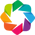

:Sankey   [source,target]   (value)

In [19]:
sankey_edges_unsolved = get_sankey_source_data(unsolved_arc_h_v, ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='2D ARC Variants: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
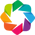

:Sankey   [source,target]   (value)

In [20]:
sankey_edges_solved = get_sankey_source_data(solved_arc_h_v, ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='2D ARC Variants: Chain-of-Thought Analysis of solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
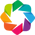

:Sankey   [source,target]   (value)

In [21]:
# sankey_edges_both = get_sankey_source_data(pd.concat([unsolved_arc_h_v, solved_1D]), only_best_node=True)
sankey_edges_both = get_sankey_source_data(pd.concat([unsolved_arc_h_v, solved_arc_h_v]), ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_both, label='2D ARC Variants: Chain-of-Thought Analysis of Solved and Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

##### Tree of thought analysis

In [34]:
path="results/tot_objects/arc_h_v/manual_task_analysis.xlsx"
task_analysis_arc_h_v, unsolved_arc_h_v, solved_arc_h_v = get_task_analysis_kpi(path)
task_analysis_arc_h_v

run  step_1_both_sampled_fraction_of_n_tasks  \
0      naive_cot_gpt4_unsolved                                      0.0   
1        naive_cot_gpt4_solved                                      0.0   
2          naive_cot_gpt4_both                                      0.0   
3      naive_cot_gpt3_unsolved                                      0.0   
4        naive_cot_gpt3_solved                                      0.0   
5          naive_cot_gpt3_both                                      0.0   
6   naive_cot_mixtral_unsolved                                      0.0   
7     naive_cot_mixtral_solved                                      0.0   
8       naive_cot_mixtral_both                                      0.0   
9                 all_unsolved                                      0.0   
10                  all_solved                                      0.0   
11                    all_both                                      0.0   

    step_2_both_sampled_fraction_of_n_tasks  \
0                                  0.166667   
1                                  0.400000   
2                                  0.312500   
3                                  0.000000   
4                                  0.000000   
5                                  0.000000   
6                                  0.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.038462   
10                                 0.363636   
11                                 0.135135   

    step_3_both_sampled_fraction_of_n_tasks  \
0                                  0.166667   
1                                  0.200000   
2                                  0.187500   
3                                  0.000000   
4                                  0.000000   
5                                  0.000000   
6                                  0.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.038462   
10                                 0.181818   
11                                 0.081081   

    step_4_both_sampled_fraction_of_n_tasks  \
0                                  0.000000   
1                                  0.800000   
2                                  0.500000   
3                                  0.000000   
4                                  1.000000   
5                                  0.090909   
6                                  0.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.000000   
10                                 0.818182   
11                                 0.243243   

    step_1_only_correct_sampled_fraction_of_n_tasks  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
5                                               0.0   
6                                               0.0   
7                                               0.0   
8                                               0.0   
9                                               0.0   
10                                              0.0   
11                                              0.0   

    step_2_only_correct_sampled_fraction_of_n_tasks  \
0                                          0.000000   
1                                          0.100000   
2                                          0.062500   
3                                          0.000000   
4                                          0.000000   
5                                          0.000000   
6                                          0.000000   
7                                          0.000000   
8   

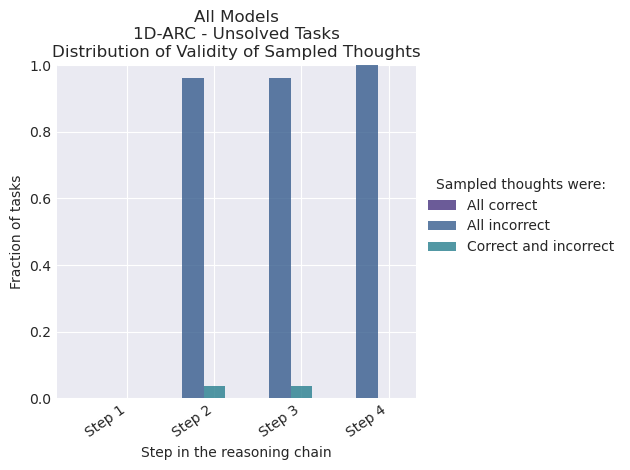

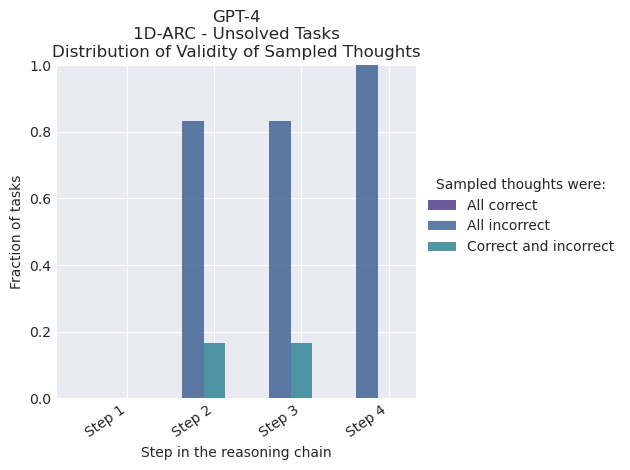

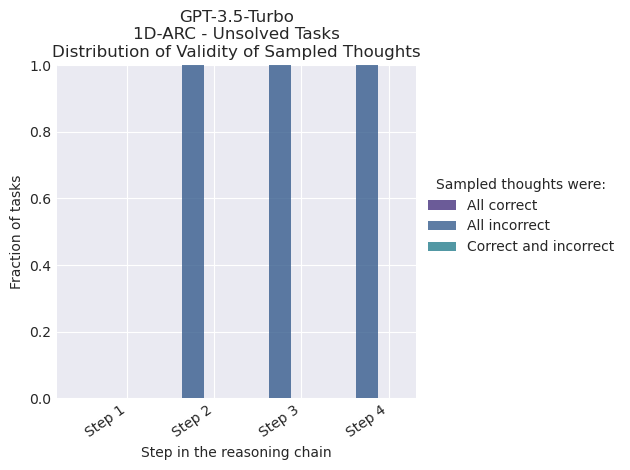

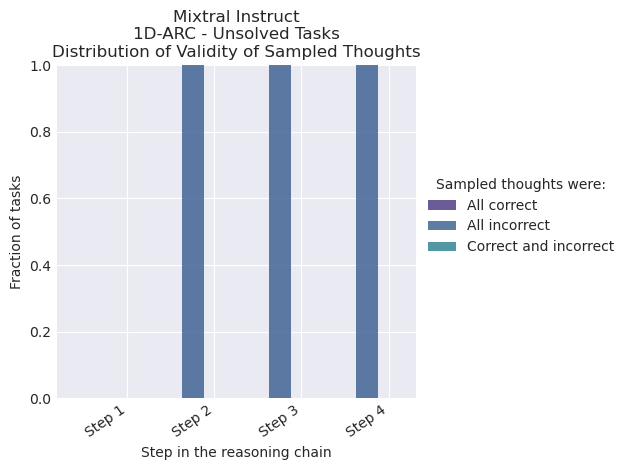

In [35]:
# for x in ["all_both", "gpt4_both", "gpt3_both", "mixtral_both"]:
for x in ["all_unsolved", "gpt4_unsolved", "gpt3_unsolved", "mixtral_unsolved"]:
# for x in ["all_solved", "gpt4_solved", "gpt3_solved", "mixtral_solved"]:
    df = pd.DataFrame()
    filtered_df = task_analysis_arc_h_v[task_analysis_arc_h_v['run'].str.contains(x, na=False)]
    df["sampled_thoughts"] = [x.split("_")[0]+"_only_correct", x.split("_")[0]+"_only_incorrect", x.split("_")[0]+"_both"]
    for i in range(1,5):
        df[f"step_{i}"] = [filtered_df[f"step_{i}_only_correct_sampled_fraction_of_n_tasks"].iloc[0], filtered_df[f"step_{i}_only_incorrect_sampled_fraction_of_n_tasks"].iloc[0], filtered_df[f"step_{i}_both_sampled_fraction_of_n_tasks"].iloc[0]]
    plot_grouped_bar_chart(df, group_by="sampled_thoughts", group_col="steps",top_n_models=None)

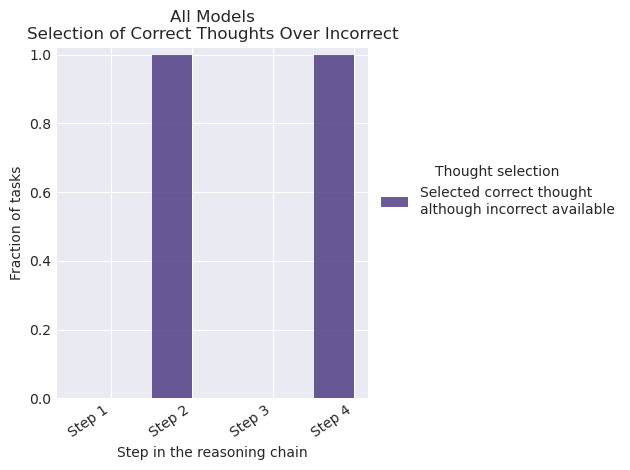

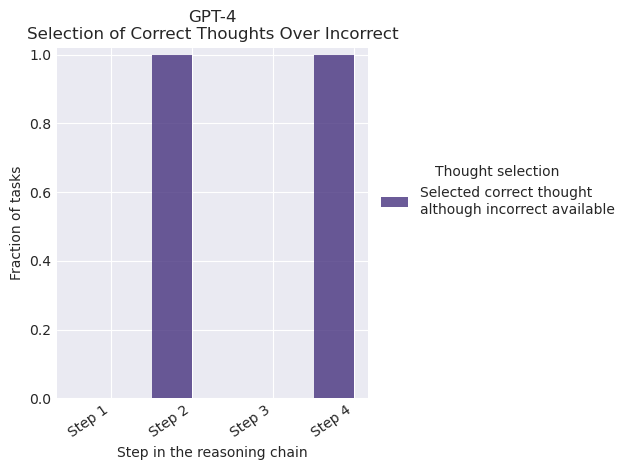

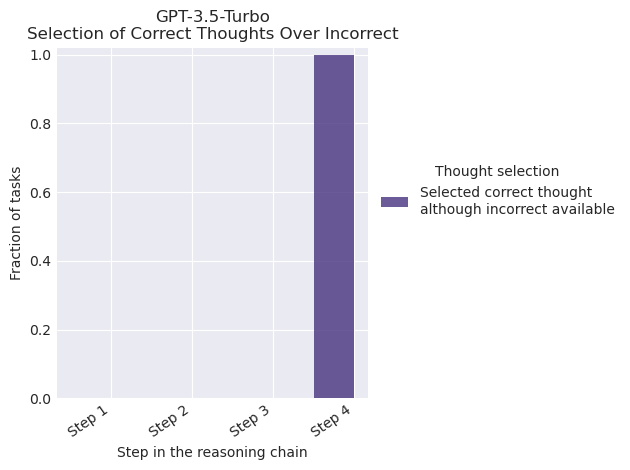

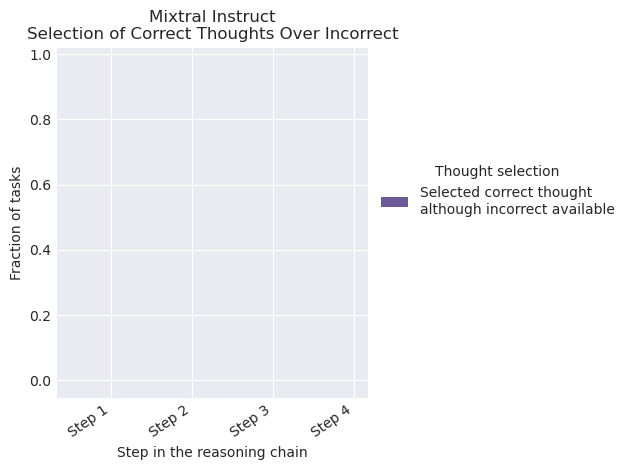

In [36]:
for x in ["all_both", "gpt4_both", "gpt3_both", "mixtral_both"]:
    df = pd.DataFrame()
    filtered_df = task_analysis_arc_h_v[task_analysis_arc_h_v['run'].str.contains(x, na=False)]
    df["chosen_thoughts"] = [x.split("_")[0]+"_correct_when_incorrect_exist"]#, x.split("_")[0]+"_incorrect_when_correct_exist"]
    for i, step in enumerate(["description", "pattern", "instructions", "transformation"], 1):
        df[f"step_{i}"] = [filtered_df[f"correct_{step}_chosen_although_incorrect_available_fraction_of_tasks_w_correct_and_incorrect"].iloc[0]]#, filtered_df[f"incorrect_{step}_chosen_although_correct_available_fraction_of_tasks_w_correct_and_incorrect"].iloc[0]]
    plot_grouped_bar_chart(df, group_by="chosen_thoughts", group_col="steps",top_n_models=None)

### ARC Original

#### Plots

In [37]:
df_naive = pd.read_csv("results/baseline_naive/arc/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc/summary.csv")
df_cot["run"] = "CoT"
df_atot = pd.read_csv("results/tot_objects/arc/summary.csv")
df_atot["run"] = "AToT"
df = pd.concat([df_naive, df_cot, df_atot])

filtered_df = df[df['model'].str.contains('gpt-4', case=False, na=False)]
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc", SOTA=SOTA, value_ticks=None, small_fig=True)

In [38]:
filtered_df[["model", "success_rate", "run"]]

model  success_rate    run
39  gpt-4-1106-preview          0.26  Naive
1   gpt-4-1106-preview          0.20    CoT
0   gpt-4-1106-preview          0.46   AToT

### All

In [39]:
path="results/tot_objects/arc_1D/manual_task_analysis.xlsx"
task_analysis_1D, unsolved_1D, solved_1D = get_task_analysis_kpi(path)
# both_1D = pd.concat([unsolved_1D, solved_1D])
path="results/tot_objects/arc_h_v/manual_task_analysis.xlsx"
task_analysis_arc_h_v, unsolved_arc_h_v, solved_arc_h_v = get_task_analysis_kpi(path)
unsolved_all = pd.concat([unsolved_1D, unsolved_arc_h_v])
solved_all = pd.concat([solved_1D, solved_arc_h_v])
both_all = pd.concat([unsolved_1D, solved_1D, unsolved_arc_h_v, solved_arc_h_v])

#### GPT 4

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
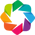

:Sankey   [source,target]   (value)

In [31]:
# sankey_edges_solved = get_sankey_source_data(solved_1D[solved_1D["model"] == "gpt4"], ATOT=True)
sankey_edges_solved = get_sankey_source_data(solved_all[solved_all["model"] == "gpt4"], ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='GPT-4: Chain-of-Thought Analysis of Solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
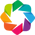

:Sankey   [source,target]   (value)

In [32]:
# sankey_edges_unsolved = get_sankey_source_data(unsolved_1D[unsolved_1D["model"] == "gpt4"], ATOT=True)
sankey_edges_unsolved = get_sankey_source_data(unsolved_all[unsolved_all["model"] == "gpt4"], ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='GPT-4: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
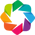

:Sankey   [source,target]   (value)

In [33]:
# sankey_edges_all = get_sankey_source_data(all_1D[all_1D["model"] == "gpt4"], ATOT=True)
sankey_edges_all = get_sankey_source_data(both_all[both_all["model"] == "gpt4"], ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_all, label='GPT-4: Chain-of-Thought Analysis of Solved and Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

#### GPT 3.5

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
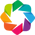

:Sankey   [source,target]   (value)

In [34]:
# sankey_edges_solved = get_sankey_source_data(solved_1D[solved_1D["model"] == "gpt3"], ATOT=True)
sankey_edges_solved = get_sankey_source_data(solved_all[solved_all["model"] == "gpt3"], ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='GPT-3: Chain-of-Thought Analysis of Solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
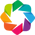

:Sankey   [source,target]   (value)

In [35]:
# sankey_edges_unsolved = get_sankey_source_data(unsolved_1D[unsolved_1D["model"] == "gpt3"], ATOT=True)
sankey_edges_unsolved = get_sankey_source_data(unsolved_all[unsolved_all["model"] == "gpt3"], ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='GPT-3: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
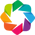

:Sankey   [source,target]   (value)

In [36]:
# sankey_edges_all = get_sankey_source_data(all_1D[all_1D["model"] == "gpt3"], ATOT=True)
sankey_edges_all = get_sankey_source_data(both_all[both_all["model"] == "gpt3"], ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_all, label='GPT-3: Chain-of-Thought Analysis of Solved and Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

#### Mixtral

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
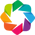

:Sankey   [source,target]   (value)

In [37]:
# sankey_edges_solved = get_sankey_source_data(solved_1D[solved_1D["model"] == "mixtral"], ATOT=True)
sankey_edges_solved = get_sankey_source_data(solved_all[solved_all["model"] == "mixtral"], ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_solved, label='Mixtral: Chain-of-Thought Analysis of Solved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
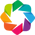

:Sankey   [source,target]   (value)

In [38]:
# sankey_edges_unsolved = get_sankey_source_data(unsolved_1D[unsolved_1D["model"] == "mixtral"], ATOT=True)
sankey_edges_unsolved = get_sankey_source_data(unsolved_all[unsolved_all["model"] == "mixtral"], ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_unsolved, label='Mixtral: Chain-of-Thought Analysis of Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
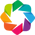

:Sankey   [source,target]   (value)

In [39]:
# sankey_edges_all = get_sankey_source_data(all_1D[all_1D["model"] == "mixtral"], ATOT=True)
sankey_edges_all = get_sankey_source_data(both_all[both_all["model"] == "mixtral"], ATOT=True)
hv.extension('bokeh')
sankey = hv.Sankey(sankey_edges_all, label='Mixtral: Chain-of-Thought Analysis of Solved and Unsolved Tasks')
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap=cmap, label_text_font_size='13pt')

## Augmented ToT - Final Run - All Tasks

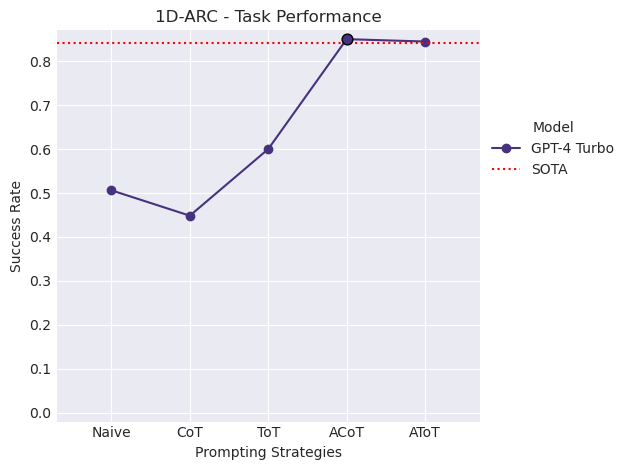

In [40]:
df_naive = pd.read_csv("results/baseline_naive/arc_1D/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df_cot["run"] = "CoT"
df_tot = pd.read_csv("results/tot_normal/arc_1D/summary.csv")
df_tot["run"] = "ToT"
df_cot_o_rep = pd.read_csv("results/cot_objects/arc_1D/summary.csv")
df_cot_o_rep["success_rate"] = df_cot_o_rep["object_info_object_representation_success_rate"]
df_cot_o_rep["run"] = "ACoT"
df_atot = pd.read_csv("results/tot_objects_all_tasks/arc_1D/summary.csv")
df_atot["run"] = "AToT"
df = pd.concat([df_naive, df_cot, df_tot, df_cot_o_rep, df_atot])
filtered_df = df[df['model'].str.contains('gpt-4', case=False, na=False) ]
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_1D", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_1D", SOTA=SOTA, value_ticks=None, small_fig=True)

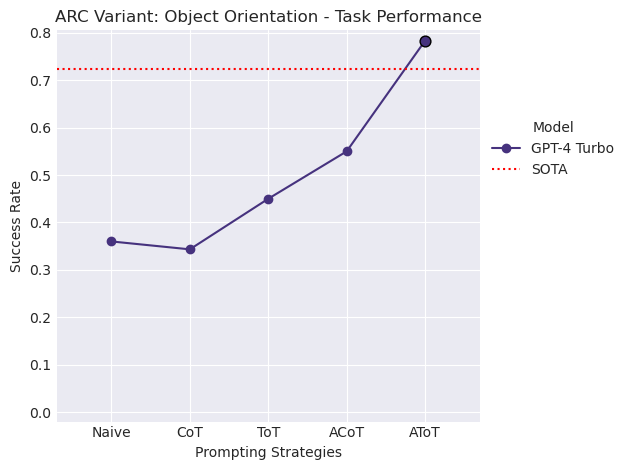

In [41]:
df_naive = pd.read_csv("results/baseline_naive/arc_h_v/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df_cot["run"] = "CoT"
df_tot = pd.read_csv("results/tot_normal/arc_h_v/summary.csv")
df_tot["run"] = "ToT"
df_cot_o_rep = pd.read_csv("results/cot_objects/arc_h_v/summary.csv")
df_cot_o_rep["success_rate"] = df_cot_o_rep["object_info_object_representation_success_rate"]
df_cot_o_rep["run"] = "ACoT"
df_atot = pd.read_csv("results/tot_objects_all_tasks/arc_h_v/summary.csv")
df_atot["run"] = "AToT"
df = pd.concat([df_naive, df_cot, df_tot, df_cot_o_rep, df_atot])
filtered_df = df[df['model'].str.contains('gpt-4', case=False, na=False) ]
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_h_v", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc_h_v", SOTA=SOTA, value_ticks=None, small_fig=True)

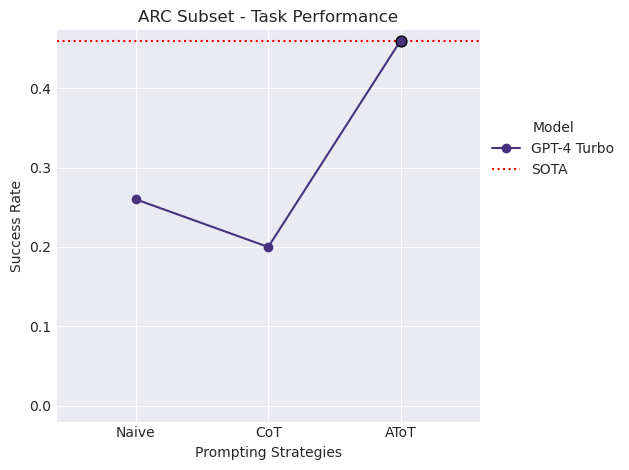

In [42]:
df_naive = pd.read_csv("results/baseline_naive/arc/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc/summary.csv")
df_cot["run"] = "CoT"
df_atot = pd.read_csv("results/tot_objects_all_tasks/arc/summary.csv")
df_atot["run"] = "AToT"
df = pd.concat([df_naive, df_cot, df_atot])
filtered_df = df[df['model'].str.contains('gpt-4', case=False, na=False) ]
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(filtered_df, "run", "success_rate", task="arc", SOTA=SOTA, value_ticks=None, small_fig=True)

In [43]:
df_arc = pd.read_csv("results/tot_objects_all_tasks/arc/summary.csv")
df_arc_1D = pd.read_csv("results/tot_objects_all_tasks/arc_1D/summary.csv")
df_arc_h_v = pd.read_csv("results/tot_objects_all_tasks/arc_h_v/summary.csv")

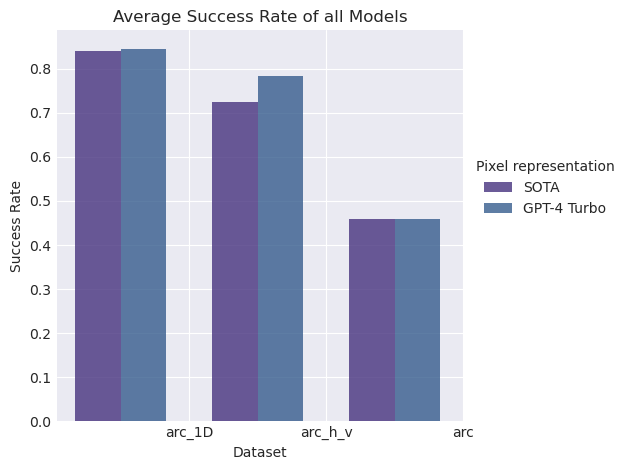

In [44]:
df_all = pd.DataFrame(columns=["model", "success_rate_arc_1D", "success_rate_arc_h_v", "success_rate_arc"])
df_all.loc[len(df_all)] = [0,0,0,0]
df_all.loc[len(df_all)] = [0,0,0,0]
df_all.loc[1, "model"] = df_arc["model"].iloc[0]
df_all.loc[1, "success_rate_arc_1D"] = df_arc_1D["success_rate"].iloc[0]
df_all.loc[1, "success_rate_arc_h_v"] = df_arc_h_v["success_rate"].iloc[0]
df_all.loc[1, "success_rate_arc"] = df_arc["success_rate"].iloc[0]
df_all.loc[0, "model"] = "SOTA"
df_all.loc[0, "success_rate_arc_1D"] = SOTA["arc_1D"]["success_rate"]
df_all.loc[0, "success_rate_arc_h_v"] = SOTA["arc_h_v"]["success_rate"]
df_all.loc[0, "success_rate_arc"] = SOTA["arc"]["success_rate"]
plot_grouped_bar_chart(df_all, group_by="model", group_col="dataset", top_n_models=None)

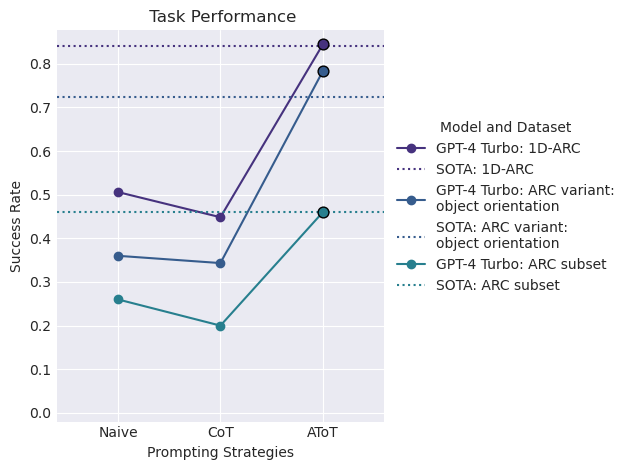

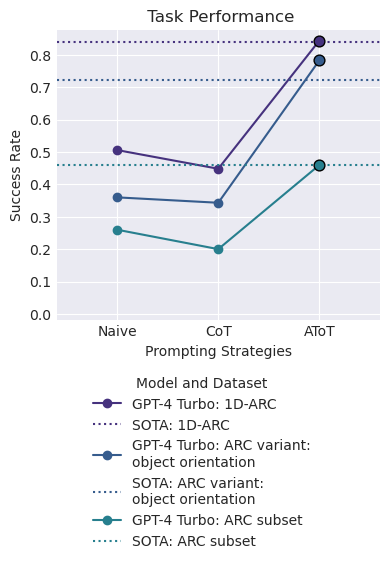

In [46]:
df_all = pd.DataFrame()
df_naive = pd.read_csv("results/baseline_naive/arc/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc/summary.csv")
df_cot["run"] = "CoT"
df_atot = pd.read_csv("results/tot_objects_all_tasks/arc/summary.csv")
df_atot["run"] = "AToT"
df = pd.concat([df_naive, df_cot, df_atot])
filtered_df = df[df['model'].str.contains('gpt-4', case=False, na=False)]
filtered_df["model"] = filtered_df["model"].iloc[0] + "_arc"
df_all = pd.concat([df_all, filtered_df])
df_naive = pd.read_csv("results/baseline_naive/arc_1D/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc_1D/summary.csv")
df_cot["run"] = "CoT"
df_atot = pd.read_csv("results/tot_objects_all_tasks/arc_1D/summary.csv")
df_atot["run"] = "AToT"
df = pd.concat([df_naive, df_cot, df_atot])
filtered_df = df[df['model'].str.contains('gpt-4', case=False, na=False)]
filtered_df["model"] = filtered_df["model"].iloc[0] + "_arc_1D"
df_all = pd.concat([df_all, filtered_df])
df_naive = pd.read_csv("results/baseline_naive/arc_h_v/summary.csv")
df_naive = df_naive[df_naive["new_representation"] == "0 - 9"]
df_naive["run"] = "Naive"
df_cot = pd.read_csv("results/baseline_cot/arc_h_v/summary.csv")
df_cot["run"] = "CoT"
df_atot = pd.read_csv("results/tot_objects_all_tasks/arc_h_v/summary.csv")
df_atot["run"] = "AToT"
df = pd.concat([df_naive, df_cot, df_atot])
filtered_df = df[df['model'].str.contains('gpt-4', case=False, na=False)]
filtered_df["model"] = filtered_df["model"].iloc[0] + "_arc_h_v"
df_all = pd.concat([df_all, filtered_df])
plot_model_performance_across_runs(df_all, "run", "success_rate", task="all", SOTA=SOTA, value_ticks=None)
plot_model_performance_across_runs(df_all, "run", "success_rate", task="all", SOTA=SOTA, value_ticks=None, small_fig=True)

In [47]:
df_all[df_all["run"] == "AToT"][["model", "dataset", "success_rate"]]

model  dataset  success_rate
0      gpt-4-1106-preview_arc      arc      0.460000
0   gpt-4-1106-preview_arc_1D   arc_1D      0.844617
0  gpt-4-1106-preview_arc_h_v  arc_h_v      0.783333